##### Necessary Imports

In [1]:
import math
import numpy as np
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from scipy.stats import expon, lognorm
from scipy.optimize import curve_fit


from astropy.io import fits


from astropy import units as u
from astropy.coordinates import SkyCoord

matplotlib.rcParams.update({'font.size': 14})

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
gll_psc_v22 = fits.open('/content/drive/My Drive/Colab Notebooks/fermi-lat/gll_psc_v27.fit')
gll_psc_v22.info()

Filename: /content/drive/My Drive/Colab Notebooks/fermi-lat/gll_psc_v27.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       9   ()      
  1  LAT_Point_Source_Catalog    1 BinTableHDU    435   5788R x 74C   [18A, I, E, E, E, E, E, E, E, E, E, E, I, 18A, E, E, E, E, E, E, 17A, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, 7E, 14E, 7E, 7E, E, E, E, E, E, E, D, E, 10E, 20E, 10E, 18A, 18A, 18A, 18A, 18A, A, 26A, 5A, 5A, 28A, 26A, E, E, D, D, E, I]   
  2  ExtendedSources    1 BinTableHDU     74   75R x 11C   [17A, E, E, E, E, 11A, E, E, E, 11A, 24A]   
  3  ROIs          1 BinTableHDU    121   1519R x 12C   [I, E, E, E, E, E, E, E, E, E, E, E]   
  4  Components    1 BinTableHDU     53   15R x 9C   [E, E, I, I, E, E, E, I, I]   
  5  EnergyBounds    1 BinTableHDU     75   19R x 10C   [E, E, E, I, I, E, E, E, I, I]   
  6  Hist_Start    1 BinTableHDU     42   11R x 1C   [D]   
  7  GTI           1 BinTableHDU     39   5798

In [4]:
gll_psc_v22_list1 = gll_psc_v22[1]
print ('data shape: ', gll_psc_v22_list1.data.shape)

data shape:  (5788,)


In [ ]:
print ('only column names list:', '\n' , gll_psc_v22_list1.columns.names)

only column names list: 
 ['Source_Name', 'RAJ2000', 'DEJ2000', 'GLON', 'GLAT', 'Conf_68_SemiMajor', 'Conf_68_SemiMinor', 'Conf_68_PosAng', 'Conf_95_SemiMajor', 'Conf_95_SemiMinor', 'Conf_95_PosAng', 'ROI_num', 'Extended_Source_Name', 'Signif_Avg', 'Pivot_Energy', 'Flux1000', 'Unc_Flux1000', 'Energy_Flux100', 'Unc_Energy_Flux100', 'SpectrumType', 'PL_Flux_Density', 'Unc_PL_Flux_Density', 'PL_Index', 'Unc_PL_Index', 'LP_Flux_Density', 'Unc_LP_Flux_Density', 'LP_Index', 'Unc_LP_Index', 'LP_beta', 'Unc_LP_beta', 'LP_SigCurv', 'PLEC_Flux_Density', 'Unc_PLEC_Flux_Density', 'PLEC_Index', 'Unc_PLEC_Index', 'PLEC_Expfactor', 'Unc_PLEC_Expfactor', 'PLEC_Exp_Index', 'Unc_PLEC_Exp_Index', 'PLEC_SigCurv', 'Npred', 'Flux_Band', 'Unc_Flux_Band', 'nuFnu_Band', 'Sqrt_TS_Band', 'Variability_Index', 'Frac_Variability', 'Unc_Frac_Variability', 'Signif_Peak', 'Flux_Peak', 'Unc_Flux_Peak', 'Time_Peak', 'Peak_Interval', 'Flux_History', 'Unc_Flux_History', 'Sqrt_TS_History', 'Variability2_Index', 'Frac2_Vari

In [5]:
gll_psc_v22_list1_data = gll_psc_v22_list1.data

# check the column names before (First consider only the Log Parabola parameters)
v22LP_Name = gll_psc_v22_list1_data['Source_Name']
v22LP_RA = gll_psc_v22_list1_data['RAJ2000']
v22LP_DEJ = gll_psc_v22_list1_data['DEJ2000']
v22LP_GLON = gll_psc_v22_list1_data['GLON']
v22LP_GLAT = gll_psc_v22_list1_data['GLAT']
v22LP_PEn = gll_psc_v22_list1_data['Pivot_Energy']
v22LP_F1000 = gll_psc_v22_list1_data['Flux1000']
v22LP_EnF1000 = gll_psc_v22_list1_data['Energy_Flux100']
v22LP_spectype = gll_psc_v22_list1_data['SpectrumType']
v22LP_PLIndex = gll_psc_v22_list1_data['PL_Index']
v22LP_FDensity = gll_psc_v22_list1_data['LP_Flux_Density']
v22LP_Index = gll_psc_v22_list1_data['LP_Index']
v22LP_Beta = gll_psc_v22_list1_data['LP_beta']
v22LP_Scurve = gll_psc_v22_list1_data['LP_SigCurv']
v22PLEC_Index = gll_psc_v22_list1_data['PLEC_Index']
v22PLEC_ExpIndex = gll_psc_v22_list1_data['PLEC_Exp_Index'] 
v22PLEC_FDensity = gll_psc_v22_list1_data['PLEC_Flux_Density']
v22PLEC_ExpFactor = gll_psc_v22_list1_data['PLEC_Expfactor']
v22PLEC_SigCurv = gll_psc_v22_list1_data['PLEC_SigCurv']
v22LP_Signif_Avg = gll_psc_v22_list1_data['Signif_Avg']
v22LP_Npred = gll_psc_v22_list1_data['Npred']
v22LP_Class1 = gll_psc_v22_list1_data['CLASS1']
v22LP_VarIndex = gll_psc_v22_list1_data['Variability_Index']
v22LP_FracVar = gll_psc_v22_list1_data['Frac_Variability']
v22LP_FluxHist = gll_psc_v22_list1_data['Flux_History']

In [6]:
print (type(v22LP_FluxHist[65:67]))

<class 'numpy.ndarray'>


In [8]:
v22LP_Fl_hist_df = pd.DataFrame(v22LP_FluxHist, 
                                columns=['08-09', '09-10', '10-11', '11-12', '12-13', '13-14','14-15','15-16', '16-17', '17-18'])
v22LP_Fl_hist_df.head(3)

,08-09,09-10,10-11,11-12,12-13,13-14,14-15,15-16,16-17,17-18
0,5.801502e-13,2.475199e-09,2.372369e-09,4.081306e-09,2.038657e-09,3.754544e-09,3.794649e-09,2.537562e-09,1.394211e-10,1.444401e-12
1,1.385810e-09,1.290344e-13,4.230753e-09,5.731251e-09,1.983046e-09,3.243531e-09,4.806888e-09,7.287358e-09,1.179468e-08,1.961461e-09
2,3.238107e-09,6.265439e-09,5.348184e-09,7.955758e-14,6.516738e-15,3.002975e-14,3.403460e-09,1.155617e-09,2.011640e-09,3.748821e-13


In [9]:
v22LP_FluxHist_av = np.mean(v22LP_FluxHist, axis=1)
v22LP_FluxHist_av_frac = v22LP_FluxHist/v22LP_FluxHist_av[:, None]

print ('check shape of new fractional flux history array: ', v22LP_FluxHist_av_frac.shape)

check shape of new fractional flux history array:  (5788, 10)


In [10]:
v22LP_Fl_hist_frac_df = pd.DataFrame(v22LP_FluxHist_av_frac, 
                                     columns=['08-09', '09-10', '10-11', '11-12', '12-13', '13-14', '14-15', '15-16', '16-17', '17-18'])
v22LP_Fl_hist_frac_df.head(3)

,08-09,09-10,10-11,11-12,12-13,13-14,14-15,15-16,16-17,17-18
0,0.000274,1.167782,1.119267,1.925532,0.961824,1.771368,1.790289,1.197204,0.065778,0.000681
1,0.326650,0.000030,0.997233,1.350917,0.467425,0.764535,1.133034,1.717707,2.780132,0.462337
2,1.511514,2.924640,2.496475,0.000037,0.000003,0.000014,1.588699,0.539430,0.939012,0.000175


In [11]:
### check with array operation 

frac_flux_history = v22LP_FluxHist.transpose()/v22LP_FluxHist.mean(axis=1).transpose()
frac_flux_history.shape

(10, 5788)

In [12]:
frac_flux_history[0:3]

array([[2.7371087e-04, 3.2665020e-01, 1.5115141e+00, ..., 1.0519353e+00,
        2.5504544e+00, 1.6732237e+00],
       [1.1677819e+00, 3.0414771e-05, 2.9246402e+00, ..., 3.3881330e-01,
        2.1042635e+00, 1.6438611e+00],
       [1.1192673e+00, 9.9723321e-01, 2.4964755e+00, ..., 1.3200644e+00,
        1.4280464e-01, 1.2735496e+00]], dtype=float32)

In [13]:
v22LP_df = pd.DataFrame(data=v22LP_Name, columns=['N'])

list_of_cols_v22 = [v22LP_GLAT, v22LP_GLON, v22LP_RA, v22LP_DEJ, v22LP_PEn, v22LP_F1000, v22LP_EnF1000, 
                    v22LP_spectype, v22LP_PLIndex, v22LP_FDensity, v22LP_Index, v22LP_Beta, v22PLEC_Index, 
                    v22PLEC_ExpFactor, v22PLEC_ExpIndex, v22PLEC_FDensity, v22LP_Scurve, 
                    v22LP_Signif_Avg, v22LP_Npred, v22LP_Class1, v22LP_VarIndex, v22LP_FracVar]
list_of_cols_strings_v22 = ['GLAT', 'GLON', 'RA', 'DEC', 'Piv_En', 'Flux1000', 'En_flux_100', 
                            'Spec_Type', 'PL_Index', 'LP_f_density', 'LP_index', 'LP_beta', 'PLEC_Index', 
                            'PLEC_ExpFactor', 'PLEC_ExpIndex', 'PLEC_FDensity', 'LP_Sigma', 
                            'Signif_Avg', 'Npred', 'Class1', 'VarIndex', 'Frac_Var']

for y in range(len(list_of_cols_v22)):
    v22LP_df[list_of_cols_strings_v22[y]] = list_of_cols_v22[y]



# v22LP_df.head(3)
print (v22LP_df.shape)

(5788, 23)


In [ ]:
# fig = plt.figure(figsize=(8, 5))
# plt.hist(v22LP_df['Signif_Avg'], bins=int(np.sqrt(v22LP_df.shape[0])), 
#          edgecolor='lime', histtype='stepfilled', fill=False, alpha=0.8)
# # plt.xlim(1e0, 1e4)
# # plt.ylim(0.6, 300)
# plt.ylabel('Source Counts', fontsize=12)
# # plt.xscale('log')
# # plt.yscale('log')
# plt.show()

In [14]:
v22LP_df_flux_history = pd.concat([v22LP_df, v22LP_Fl_hist_frac_df], axis=1,)
print (v22LP_df_flux_history.shape)

(5788, 33)


In [15]:
# print ('nan s: ', v22LP_df_flux_history['VarIndex'].isnull().sum())
# print ('0s: ',  v22LP_df_flux_history.VarIndex[v22LP_df_flux_history.VarIndex==0].count())

print ('nan s in every column: ', v22LP_df_flux_history.isna().sum())

nan s in every column:  N                  0
GLAT               0
GLON               0
RA                 0
DEC                0
Piv_En             0
Flux1000           0
En_flux_100        0
Spec_Type          0
PL_Index           1
LP_f_density       6
LP_index           6
LP_beta            6
PLEC_Index        14
PLEC_ExpFactor    14
PLEC_ExpIndex     14
PLEC_FDensity     14
LP_Sigma           0
Signif_Avg         1
Npred              0
Class1             0
VarIndex           1
Frac_Var           0
08-09              0
09-10              0
10-11              0
11-12              0
12-13              0
13-14              0
14-15              0
15-16              0
16-17              0
17-18              0
dtype: int64


In [16]:
#### drop the NaN in Var Index
v22LP_df_flux_history.dropna(inplace=True)
print (v22LP_df_flux_history.shape)

(5774, 33)


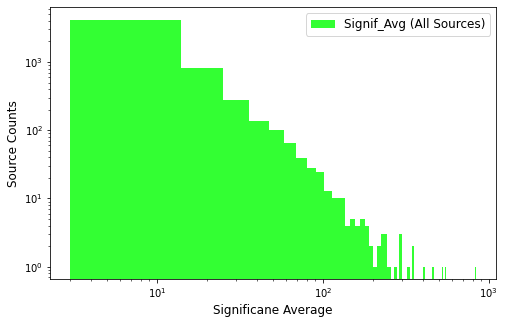

In [17]:
fig = plt.figure(figsize=(8, 5))
plt.hist(v22LP_df_flux_history['Signif_Avg'], bins=int(np.sqrt(v22LP_df.shape[0])), color='lime', 
         alpha=0.8, label='Signif_Avg (All Sources)')

plt.ylabel('Source Counts', fontsize=12)
plt.xlabel('Significane Average', fontsize=12)
plt.legend(fontsize=12)
plt.xscale('log')
plt.yscale('log')
plt.show()

In [18]:
Class1_unique = v22LP_df_flux_history.Class1.unique()
print ('check unique elements in Class1: ', Class1_unique)
print ('check class counts: ', v22LP_df_flux_history['Class1'].value_counts())

Class1_AGNs = ['fsrq ', 'FSRQ ', 'bll  ', 'BLL  ', 'bcu  ', 'BCU  ', 'rdg  ', 'RDG  ', 'nlsy1', 'NLSY1', 
               'agn  ', 'AGN  ', 'sey  ', 'ssrq '] # beware of capital and small letters 
# based on  these categories, create a dataframe which is unique for only AGNs

v22LP_df_AGNs_Flux_History = v22LP_df_flux_history[v22LP_df_flux_history['Class1'].isin(Class1_AGNs)]

check unique elements in Class1:  ['     ' 'bcu  ' 'bll  ' 'fsrq ' 'unk  ' 'spp  ' 'PSR  ' 'rdg  ' 'agn  '
 'FSRQ ' 'glc  ' 'snr  ' 'gal  ' 'sbg  ' 'BLL  ' 'GAL  ' 'sfr  ' 'bin  '
 'SNR  ' 'HMB  ' 'psr  ' 'RDG  ' 'nlsy1' 'LMB  ' 'css  ' 'AGN  ' 'PWN  '
 'pwn  ' 'BCU  ' 'hmb  ' 'ssrq ' 'NLSY1' 'lmb  ' 'SFR  ' 'BIN  ' 'sey  '
 'NOV  ']
check class counts:           1658
bcu      1379
bll      1286
fsrq      700
PSR       237
unk       115
spp        96
FSRQ       43
rdg        38
psr        34
glc        30
SNR        24
BLL        22
snr        19
PWN        11
agn        10
bin         8
sbg         8
HMB         6
pwn         6
RDG         6
css         5
nlsy1       5
NLSY1       4
gal         3
SFR         3
sfr         2
hmb         2
ssrq        2
BCU         2
LMB         2
lmb         2
GAL         2
NOV         1
AGN         1
BIN         1
sey         1
Name: Class1, dtype: int64


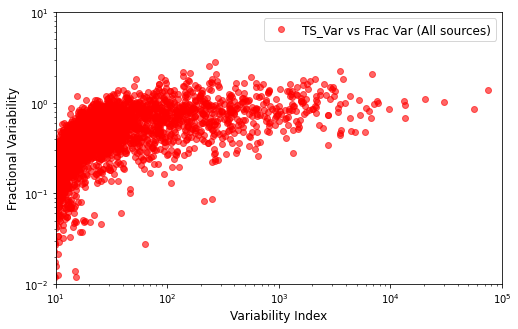

In [19]:
fig = plt.figure(figsize=(8, 5))
plt.plot(v22LP_df['VarIndex'], v22LP_df['Frac_Var'],  linestyle='None', marker='o', color='red', alpha=0.6, 
         label='TS_Var vs Frac Var (All sources)')
plt.xscale('log')
plt.yscale('log')
plt.xlim(10, 10e4)
plt.ylim(1e-2, 1e1)
plt.ylabel('Fractional Variability', fontsize=12)
plt.xlabel('Variability Index', fontsize=12)
plt.legend(fontsize=12)
plt.show()

In [ ]:
# fig = plt.figure(figsize=(8, 5))
# plt.hist(v22LP_df['VarIndex'], bins=2000, edgecolor='lime', histtype='stepfilled', fill=False, alpha=0.8)
# plt.xlim(1e0, 1e4)
# # plt.ylim(0.6, 300)
# plt.ylabel('Source Counts', fontsize=12)
# plt.xscale('log')
# plt.yscale('log')
# plt.show()

In [20]:
print ('Data frame shape: ', v22LP_df.shape)
print ('Only AGN Dataframe shape: ', v22LP_df_AGNs_Flux_History.shape)
print ('cross check the unique elements in Class column and length: ', v22LP_df_AGNs_Flux_History.Class1.unique(), 
      len(v22LP_df_AGNs_Flux_History.Class1.unique()))

Data frame shape:  (5788, 23)
Only AGN Dataframe shape:  (3499, 33)
cross check the unique elements in Class column and length:  ['bcu  ' 'bll  ' 'fsrq ' 'rdg  ' 'agn  ' 'FSRQ ' 'BLL  ' 'RDG  ' 'nlsy1'
 'AGN  ' 'BCU  ' 'ssrq ' 'NLSY1' 'sey  '] 14


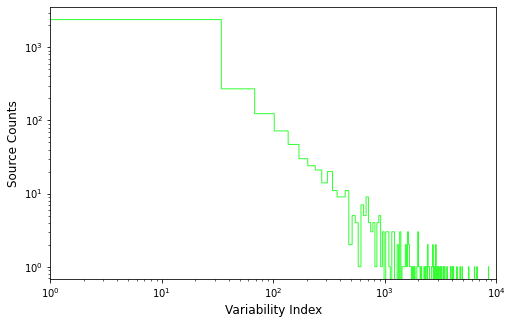

In [ ]:
fig = plt.figure(figsize=(8, 5))
plt.hist(v22LP_df_AGNs_Flux_History['VarIndex'], bins=1500, edgecolor='lime', histtype='stepfilled', 
         fill=False, alpha=0.8)
plt.xlim(1e0, 1e4)
# plt.ylim(0.6, 300)
plt.ylabel('Source Counts', fontsize=12)
plt.xlabel('Variability Index', fontsize=12)
plt.xscale('log')
plt.yscale('log')
plt.show()

In [21]:
print ('in AGNs how many follow log parabola distribution: ', '\n', 
       v22LP_df_AGNs_Flux_History['Spec_Type'].value_counts())

in AGNs how many follow log parabola distribution:  
 PowerLaw             2771
LogParabola           726
PLSuperExpCutoff        2
Name: Spec_Type, dtype: int64


In [22]:
print ('max value of AGN E100: ', v22LP_df_AGNs_Flux_History['En_flux_100'].max())
print ('min value of AGN E100: ', v22LP_df_AGNs_Flux_History['En_flux_100'].min())

print ('max value of AGN piv en: ', v22LP_df_AGNs_Flux_History['Piv_En'].max())
print ('min value of AGN piv en: ', v22LP_df_AGNs_Flux_History['Piv_En'].min())

print ('max value of AGN alpha: ', v22LP_df_AGNs_Flux_History['LP_index'].max())
print ('min value of AGN alpha: ', v22LP_df_AGNs_Flux_History['LP_index'].min())

print ('max value of AGN beta: ', v22LP_df_AGNs_Flux_History['LP_beta'].max())
print ('min value of AGN beta: ', v22LP_df_AGNs_Flux_History['LP_beta'].min())

print ('max value of AGN flux density: ', v22LP_df_AGNs_Flux_History['LP_f_density'].max())
print ('min value of AGN flux density: ', v22LP_df_AGNs_Flux_History['LP_f_density'].min())

max value of AGN E100:  9.952251245337607e-10
min value of AGN E100:  4.181238959666961e-13
max value of AGN piv en:  24191.27734375
min value of AGN piv en:  149.2108917236328
max value of AGN alpha:  3.7085201740264893
min value of AGN alpha:  -0.08380364626646042
max value of AGN beta:  0.9999998807907104
min value of AGN beta:  -0.1694730967283249
max value of AGN flux density:  3.8749119468661775e-09
min value of AGN flux density:  2.4213177951093023e-16


In [23]:
v22LP_df['Class1'][0:5]

0         
1         
2    bcu  
3    bll  
4    fsrq 
Name: Class1, dtype: object

In [24]:
v22LP_df_bll = v22LP_df_AGNs_Flux_History[(v22LP_df_AGNs_Flux_History['Class1']=='bll  ') | (v22LP_df_AGNs_Flux_History.Class1=='BLL  ')]
print (v22LP_df_bll.shape) 

(1308, 33)


In [25]:
v22LP_df_fsrq = v22LP_df_AGNs_Flux_History[(v22LP_df_AGNs_Flux_History['Class1']=='fsrq ') | (v22LP_df_AGNs_Flux_History.Class1=='FSRQ ')]
print (v22LP_df_fsrq.shape) 

(743, 33)


In [26]:
v22LP_df_psrs = v22LP_df_flux_history[(v22LP_df_flux_history['Class1']=='psr  ') | (v22LP_df_flux_history.Class1=='PSR  ')]
print (v22LP_df_psrs.shape) 

(271, 33)


In [27]:
v22LP_df_bcu = v22LP_df_AGNs_Flux_History[(v22LP_df_AGNs_Flux_History['Class1']=='bcu  ') | (v22LP_df_AGNs_Flux_History.Class1=='BCU  ')]
print (v22LP_df_bcu.shape) 

(1381, 33)


In [28]:
v22LP_df_pwn_spp_snr = v22LP_df_flux_history[(v22LP_df_flux_history['Class1']=='pwn  ')|(v22LP_df_flux_history.Class1=='PWN  ') | (v22LP_df_flux_history.Class1=='spp  ')|  (v22LP_df_flux_history.Class1=='snr  ')|  (v22LP_df_flux_history.Class1=='SNR  ')]
print (v22LP_df_pwn_spp_snr.shape)

(156, 33)


In [31]:
probable_TSVar = v22LP_df_AGNs_Flux_History[(v22LP_df_AGNs_Flux_History['VarIndex'] >= 18.4)]

print (type(probable_TSVar))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
print (probable_TSVar.shape)

(1263, 27)


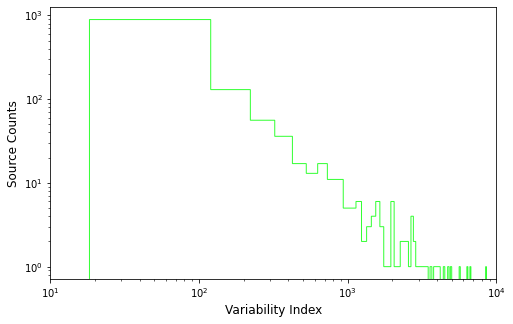

In [ ]:
fig = plt.figure(figsize=(8, 5))
plt.hist(probable_TSVar['VarIndex'], bins=500, edgecolor='lime', histtype='stepfilled', 
         fill=False, alpha=0.8)
plt.xlim(1e1, 1e4)
# plt.ylim(0.6, 300)
plt.ylabel('Source Counts', fontsize=12)
plt.xlabel('Variability Index', fontsize=12)
plt.xscale('log')
plt.yscale('log')
plt.show()

In [ ]:
# probable_TSVar0d8 = v22LP_df_AGNs_Flux_History[(v22LP_df_AGNs_Flux_History['VarIndex'] >= 0.8)]

# print (probable_TSVar0d8.shape)

In [ ]:
# fig = plt.figure(figsize=(8, 5))
# plt.hist(probable_TSVar0d8['VarIndex'], bins=1500, edgecolor='lime', histtype='stepfilled', 
#          fill=False, alpha=0.8)
# plt.xlim(0.5, 1e4)
# # plt.ylim(0.6, 300)
# plt.ylabel('Source Counts', fontsize=12)
# plt.xlabel('Variability Index', fontsize=12)
# plt.xscale('log')
# plt.yscale('log')
# plt.show()

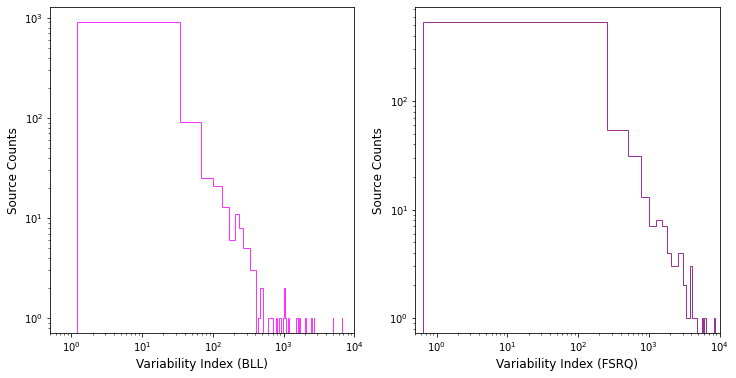

In [ ]:
fig = plt.figure(figsize=(12, 6))

fig.add_subplot(121)

plt.hist(v22LP_df_bll['VarIndex'], bins=200, edgecolor='magenta', histtype='stepfilled', 
         fill=False, alpha=0.8)
plt.xlim(0.5, 1e4)
# plt.ylim(0.6, 300)
plt.ylabel('Source Counts', fontsize=12)
plt.xlabel('Variability Index (BLL)', fontsize=12)
plt.xscale('log')
plt.yscale('log')

fig.add_subplot(122)

plt.hist(v22LP_df_fsrq['VarIndex'], bins=200, edgecolor='purple', histtype='stepfilled', 
         fill=False, alpha=0.8)
plt.xlim(0.5, 1e4)
# plt.ylim(0.6, 300)
plt.ylabel('Source Counts', fontsize=12)
plt.xlabel('Variability Index (FSRQ)', fontsize=12)
plt.xscale('log')
plt.yscale('log')

plt.show()

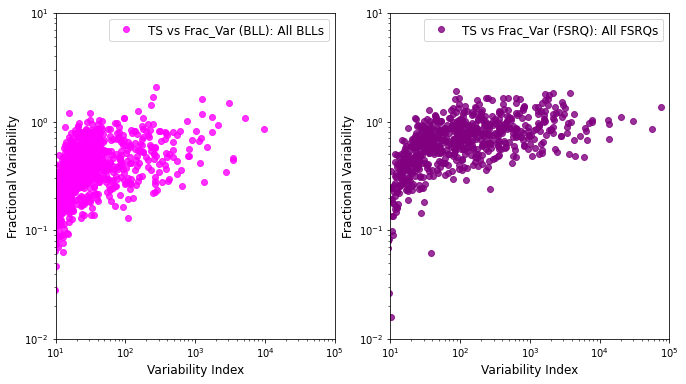

In [29]:
fig = plt.figure(figsize=(11, 6))
fig.add_subplot(121)

plt.plot(v22LP_df_bll['VarIndex'], v22LP_df_bll['Frac_Var'],  linestyle='None', marker='o', color='magenta', 
         alpha=0.8, label='TS vs Frac_Var (BLL): All BLLs')
plt.xscale('log')
plt.yscale('log')
plt.xlim(10, 10e4)
plt.ylim(1e-2, 1e1)
plt.ylabel('Fractional Variability', fontsize=12)
plt.xlabel('Variability Index', fontsize=12)
plt.legend(fontsize=12)

fig.add_subplot(122)

plt.plot(v22LP_df_fsrq['VarIndex'], v22LP_df_fsrq['Frac_Var'],  linestyle='None', marker='o', color='purple', 
         alpha=0.8, label='TS vs Frac_Var (FSRQ): All FSRQs')
plt.xscale('log')
plt.yscale('log')
plt.xlim(10, 10e4)
plt.ylim(1e-2, 1e1)
plt.ylabel('Fractional Variability', fontsize=12)
plt.xlabel('Variability Index', fontsize=12)
plt.legend(fontsize=12)
# plt.savefig('/content/drive/My Drive/Colab Notebooks/fermi-lat/Frac_Var_TS_BLLvsFSRQ.png', dpi=300)
plt.show()

In [32]:
probable_TSVar_bll = probable_TSVar[(probable_TSVar['Class1']=='bll  ') | (probable_TSVar.Class1=='BLL  ')]
print (probable_TSVar_bll.shape) 

(557, 33)


In [33]:
probable_TSVar_fsrq = probable_TSVar[(probable_TSVar['Class1']=='fsrq ') | (probable_TSVar.Class1=='FSRQ ')]
print (probable_TSVar_fsrq.shape) 

(593, 33)


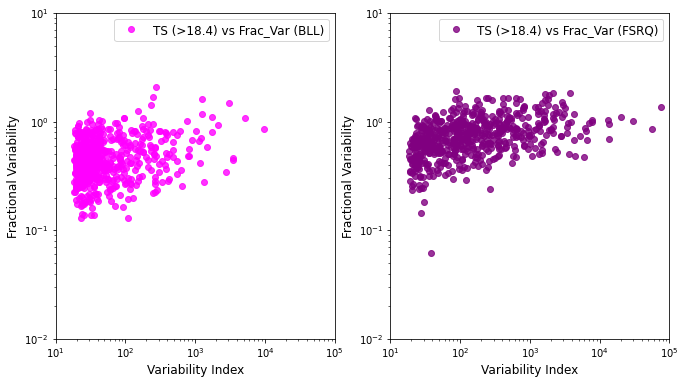

In [34]:
fig = plt.figure(figsize=(11, 6))
fig.add_subplot(121)

plt.plot(probable_TSVar_bll['VarIndex'], probable_TSVar_bll['Frac_Var'],  linestyle='None', marker='o', 
         color='magenta', alpha=0.8, label='TS (>18.4) vs Frac_Var (BLL)')
plt.xscale('log')
plt.yscale('log')
plt.xlim(10, 10e4)
plt.ylim(1e-2, 1e1)
plt.ylabel('Fractional Variability', fontsize=12)
plt.xlabel('Variability Index', fontsize=12)
plt.legend(fontsize=12)

fig.add_subplot(122)

plt.plot(probable_TSVar_fsrq['VarIndex'], probable_TSVar_fsrq['Frac_Var'],  linestyle='None', marker='o', color='purple', 
         alpha=0.8, label='TS (>18.4) vs Frac_Var (FSRQ)')
plt.xscale('log')
plt.yscale('log')
plt.xlim(10, 10e4)
plt.ylim(1e-2, 1e1)
plt.ylabel('Fractional Variability', fontsize=12)
plt.xlabel('Variability Index', fontsize=12)
plt.legend(fontsize=12)

plt.show()

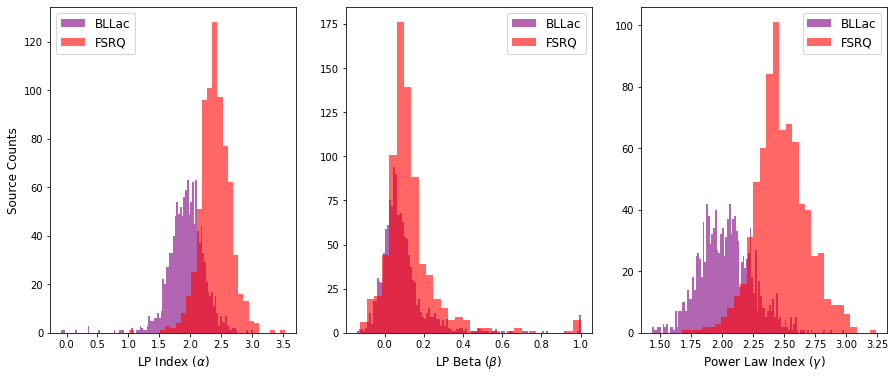

In [35]:
fig = plt.figure(figsize=(15, 6))

fig.add_subplot(131)

plt.hist(v22LP_df_bll['LP_index'], bins=110, color='purple', alpha=0.6, label='BLLac')

plt.hist(v22LP_df_fsrq['LP_index'], bins=30, color='red', alpha=0.6, label='FSRQ')

plt.ylabel('Source Counts', fontsize=12)
plt.xlabel(r'LP Index $(\alpha)$', fontsize=12)
plt.legend(fontsize=12)

fig.add_subplot(132)

plt.hist(v22LP_df_bll['LP_beta'], bins=110, color='purple', alpha=0.6, label='BLLac')

plt.hist(v22LP_df_fsrq['LP_beta'], bins=30, color='red', alpha=0.6, label='FSRQ')

# plt.ylabel('Source Counts', fontsize=12)
plt.xlabel(r'LP Beta $(\beta)$', fontsize=12)
plt.legend(fontsize=12)



fig.add_subplot(133)

plt.hist(v22LP_df_bll['PL_Index'], bins=110, color='purple', alpha=0.6, label='BLLac')

plt.hist(v22LP_df_fsrq['PL_Index'], bins=30, color='red', alpha=0.6, label='FSRQ')


# plt.ylabel('Fractional Variability', fontsize=12)
plt.xlabel(r'Power Law Index $(\gamma)$', fontsize=12)
plt.legend(fontsize=12)

# plt.savefig('/content/drive/My Drive/Colab Notebooks/PLindex_BLL_FSRQ.png', dpi=200)
# plt.savefig('/content/drive/My Drive/Colab Notebooks/PLindex_BLL_FSRQ.eps', dpi=200)
plt.show()

In [55]:
### divide sources by their significances (test statistics)
### TS < 100, 100<TS<1000, TS>1000

probable_Signif_AvgHigh_all_sources = v22LP_df_flux_history[(v22LP_df_flux_history['Signif_Avg'] >= np.sqrt(1000))]
print ('sources with high significance average: ', probable_Signif_AvgHigh_all_sources.shape[0])

probable_Signif_AvgLow_all_sources = v22LP_df_flux_history[(v22LP_df_flux_history['Signif_Avg'] <= np.sqrt(100))]
print ('sources with low significance average: ', probable_Signif_AvgLow_all_sources.shape[0])

probable_Signif_AvgMed_all_sources = v22LP_df_flux_history[(v22LP_df_flux_history['Signif_Avg'] > np.sqrt(100)) & 
                                                    (v22LP_df_flux_history['Signif_Avg'] < np.sqrt(1000))]

print ('sources with medium significance average: ', probable_Signif_AvgMed_all_sources.shape[0])

sources with high significance average:  566
sources with low significance average:  3429
sources with medium significance average:  1779


In [56]:
SignifAvg_Med_bll = probable_Signif_AvgMed_all_sources[(probable_Signif_AvgMed_all_sources['Class1']=='bll  ') | (probable_Signif_AvgMed_all_sources.Class1=='BLL  ')]
print ('Signif_Avg Medium Bll source only: ', SignifAvg_Med_bll.shape)

SignifAvg_Med_fsrq = probable_Signif_AvgMed_all_sources[(probable_Signif_AvgMed_all_sources['Class1']=='fsrq ') | (probable_Signif_AvgMed_all_sources.Class1=='FSRQ ')]
print ('Signif_Avg Medium fsrq source only: ', SignifAvg_Med_fsrq.shape)

SignifAvg_Med_psr = probable_Signif_AvgMed_all_sources[(probable_Signif_AvgMed_all_sources['Class1']=='psr  ') | (probable_Signif_AvgMed_all_sources.Class1=='PSR  ')]
print ('Signif_Avg Medium pulsar source only: ', SignifAvg_Med_psr.shape)

SignifAvg_High_bll = probable_Signif_AvgHigh_all_sources[(probable_Signif_AvgHigh_all_sources['Class1']=='bll  ') | (probable_Signif_AvgHigh_all_sources.Class1=='BLL  ')]
print ('Signif_Avg High Bll source only: ', SignifAvg_High_bll.shape)

SignifAvg_High_fsrq = probable_Signif_AvgHigh_all_sources[(probable_Signif_AvgHigh_all_sources['Class1']=='fsrq ') | (probable_Signif_AvgHigh_all_sources.Class1=='FSRQ ')]
print ('Signif_Avg High fsrq source only: ', SignifAvg_High_fsrq.shape)

SignifAvg_High_psr = probable_Signif_AvgHigh_all_sources[(probable_Signif_AvgHigh_all_sources['Class1']=='psr  ') | (probable_Signif_AvgHigh_all_sources.Class1=='PSR  ')]
print ('Signif_Avg High pulsar source only: ', SignifAvg_High_psr.shape)

SignifAvg_Low_bll = probable_Signif_AvgLow_all_sources[(probable_Signif_AvgLow_all_sources['Class1']=='bll  ') | (probable_Signif_AvgLow_all_sources.Class1=='BLL  ')]
print ('Signif_Avg Low Bll source only: ', SignifAvg_Low_bll.shape)

SignifAvg_Low_fsrq = probable_Signif_AvgLow_all_sources[(probable_Signif_AvgLow_all_sources['Class1']=='fsrq ') | (probable_Signif_AvgLow_all_sources.Class1=='FSRQ ')]
print ('Signif_Avg low fsrq source only: ', SignifAvg_Low_fsrq.shape)

SignifAvg_Low_psr = probable_Signif_AvgLow_all_sources[(probable_Signif_AvgLow_all_sources['Class1']=='psr  ') | (probable_Signif_AvgLow_all_sources.Class1=='PSR  ')]
print ('Signif_Avg low psr source only: ', SignifAvg_Low_psr.shape)

Signif_Avg Medium Bll source only:  (622, 33)
Signif_Avg Medium fsrq source only:  (307, 33)
Signif_Avg Medium pulsar source only:  (125, 33)
Signif_Avg High Bll source only:  (207, 33)
Signif_Avg High fsrq source only:  (183, 33)
Signif_Avg High pulsar source only:  (107, 33)
Signif_Avg Low Bll source only:  (479, 33)
Signif_Avg low fsrq source only:  (253, 33)
Signif_Avg low psr source only:  (39, 33)


In [38]:
SignifAvg_Med_bll_year_frac_avg_arr = SignifAvg_Med_bll[['08-09', '09-10', '10-11', '11-12', 
                                                        '12-13', '13-14', '14-15', '15-16', '16-17', '17-18']].to_numpy()

SignifAvg_High_bll_year_frac_avg_arr = SignifAvg_High_bll[['08-09', '09-10', '10-11', '11-12', 
                                                        '12-13', '13-14', '14-15', '15-16', '16-17', '17-18']].to_numpy()


SignifAvg_Low_bll_year_frac_avg_arr = SignifAvg_Low_bll[['08-09', '09-10', '10-11', '11-12', 
                                                        '12-13', '13-14', '14-15', '15-16', '17-18']].to_numpy()



print ('check shapes of low, med and high stat bll numbers: ', SignifAvg_Low_bll_year_frac_avg_arr.shape,
       SignifAvg_Med_bll_year_frac_avg_arr.shape, 
       SignifAvg_High_bll_year_frac_avg_arr.shape)

check shapes of low, med and high stat bll numbers:  (479, 9) (622, 10) (207, 10)


In [40]:
SignifAvg_Med_fsrq_year_frac_avg_arr = SignifAvg_Med_fsrq[['08-09', '09-10', '10-11', '11-12', 
                                                        '12-13', '13-14', '14-15', '15-16', '16-17', '17-18']].to_numpy()

SignifAvg_High_fsrq_year_frac_avg_arr = SignifAvg_High_fsrq[['08-09', '09-10', '10-11', '11-12', 
                                                        '12-13', '13-14', '14-15', '15-16', '16-17', '17-18']].to_numpy()


SignifAvg_Low_fsrq_year_frac_avg_arr = SignifAvg_Low_fsrq[['08-09', '09-10', '10-11', '11-12', 
                                                        '12-13', '13-14', '14-15', '15-16', '16-17', '17-18']].to_numpy()

print ('check shapes of low, med and high stat fsrq numbers: ', SignifAvg_Low_fsrq_year_frac_avg_arr.shape, 
       SignifAvg_Med_fsrq_year_frac_avg_arr.shape, 
       SignifAvg_High_fsrq_year_frac_avg_arr.shape)

check shapes of low, med and high stat fsrq numbers:  (253, 10) (307, 10) (183, 10)


In [41]:
SignifAvg_Med_psr_year_frac_avg_arr = SignifAvg_Med_psr[['08-09', '09-10', '10-11', '11-12', 
                                                        '12-13', '13-14', '14-15', '15-16', '16-17', '17-18']].to_numpy()

SignifAvg_High_psr_year_frac_avg_arr = SignifAvg_High_psr[['08-09', '09-10', '10-11', '11-12', 
                                                        '12-13', '13-14', '14-15', '15-16', '16-17', '17-18']].to_numpy()


SignifAvg_Low_psr_year_frac_avg_arr = SignifAvg_Low_psr[['08-09', '09-10', '10-11', '11-12', 
                                                        '12-13', '13-14', '14-15', '15-16', '16-17', '17-18']].to_numpy()

print ('check shapes of low, med and high stat psr numbers: ', SignifAvg_Low_psr_year_frac_avg_arr.shape, 
       SignifAvg_Med_psr_year_frac_avg_arr.shape, 
       SignifAvg_High_psr_year_frac_avg_arr.shape)

check shapes of low, med and high stat psr numbers:  (39, 10) (125, 10) (107, 10)


In [42]:
SignifAvg_Med_bll_year_frac_avg_arr_flat = SignifAvg_Med_bll_year_frac_avg_arr.flatten()
SignifAvg_Med_fsrq_year_frac_avg_arr_flat = SignifAvg_Med_fsrq_year_frac_avg_arr.flatten()
SignifAvg_Med_psr_year_frac_avg_arr_flat = SignifAvg_Med_psr_year_frac_avg_arr.flatten()

SignifAvg_High_bll_year_frac_avg_arr_flat = SignifAvg_High_bll_year_frac_avg_arr.flatten()
SignifAvg_High_fsrq_year_frac_avg_arr_flat = SignifAvg_High_fsrq_year_frac_avg_arr.flatten()
SignifAvg_High_psr_year_frac_avg_arr_flat = SignifAvg_High_psr_year_frac_avg_arr.flatten()

SignifAvg_Low_bll_year_frac_avg_arr_flat = SignifAvg_Low_bll_year_frac_avg_arr.flatten()
SignifAvg_Low_fsrq_year_frac_avg_arr_flat = SignifAvg_Low_fsrq_year_frac_avg_arr.flatten()
SignifAvg_Low_psr_year_frac_avg_arr_flat = SignifAvg_Med_psr_year_frac_avg_arr.flatten()

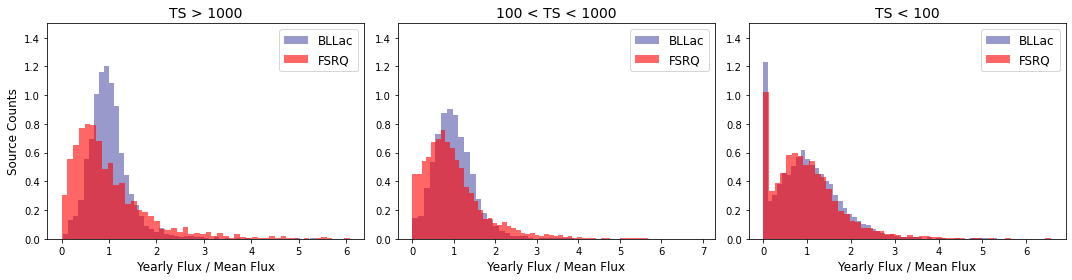

In [43]:
fig = plt.figure(figsize=(15, 4))

fig.add_subplot(131)
plt.hist(SignifAvg_High_bll_year_frac_avg_arr_flat, bins=50, density=True, color='navy', alpha=0.4, label='BLLac')

plt.hist(SignifAvg_High_fsrq_year_frac_avg_arr_flat, bins=50, density=True, color='red', alpha=0.6, label='FSRQ')

# plt.hist(SignifAvg_High_psr_year_frac_avg_arr_flat, bins=50, density=True, color='cyan', alpha=0.6, label='PSR')

plt.ylabel('Source Counts', fontsize=12)
plt.xlabel('Yearly Flux / Mean Flux', fontsize=12)
plt.title('TS > 1000', fontsize=14)
plt.ylim(0, 1.5)
plt.legend(fontsize=12)

fig.add_subplot(132)
plt.hist(SignifAvg_Med_bll_year_frac_avg_arr_flat, bins=50, density=True, color='navy', alpha=0.4, label='BLLac')

plt.hist(SignifAvg_Med_fsrq_year_frac_avg_arr_flat, bins=50, density=True, color='red', alpha=0.6, label='FSRQ')

# plt.hist(SignifAvg_Med_psr_year_frac_avg_arr_flat, bins=50, density=True, color='cyan', alpha=0.6, label='PSR')

# plt.ylabel('Source Counts', fontsize=12)
plt.xlabel('Yearly Flux / Mean Flux', fontsize=12)
plt.title('100 < TS < 1000', fontsize=14)
plt.ylim(0, 1.5)
plt.legend(fontsize=12)

fig.add_subplot(133)

plt.hist(SignifAvg_Low_bll_year_frac_avg_arr_flat, bins=50, density=True, color='navy', alpha=0.4, label='BLLac')

plt.hist(SignifAvg_Low_fsrq_year_frac_avg_arr_flat, bins=50, density=True, color='red', alpha=0.6, label='FSRQ')

# plt.hist(SignifAvg_Low_psr_year_frac_avg_arr_flat, bins=50, density=True, color='cyan', alpha=0.6, label='PSR')

# plt.ylabel('Source Counts', fontsize=12)
plt.xlabel('Yearly Flux / Mean Flux', fontsize=12)
plt.title('TS < 100', fontsize=14)
plt.ylim(0, 1.5)
plt.legend(fontsize=12)
# plt.savefig('/content/drive/My Drive/Colab Notebooks/fermi-lat/Yearly_mean_bll_fsrq_psr.png', dpi=300)
# plt.savefig('/content/drive/My Drive/Colab Notebooks/fermi-lat/Yearly_mean_bll_fsrq.pdf', dpi=300)
plt.tight_layout()

yearly flux/mean flux bll mean:  1.0
yearly flux/mean flux bll std:  0.4444085
yearly flux/mean flux fsrq mean:  1.0
yearly flux/mean flux fsrq std:  0.83423597
yearly flux/mean flux fsrq max:  6.074803


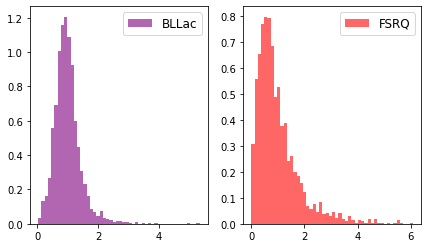

In [44]:
fig = plt.figure(figsize=(7, 4))
fig.add_subplot(121) 
plt.hist(SignifAvg_High_bll_year_frac_avg_arr_flat, bins=50, density=True, color='purple', alpha=0.6, label='BLLac')
plt.legend(fontsize=12)

print ('yearly flux/mean flux bll mean: ', np.mean(SignifAvg_High_bll_year_frac_avg_arr_flat))
print ('yearly flux/mean flux bll std: ', np.std(SignifAvg_High_bll_year_frac_avg_arr_flat))

fig.add_subplot(122) 
plt.hist(SignifAvg_High_fsrq_year_frac_avg_arr_flat, bins=50, density=True, color='red', alpha=0.6, label='FSRQ')
plt.legend(fontsize=12)

print ('yearly flux/mean flux fsrq mean: ', np.mean(SignifAvg_High_fsrq_year_frac_avg_arr_flat))
print ('yearly flux/mean flux fsrq std: ', np.std(SignifAvg_High_fsrq_year_frac_avg_arr_flat))
print ('yearly flux/mean flux fsrq max: ', np.max(SignifAvg_High_fsrq_year_frac_avg_arr_flat))

check fit shape, loc and scale, log(scale):  0.65723422935835 -0.16170118239250186 0.93745735492948 -0.06458401024740636


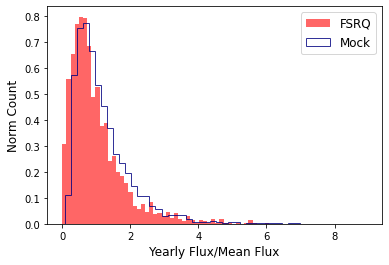

In [98]:
LP_df_mockCat_bins_fsrq = 6000

logshape1_fsrq_year_mean, logloc1_fsrq_year_mean, logscale1_fsrq_year_mean = lognorm.fit(SignifAvg_High_fsrq_year_frac_avg_arr_flat, 
                                                                                         loc=0)
print ('check fit shape, loc and scale, log(scale): ', logshape1_fsrq_year_mean, logloc1_fsrq_year_mean, 
       logscale1_fsrq_year_mean, np.log(logscale1_fsrq_year_mean))

year_mean_mock_dist3_fsrq = np.random.lognormal(np.log(logscale1_fsrq_year_mean), logshape1_fsrq_year_mean, 
                                                LP_df_mockCat_bins_fsrq)
year_mean_mock_dist3ffsrq = year_mean_mock_dist3_fsrq[(year_mean_mock_dist3_fsrq>0.0) & (year_mean_mock_dist3_fsrq<10.)]

fig=plt.figure(figsize=(6, 4))
plt.hist(SignifAvg_High_fsrq_year_frac_avg_arr_flat, density=True, bins=50, color='red', alpha=0.6, label='FSRQ')
plt.hist(year_mean_mock_dist3ffsrq, density=True, bins=50, edgecolor='navy', 
         histtype='stepfilled', fill=False, alpha=0.8, label='Mock')
plt.xlabel('Yearly Flux/Mean Flux', fontsize=12)
plt.ylabel('Norm Count', fontsize=12)
plt.legend(fontsize=12)
plt.show()

# factor should be multipled with prefactor 

check fit shape, loc and scale, log(scale):  0.27589534345693467 -0.4920741242100581 1.4351171951276984 0.3612465149553823


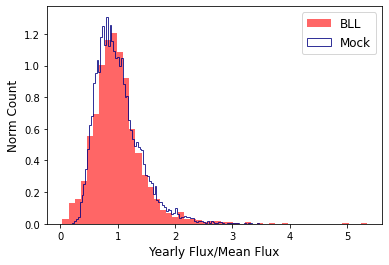

In [99]:
LP_df_mockCat_bins_bll = 10000

logshape1_bll_year_mean, logloc1_bll_year_mean, logscale1_bll_year_mean = lognorm.fit(SignifAvg_High_bll_year_frac_avg_arr_flat, 
                                                                                         loc=0.09)
print ('check fit shape, loc and scale, log(scale): ', logshape1_bll_year_mean, logloc1_bll_year_mean, 
       logscale1_bll_year_mean, np.log(logscale1_bll_year_mean))

year_mean_mock_dist3_bll = np.random.lognormal(np.log(logscale1_bll_year_mean-0.5), logshape1_bll_year_mean+0.1, 
                                                LP_df_mockCat_bins_bll)
year_mean_mock_dist3fbll = year_mean_mock_dist3_bll[(year_mean_mock_dist3_bll>0.0)& (year_mean_mock_dist3_bll<7.)]

fig=plt.figure(figsize=(6, 4))
plt.hist(SignifAvg_High_bll_year_frac_avg_arr_flat, density=True, bins=50, color='red', alpha=0.6, label='BLL')
plt.hist(year_mean_mock_dist3fbll, density=True, bins=int(np.sqrt(LP_df_mockCat_bins_bll)), edgecolor='navy', 
         histtype='stepfilled', fill=False, alpha=0.8, label='Mock')
plt.xlabel('Yearly Flux/Mean Flux', fontsize=12)
plt.ylabel('Norm Count', fontsize=12)
plt.legend(fontsize=12)
plt.show()

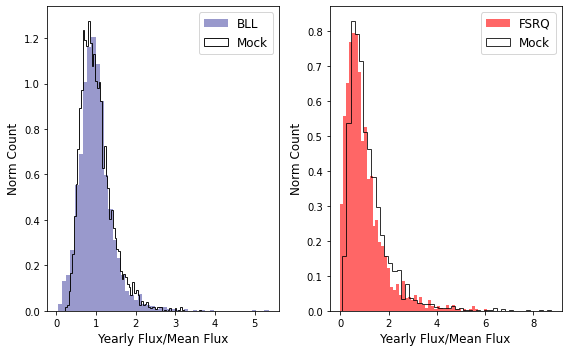

In [47]:
fig=plt.figure(figsize=(8, 5))

fig.add_subplot(121)

plt.hist(SignifAvg_High_bll_year_frac_avg_arr_flat, density=True, bins=50, color='navy', alpha=0.4, label='BLL')
plt.hist(year_mean_mock_dist3fbll, density=True, bins=int(np.sqrt(LP_df_mockCat_bins_bll)), edgecolor='black', 
         histtype='stepfilled', fill=False, alpha=0.9, label='Mock')
plt.xlabel('Yearly Flux/Mean Flux', fontsize=12)
plt.ylabel('Norm Count', fontsize=12)
plt.legend(fontsize=12)

fig.add_subplot(122)

plt.hist(SignifAvg_High_fsrq_year_frac_avg_arr_flat, density=True, bins=50, color='red', alpha=0.6, label='FSRQ')
plt.hist(year_mean_mock_dist3ffsrq, density=True, bins=50, edgecolor='black', 
         histtype='stepfilled', fill=False, alpha=0.8, label='Mock')
plt.xlabel('Yearly Flux/Mean Flux', fontsize=12)
plt.ylabel('Norm Count', fontsize=12)
plt.legend(fontsize=12)

plt.tight_layout()
# plt.savefig('/content/drive/My Drive/Colab Notebooks/fermi-lat/bll_fsrq_Year_mean_mock.png', dpi=200)
# plt.savefig('/content/drive/My Drive/Colab Notebooks/fermi-lat/bll_fsrq_Year_mean_mock.pdf', dpi=200)
plt.show()

--------

check new distribution mean being 1

--------

checked and it's correct ! 

FSRQs

hist till last: 8.226222268292544
y/m till last:  1827.282502200629
y/m last:  2.7174828
len y/m arr:  1830
check len of new arr:  1830 1830
check mean of new arr:  1.0
check mean of previous arr:  0.9999999918064925


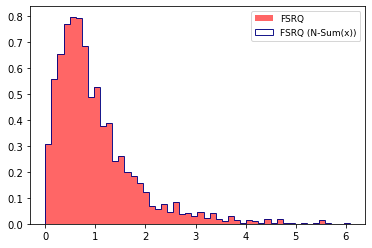

In [48]:
E100hist_fsrq_variability, E100bins_fsrq_variability,_= plt.hist(SignifAvg_High_fsrq_year_frac_avg_arr_flat, density=True, bins=50, color='red', alpha=0.6, label='FSRQ')
# print (E100bins_fsrq_variability)
print ('hist till last:', np.sum(E100hist_fsrq_variability[:-1]))
print ('y/m till last: ', sum(SignifAvg_High_fsrq_year_frac_avg_arr_flat[:-1]))
print ('y/m last: ', SignifAvg_High_fsrq_year_frac_avg_arr_flat[-1])
print ('len y/m arr: ', len(SignifAvg_High_fsrq_year_frac_avg_arr_flat))

last_E100hist_fsrq_variability = len(E100hist_fsrq_variability) - np.sum(E100hist_fsrq_variability[:-1])
# print (last_E100hist_fsrq_variability)

SignifAvg_High_fsrq_year_frac_avg_arr_flatlist = SignifAvg_High_fsrq_year_frac_avg_arr_flat.tolist()

newE100_hist_fsrq_variability = E100hist_fsrq_variability[:-1] + [last_E100hist_fsrq_variability]
new_SignifAvg_High_fsrq_year_frac_avg_arr_flatlist = SignifAvg_High_fsrq_year_frac_avg_arr_flatlist[:-1] + [len(SignifAvg_High_fsrq_year_frac_avg_arr_flatlist) - sum(SignifAvg_High_fsrq_year_frac_avg_arr_flatlist[:-1])]


# print (SignifAvg_High_fsrq_year_frac_avg_arr_flat, new_SignifAvg_High_fsrq_year_frac_avg_arr_flatlist)

print ('check len of new arr: ', len(new_SignifAvg_High_fsrq_year_frac_avg_arr_flatlist), len(SignifAvg_High_fsrq_year_frac_avg_arr_flatlist))
print ('check mean of new arr: ', np.mean(new_SignifAvg_High_fsrq_year_frac_avg_arr_flatlist))
print ('check mean of previous arr: ', np.mean(SignifAvg_High_fsrq_year_frac_avg_arr_flatlist))

plt.hist(new_SignifAvg_High_fsrq_year_frac_avg_arr_flatlist, density=True, bins=50,  alpha=0.9, 
         edgecolor='navy', histtype='stepfilled', fill=False, label='FSRQ (N-Sum(x))')
plt.legend(fontsize=9)

check the mean of distrib:  0.9999999999999992
check length of var mock list:  2500


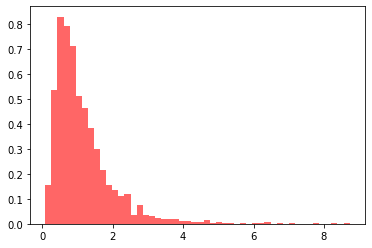

In [49]:
#### same for the mock data (variability)
hist_fsrq_mock_variability, bins_fsrq_mock_variability, _ = plt.hist(year_mean_mock_dist3ffsrq, 
                                                                  bins=int(np.sqrt(LP_df_mockCat_bins_fsrq)), 
                                                                  density=True, color='red', alpha=0.6, label='FSRQ Mock')


hist_fsrq_mock_variability_last = len(hist_fsrq_mock_variability) - np.sum(hist_fsrq_mock_variability[:-1])
# print (last_E100hist_fsrq_variability)

year_mean_mock_dist3ffsrq_list = year_mean_mock_dist3ffsrq.tolist()

new_hist_fsrq_mock_variability = hist_fsrq_mock_variability[:-1] + [hist_fsrq_mock_variability_last]
year_mean_mock_dist3ffsrq_list_new = year_mean_mock_dist3ffsrq_list[:-1] + [len(year_mean_mock_dist3ffsrq_list) - sum(year_mean_mock_dist3ffsrq_list[:-1])]

# year_mean_mock_dist3ffsrq_list_new = [a for a in year_mean_mock_dist3ffsrq_list_new if a>0.0]
print ('check the mean of distrib: ', np.mean(year_mean_mock_dist3ffsrq_list_new))
print ('check length of var mock list: ', len(year_mean_mock_dist3ffsrq_list_new))

BLLac

hist till last: 9.414338724433756
y/m till last:  2068.875219017267
y/m last:  1.1247846
len y/m arr:  2070
check mean of new arr:  1.0
check mean of previous arr:  1.000000001742068


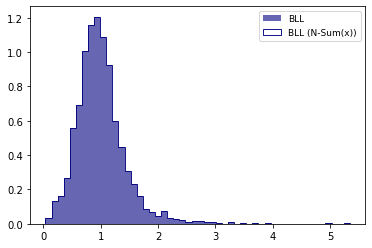

In [50]:
E100hist_bll_variability, E100bins_bll_variability,_= plt.hist(SignifAvg_High_bll_year_frac_avg_arr_flat, density=True, bins=50, color='navy', alpha=0.6, label='BLL')
# print (E100bins_fsrq_variability)
print ('hist till last:', np.sum(E100hist_bll_variability[:-1]))
print ('y/m till last: ', sum(SignifAvg_High_bll_year_frac_avg_arr_flat[:-1]))
print ('y/m last: ', SignifAvg_High_bll_year_frac_avg_arr_flat[-1])
print ('len y/m arr: ', len(SignifAvg_High_bll_year_frac_avg_arr_flat))

last_E100hist_bll_variability = len(E100hist_bll_variability) - np.sum(E100hist_bll_variability[:-1])
# print (last_E100hist_fsrq_variability)

SignifAvg_High_bll_year_frac_avg_arr_flatlist = SignifAvg_High_bll_year_frac_avg_arr_flat.tolist()

newE100_hist_bll_variability = E100hist_bll_variability[:-1] + [last_E100hist_bll_variability]
new_SignifAvg_High_bll_year_frac_avg_arr_flatlist = SignifAvg_High_bll_year_frac_avg_arr_flatlist[:-1] + [len(SignifAvg_High_bll_year_frac_avg_arr_flatlist) - sum(SignifAvg_High_bll_year_frac_avg_arr_flatlist[:-1])]


# print (SignifAvg_High_fsrq_year_frac_avg_arr_flat, new_SignifAvg_High_fsrq_year_frac_avg_arr_flatlist)

print ('check mean of new arr: ', np.mean(new_SignifAvg_High_bll_year_frac_avg_arr_flatlist))
print ('check mean of previous arr: ', np.mean(SignifAvg_High_bll_year_frac_avg_arr_flatlist))

plt.hist(new_SignifAvg_High_bll_year_frac_avg_arr_flatlist, density=True, bins=50,  alpha=0.9, 
         edgecolor='navy', histtype='stepfilled', fill=False, label='BLL (N-Sum(x))')
plt.legend(fontsize=9)

check the mean of distrib bll:  1.0000000000000002
check length of var mock list bll:  6000


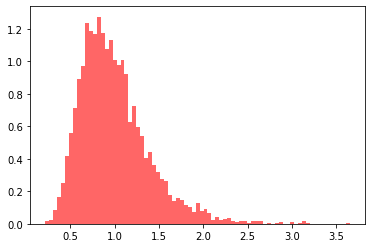

In [51]:
#### same for the mock data (variability)
hist_bll_mock_variability, bins_bll_mock_variability, _ = plt.hist(year_mean_mock_dist3fbll, 
                                                                  bins=int(np.sqrt(LP_df_mockCat_bins_bll)), 
                                                                  density=True, color='red', alpha=0.6, label='FSRQ Mock')


hist_bll_mock_variability_last = len(hist_bll_mock_variability) - np.sum(hist_bll_mock_variability[:-1])
# print (last_E100hist_fsrq_variability)

year_mean_mock_dist3fbll_list = year_mean_mock_dist3fbll.tolist()

new_hist_bll_mock_variability = hist_bll_mock_variability[:-1] + [hist_bll_mock_variability_last]
year_mean_mock_dist3fbll_list_new = year_mean_mock_dist3fbll_list[:-1] + [len(year_mean_mock_dist3fbll_list) - sum(year_mean_mock_dist3fbll_list[:-1])]

print ('check the mean of distrib bll: ', np.mean(year_mean_mock_dist3fbll_list_new))
print ('check length of var mock list bll: ', len(year_mean_mock_dist3fbll_list_new))

In [ ]:
int(np.sqrt(v22LP_df_bll.shape[0]))

33

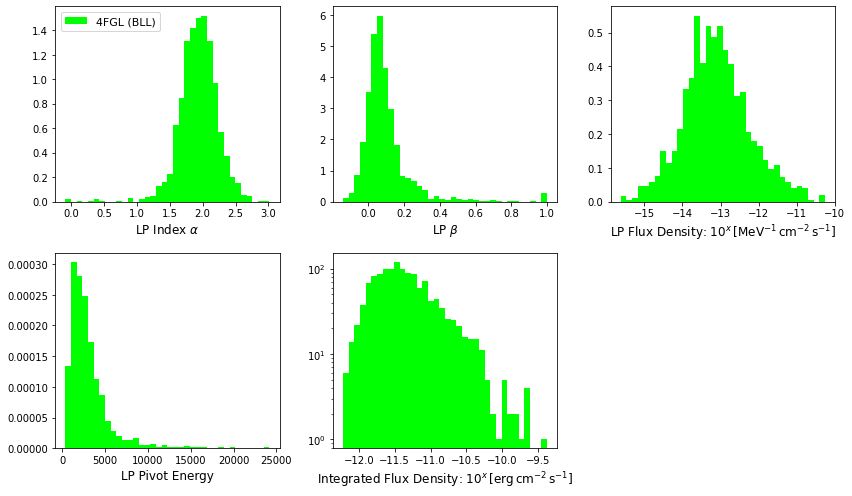

In [52]:
fig  = plt.figure(figsize=(12, 7))
plt.subplot(2, 3, 1)

AGNs_bll_bins = int(np.sqrt(v22LP_df_bll.shape[0]))

plt.hist(v22LP_df_bll['LP_index'], density=True, bins=AGNs_bll_bins, color='lime', label='4FGL (BLL)')
plt.xlabel(r'LP Index $\alpha$', fontsize=12)
plt.legend(fontsize=11)

plt.subplot(2, 3, 2)
plt.hist(v22LP_df_bll['LP_beta'], density=True, bins=AGNs_bll_bins, color='lime', label='4FGL (BLL)')
plt.xlabel(r'LP $\beta$', fontsize=12)

plt.subplot(2, 3, 3)
plt.hist(np.log10(v22LP_df_bll['LP_f_density']), density=True, bins=AGNs_bll_bins, color='lime', label='4FGL (BLL)')
plt.xlabel(r'LP Flux Density: $10^{x}\, [\mathrm{MeV}^{-1}\, \mathrm{cm}^{-2}\, \mathrm{s}^{-1}]$', fontsize=12)

plt.subplot(2, 3, 4)
plt.hist(v22LP_df_bll['Piv_En'],  density=True, bins=AGNs_bll_bins, color='lime', label='4FGL (BLL)')
plt.xlabel(r'LP Pivot Energy', fontsize=12)

plt.subplot(2, 3, 5)
plt.hist(np.log10(v22LP_df_bll['En_flux_100']),   density=False, bins=AGNs_bll_bins, color='lime', label='4FGL (BLL)')
plt.yscale('log')
plt.xlabel(r'Integrated Flux Density: $10^{x}\, [\mathrm{erg}\, \mathrm{cm}^{-2}\, \mathrm{s}^{-1}]$', 
           fontsize=12)



plt.tight_layout()
# plt.savefig('/content/drive/My Drive/Colab Notebooks/fermi-lat/bll-4fgl_org.png', dpi=300)

### Dealing with Lower bins in $E_{100} [\text{erg}\, \text{cm}^{-2}\, \text{s}^{-1}]$ 

[BLLacs]

9 120.0
minimum bin boundary:  -12.219941 -12.14088
shape of selected bins:  (4,)
selected bins:  [-12.061819  -11.982758  -11.903697  -11.8246355]
check extended bins bll list:  [-12.299003, -12.219941, -12.14088, -12.061819, -11.982758, -11.903697, -11.8246355]
check fit values: coeff and intercept:  2.5024688 31.551788
with 1 sigma std values:  [  7.6148324  11.3838005  17.235882   26.744026   42.86772    70.41688
 117.151665 ]
with 2 sigma std values: [  9.758939  13.829521  20.102606  30.689613  49.99761   85.545395
 150.13797 ]
original values:  [ 6. 14. 22. 37. 68. 82.]
[7.6148322793748635, 11.38380082743037, 17.23588175572183, 26.74402575663938, 42.86771990977882, 70.41687600571413, 117.15166737403001, 87.0, 98.0, 99.0, 120.0, 98.0, 88.0, 86.0, 59.0, 71.0, 42.0, 44.0, 35.0, 26.0, 25.0, 21.0, 16.0, 15.0, 15.0, 11.0, 5.0, 2.0, 1.0, 5.0, 2.0, 2.0, 1.0, 4.0, 0.0, 0.0, 1.0]
37 36
[-12.219941139221191, -12.14087963104248, -12.061819076538086, -11.982757568359375, -11.90369701385498, 

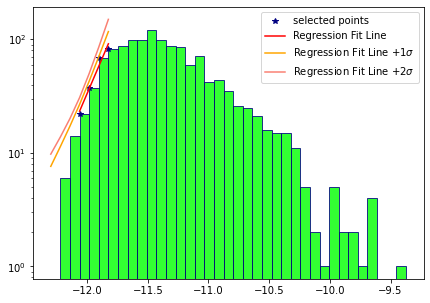

In [53]:
fig = plt.figure(figsize=(7, 5))
ax1 = fig.add_subplot(111)

E100hist_bll, E100bins_bll,_ = plt.hist(np.log10(v22LP_df_bll['En_flux_100']), bins=AGNs_bll_bins, 
                                density=False, alpha=0.8, edgecolor='navy', color='lime')

E100hist_list_bll = E100hist_bll.tolist()

print (np.argmax(E100hist_bll), np.max(E100hist_bll))
print ('minimum bin boundary: ', E100bins_bll[0], E100bins_bll[1])

selected_hist1_bll_fit = E100hist_bll[2:6]
selected_hist1_bll = E100hist_bll[0:6]
selected_hist1_list_bll_fit = [np.log10(k) for k in selected_hist1_bll_fit]


E100bins_bll_list = E100bins_bll.tolist()
selected_bins1_bll_fit = E100bins_bll[2:6] 
selected_bins1_bll = E100bins_bll[0:6]

print ('shape of selected bins: ', selected_bins1_bll_fit.shape)
print ('selected bins: ', selected_bins1_bll_fit)
selected_bins1_list_bll_fit = [i for i in selected_bins1_bll_fit]
selected_bins1_list_bll = [i for i in selected_bins1_bll]
selected_bins1_list_bll_extended = [selected_bins1_list_bll[0]-selected_bins1_list_bll[1] + selected_bins1_list_bll[0]] + selected_bins1_list_bll
print ('check extended bins bll list: ', selected_bins1_list_bll_extended)

ax1.plot(selected_bins1_list_bll_fit, np.power(10, selected_hist1_list_bll_fit), linestyle='None', marker='*', color='navy', 
        label='selected points')
ax1.set_yscale('log')

from sklearn.linear_model import LinearRegression
reg_bll = LinearRegression(fit_intercept=True)
reg_bll.fit(np.reshape(selected_bins1_list_bll_fit, (-1, 1)), selected_hist1_list_bll_fit)
# # reg.fit(selected_bins1_list, selected_hist1_list)
# print ('check fit values: intercept: ', reg_bll.intercept_)
print ('check fit values: coeff and intercept: ', reg_bll.coef_[0], reg_bll.intercept_)

hist_vals_bll_check = [(reg_bll.coef_[0] * i + reg_bll.intercept_) for i in selected_bins1_list_bll_fit]
hist_vals_bll_check_extended = [(reg_bll.coef_[0] * i + reg_bll.intercept_) for i in selected_bins1_list_bll_extended]
selected_bins1_bll_extended_arr = np.array(selected_bins1_list_bll_extended)

y_err1sig_bll = selected_bins1_bll_extended_arr.std() * np.sqrt(1/len(selected_bins1_bll_extended_arr) + (selected_bins1_bll_extended_arr - selected_bins1_bll_extended_arr.mean())**2 / np.sum((selected_bins1_bll_extended_arr - selected_bins1_bll_extended_arr.mean())**2))
y_err2sig_bll = (2*selected_bins1_bll_extended_arr.std()) * np.sqrt(1/len(selected_bins1_bll_extended_arr) + (selected_bins1_bll_extended_arr - selected_bins1_bll_extended_arr.mean())**2 / np.sum((selected_bins1_bll_extended_arr - selected_bins1_bll_extended_arr.mean())**2))

# # hist_vals = [reg.coef_ * i + reg.intercept_ for i in selected_bins1_list]
# print ('fitted hist vals: ', hist_vals_bll)

plt.plot(selected_bins1_list_bll_fit, np.power(10, hist_vals_bll_check), color='red', label='Regression Fit Line')
# # plt.plot(selected_bins1_list_bll, np.power(10, hist_vals_bll_check), color='orange', label='Regression Fit Line (c)')

check_area1sigl_bll = hist_vals_bll_check_extended - y_err1sig_bll
check_area1sigh_bll = hist_vals_bll_check_extended + y_err1sig_bll
check_area2sigh_bll = hist_vals_bll_check_extended + y_err2sig_bll

# # ax1.fill_between(selected_bins1_list_bll, np.power(10, check_area1), np.power(10, check_area2), alpha=0.2)

plt.plot(selected_bins1_list_bll_extended, np.power(10, check_area1sigh_bll), color='orange', label=r'Regression Fit Line $+ 1 \sigma$')
plt.plot(selected_bins1_list_bll_extended, np.power(10, check_area2sigh_bll), color='salmon', label=r'Regression Fit Line $+ 2 \sigma$')

print ('with 1 sigma std values: ', np.power(10, check_area1sigh_bll))
print ('with 2 sigma std values:', np.power(10, check_area2sigh_bll))
print ('original values: ', E100hist_bll[0:6])



check_area1sigh_bll_list = check_area1sigh_bll.tolist()
check_area1sigh_bll_list_pow = [10**i for i in check_area1sigh_bll_list] 

E100hist_list_bll_high = E100hist_list_bll[6:]
E100bins_bll_list_high = E100bins_bll_list[6:]


E100hist_list_bll_combined = check_area1sigh_bll_list_pow + E100hist_list_bll_high
E100bins_bll_list_combined = selected_bins1_list_bll_extended + E100bins_bll_list_high

plt.legend(fontsize=10)

print (E100hist_list_bll_combined)
print (len(E100hist_list_bll_combined), len(E100hist_list_bll))


print (E100bins_bll_list)
print ('\n')
print (E100bins_bll_list_combined)

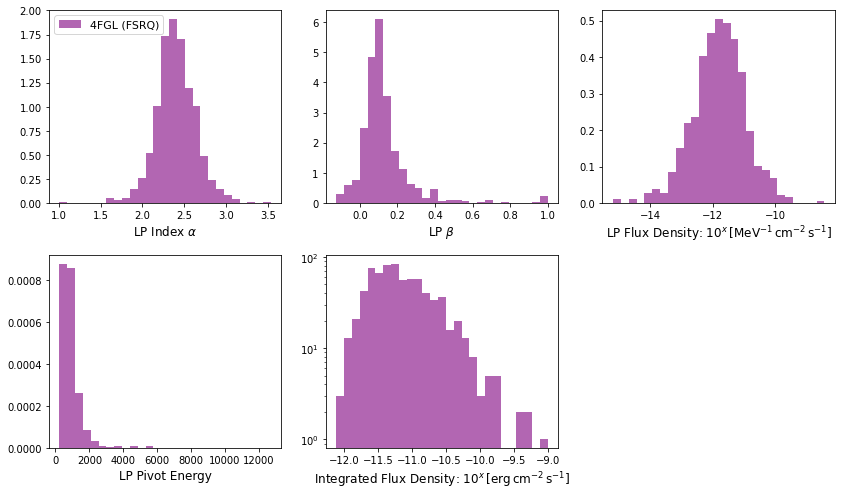

In [54]:
fig  = plt.figure(figsize=(12, 7))
plt.subplot(2, 3, 1)

AGNs_fsrq_bins = int(np.sqrt(v22LP_df_fsrq.shape[0]))

plt.hist(v22LP_df_fsrq['LP_index'], density=True, bins=AGNs_fsrq_bins, color='purple', alpha=0.6, label='4FGL (FSRQ)')
plt.xlabel(r'LP Index $\alpha$', fontsize=12)
plt.legend(fontsize=11)

plt.subplot(2, 3, 2)
plt.hist(v22LP_df_fsrq['LP_beta'], density=True, bins=AGNs_fsrq_bins, color='purple', alpha=0.6, label='4FGL (FSRQ)')
plt.xlabel(r'LP $\beta$', fontsize=12)

plt.subplot(2, 3, 3)
plt.hist(np.log10(v22LP_df_fsrq['LP_f_density']), density=True, bins=AGNs_fsrq_bins, color='purple', alpha=0.6, 
         label='4FGL (FSRQ)')
plt.xlabel(r'LP Flux Density: $10^{x}\, [\mathrm{MeV}^{-1}\, \mathrm{cm}^{-2}\, \mathrm{s}^{-1}]$', fontsize=12)

plt.subplot(2, 3, 4)
plt.hist(v22LP_df_fsrq['Piv_En'],  density=True, bins=AGNs_fsrq_bins, color='purple', alpha=0.6, label='4FGL (FSRQ)')
plt.xlabel(r'LP Pivot Energy', fontsize=12)

plt.subplot(2, 3, 5)
plt.hist(np.log10(v22LP_df_fsrq['En_flux_100']),   density=False, bins=AGNs_fsrq_bins, color='purple', alpha=0.6, 
         label='4FGL (FSRQ)')
plt.yscale('log')
plt.xlabel(r'Integrated Flux Density: $10^{x}\, [\mathrm{erg}\, \mathrm{cm}^{-2}\, \mathrm{s}^{-1}]$', 
           fontsize=12)

plt.tight_layout()

### $E_{100}$ for FSRQs 

7 84.0
minimum bin boundary:  -12.115934 -12.000607
check extended bins fsrq list:  [-12.231262, -12.115934, -12.000607, -11.885279, -11.769951, -11.654622]
check fit values: coeff and intercept:  2.3968182 29.817276
with 1 sigma std values:  [  4.4026527   7.666619   13.733731   25.954174   51.744446  106.12457  ]
with 2 sigma std values: [  6.1131287   9.808975   16.65606    31.476828   66.20389   147.35512  ]
original values:  [ 3. 13. 21. 42. 75.]
hist values combined:  [4.402652701379663, 7.6666185919195415, 13.733730919901245, 25.95417449036661, 51.74444467525364, 106.12457493174126, 67.0, 82.0, 84.0, 56.0, 58.0, 57.0, 40.0, 34.0, 36.0, 16.0, 20.0, 13.0, 8.0, 3.0, 5.0, 5.0, 0.0, 0.0, 2.0, 2.0, 0.0, 1.0]
28 27
org bins:  [-12.115934371948242, -12.000606536865234, -11.885278701782227, -11.769950866699219, -11.654622077941895, -11.539294242858887, -11.423966407775879, -11.308638572692871, -11.193310737609863, -11.077982902526855, -10.962655067443848, -10.847326278686523, -10.7319984

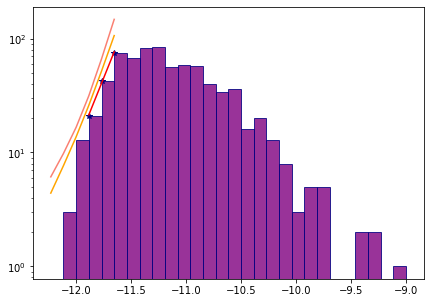

In [57]:
fig = plt.figure(figsize=(7, 5))
ax1 = fig.add_subplot(111)

E100hist_fsrq, E100bins_fsrq,_ = plt.hist(np.log10(v22LP_df_fsrq['En_flux_100']), bins=AGNs_fsrq_bins, 
                                density=False, alpha=0.8, edgecolor='navy', color='purple')

E100hist_list_fsrq = E100hist_fsrq.tolist()

print (np.argmax(E100hist_fsrq), np.max(E100hist_fsrq))
print ('minimum bin boundary: ', E100bins_fsrq[0], E100bins_fsrq[1])

selected_hist1_fsrq_fit = E100hist_fsrq[2:5]
selected_hist1_fsrq = E100hist_fsrq[0:5]
selected_hist1_list_fsrq_fit = [np.log10(k) for k in selected_hist1_fsrq_fit]


E100bins_fsrq_list = E100bins_fsrq.tolist()
selected_bins1_fsrq_fit = E100bins_fsrq[2:5] 
selected_bins1_fsrq = E100bins_fsrq[0:5]

# print ('shape of selected bins: ', selected_bins1_bll_fit.shape)
# print ('selected bins: ', selected_bins1_bll_fit)
selected_bins1_list_fsrq_fit = [i for i in selected_bins1_fsrq_fit]
selected_bins1_list_fsrq = [i for i in selected_bins1_fsrq]
selected_bins1_list_fsrq_extended = [selected_bins1_list_fsrq[0]-selected_bins1_list_fsrq[1] + selected_bins1_list_fsrq[0]] + selected_bins1_list_fsrq
print ('check extended bins fsrq list: ', selected_bins1_list_fsrq_extended)

ax1.plot(selected_bins1_list_fsrq_fit, np.power(10, selected_hist1_list_fsrq_fit), linestyle='None', marker='*', color='navy', 
        label='selected points')
ax1.set_yscale('log')

from sklearn.linear_model import LinearRegression
reg_fsrq = LinearRegression(fit_intercept=True)
reg_fsrq.fit(np.reshape(selected_bins1_list_fsrq_fit, (-1, 1)), selected_hist1_list_fsrq_fit)
# # # reg.fit(selected_bins1_list, selected_hist1_list)
# # print ('check fit values: intercept: ', reg_bll.intercept_)
print ('check fit values: coeff and intercept: ', reg_fsrq.coef_[0], reg_fsrq.intercept_)

hist_vals_fsrq_check = [(reg_fsrq.coef_[0] * i + reg_fsrq.intercept_) for i in selected_bins1_list_fsrq_fit]
hist_vals_fsrq_check_extended = [(reg_fsrq.coef_[0] * i + reg_fsrq.intercept_) for i in selected_bins1_list_fsrq_extended]
selected_bins1_fsrq_extended_arr = np.array(selected_bins1_list_fsrq_extended)

y_err1sig_fsrq = selected_bins1_fsrq_extended_arr.std() * np.sqrt(1/len(selected_bins1_fsrq_extended_arr) + (selected_bins1_fsrq_extended_arr - selected_bins1_fsrq_extended_arr.mean())**2 / np.sum((selected_bins1_fsrq_extended_arr - selected_bins1_fsrq_extended_arr.mean())**2))
y_err2sig_fsrq = (2*selected_bins1_fsrq_extended_arr.std()) * np.sqrt(1/len(selected_bins1_fsrq_extended_arr) + (selected_bins1_fsrq_extended_arr - selected_bins1_fsrq_extended_arr.mean())**2 / np.sum((selected_bins1_fsrq_extended_arr - selected_bins1_fsrq_extended_arr.mean())**2))

# # # hist_vals = [reg.coef_ * i + reg.intercept_ for i in selected_bins1_list]
# # print ('fitted hist vals: ', hist_vals_bll)

plt.plot(selected_bins1_list_fsrq_fit, np.power(10, hist_vals_fsrq_check), color='red', label='Regression Fit Line')
# # # plt.plot(selected_bins1_list_bll, np.power(10, hist_vals_bll_check), color='orange', label='Regression Fit Line (c)')

check_area1sigl_fsrq = hist_vals_fsrq_check_extended - y_err1sig_fsrq
check_area1sigh_fsrq = hist_vals_fsrq_check_extended + y_err1sig_fsrq
check_area2sigh_fsrq = hist_vals_fsrq_check_extended + y_err2sig_fsrq

# # # ax1.fill_between(selected_bins1_list_bll, np.power(10, check_area1), np.power(10, check_area2), alpha=0.2)

plt.plot(selected_bins1_list_fsrq_extended, np.power(10, check_area1sigh_fsrq), color='orange', label=r'Regression Fit Line $+ 1 \sigma$')
plt.plot(selected_bins1_list_fsrq_extended, np.power(10, check_area2sigh_fsrq), color='salmon', label=r'Regression Fit Line $+ 2 \sigma$')

print ('with 1 sigma std values: ', np.power(10, check_area1sigh_fsrq))
print ('with 2 sigma std values:', np.power(10, check_area2sigh_fsrq))
print ('original values: ', E100hist_fsrq[0:5])



check_area1sigh_fsrq_list = check_area1sigh_fsrq.tolist()
check_area1sigh_fsrq_list_pow = [10**i for i in check_area1sigh_fsrq_list] 

E100hist_list_fsrq_high = E100hist_list_fsrq[5:]
E100bins_fsrq_list_high = E100bins_fsrq_list[5:]


E100hist_list_fsrq_combined = check_area1sigh_fsrq_list_pow + E100hist_list_fsrq_high
E100bins_fsrq_list_combined = selected_bins1_list_fsrq_extended + E100bins_fsrq_list_high

# plt.legend(fontsize=10)

print ('hist values combined: ', E100hist_list_fsrq_combined)
print (len(E100hist_list_fsrq_combined), len(E100hist_list_fsrq))


print ('org bins: ', E100bins_fsrq_list)
print ('\n')
print ('combined bins: ', E100bins_fsrq_list_combined)

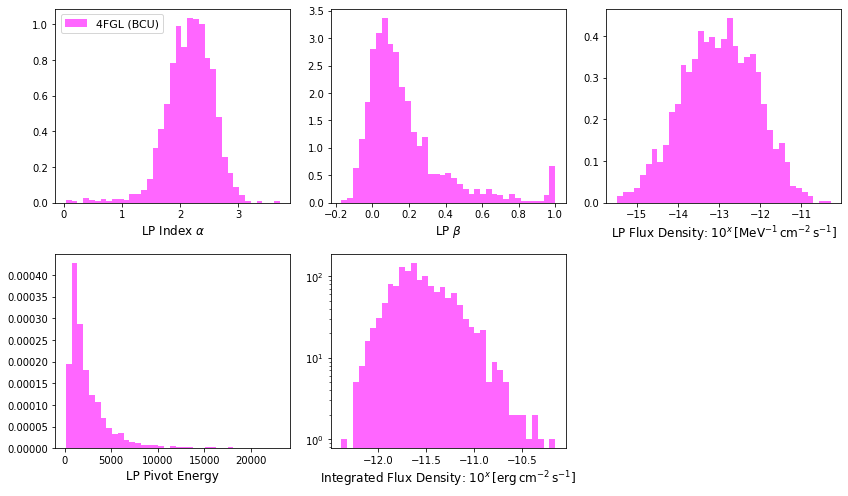

In [58]:
fig  = plt.figure(figsize=(12, 7))
plt.subplot(2, 3, 1)

AGNs_bcu_bins = int(np.sqrt(v22LP_df_bcu.shape[0]))

plt.hist(v22LP_df_bcu['LP_index'], density=True, bins=AGNs_bcu_bins, color='magenta', alpha=0.6, label='4FGL (BCU)')
plt.xlabel(r'LP Index $\alpha$', fontsize=12)
plt.legend(fontsize=11)

plt.subplot(2, 3, 2)
plt.hist(v22LP_df_bcu['LP_beta'], density=True, bins=AGNs_bcu_bins, color='magenta', alpha=0.6, label='4FGL (BCU)')
plt.xlabel(r'LP $\beta$', fontsize=12)

plt.subplot(2, 3, 3)
plt.hist(np.log10(v22LP_df_bcu['LP_f_density']), density=True, bins=AGNs_bcu_bins, color='magenta', alpha=0.6, 
         label='4FGL (BCU)')
plt.xlabel(r'LP Flux Density: $10^{x}\, [\mathrm{MeV}^{-1}\, \mathrm{cm}^{-2}\, \mathrm{s}^{-1}]$', fontsize=12)

plt.subplot(2, 3, 4)
plt.hist(v22LP_df_bcu['Piv_En'],  density=True, bins=AGNs_bcu_bins, color='magenta', alpha=0.6, label='4FGL (BCU)')
plt.xlabel(r'LP Pivot Energy', fontsize=12)

plt.subplot(2, 3, 5)
plt.hist(np.log10(v22LP_df_bcu['En_flux_100']),   density=False, bins=AGNs_bcu_bins, color='magenta', alpha=0.6, 
         label='4FGL (BCU)')
plt.yscale('log')
plt.xlabel(r'Integrated Flux Density: $10^{x}\, [\mathrm{erg}\, \mathrm{cm}^{-2}\, \mathrm{s}^{-1}]$', 
           fontsize=12)

plt.tight_layout()

## $E_{100}$ for BCUs

12 146.0
minimum bin boundary:  -12.378695 -12.318516
check extended bins bcu list:  [-12.438873, -12.378695, -12.318516, -12.258336, -12.198157, -12.137978, -12.077799, -12.017619, -11.95744, -11.897261, -11.837082, -11.776902]
check fit values: coeff and intercept:  2.4142041 30.53622
with 1 sigma std values:  [  4.159574   5.624103   7.624468  10.378614  14.215633  19.64535
  27.450129  38.781277  55.279316  79.28772  114.18714  164.88539 ]
with 2 sigma std values: [  5.3933277   7.0563655   9.281344   12.3079     16.525438   22.586842
  31.560228   45.082592   65.555214   96.51775   143.26657   213.79147  ]
original values:  [ 1.  0.  5.  8. 16. 23.]
hist values combined:  [4.159573798128265, 5.624103269164843, 7.624467883978165, 10.37861467042182, 14.21563381203854, 19.645348611415926, 27.45012918062413, 38.78127589812782, 55.27931485296437, 79.2877188378466, 114.18713789917796, 164.8853837759457, 117.0, 146.0, 90.0, 102.0, 76.0, 64.0, 73.0, 55.0, 63.0, 44.0, 30.0, 24.0, 20.0, 22.

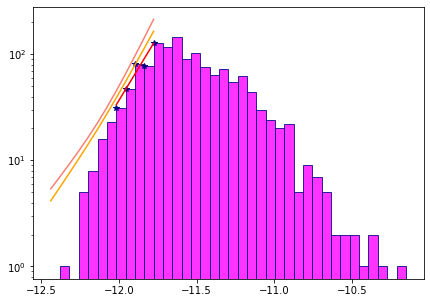

In [59]:
fig = plt.figure(figsize=(7, 5))
ax1 = fig.add_subplot(111)

E100hist_bcu, E100bins_bcu,_ = plt.hist(np.log10(v22LP_df_bcu['En_flux_100']), bins=AGNs_bcu_bins, 
                                density=False, alpha=0.8, edgecolor='navy', color='magenta')

E100hist_list_bcu = E100hist_bcu.tolist()

print (np.argmax(E100hist_bcu), np.max(E100hist_bcu))
print ('minimum bin boundary: ', E100bins_bcu[0], E100bins_bcu[1])

selected_hist1_bcu_fit = E100hist_bcu[6:11]
selected_hist1_bcu = E100hist_bcu[0:11]
selected_hist1_list_bcu_fit = [np.log10(k) for k in selected_hist1_bcu_fit]


E100bins_bcu_list = E100bins_bcu.tolist()
selected_bins1_bcu_fit = E100bins_bcu[6:11] 
selected_bins1_bcu = E100bins_bcu[0:11]

# # print ('shape of selected bins: ', selected_bins1_bll_fit.shape)
# # print ('selected bins: ', selected_bins1_bll_fit)
selected_bins1_list_bcu_fit = [i for i in selected_bins1_bcu_fit]
selected_bins1_list_bcu = [i for i in selected_bins1_bcu]
selected_bins1_list_bcu_extended = [selected_bins1_list_bcu[0]-selected_bins1_list_bcu[1] + selected_bins1_list_bcu[0]] + selected_bins1_list_bcu
print ('check extended bins bcu list: ', selected_bins1_list_bcu_extended)

ax1.plot(selected_bins1_list_bcu_fit, np.power(10, selected_hist1_list_bcu_fit), 
         linestyle='None', marker='*', color='navy', label='selected points')
ax1.set_yscale('log')

from sklearn.linear_model import LinearRegression
reg_bcu = LinearRegression(fit_intercept=True)
reg_bcu.fit(np.reshape(selected_bins1_list_bcu_fit, (-1, 1)), selected_hist1_list_bcu_fit)
# # # # reg.fit(selected_bins1_list, selected_hist1_list)
# # # print ('check fit values: intercept: ', reg_bll.intercept_)
print ('check fit values: coeff and intercept: ', reg_bcu.coef_[0], reg_bcu.intercept_)

hist_vals_bcu_check = [(reg_bcu.coef_[0] * i + reg_bcu.intercept_) for i in selected_bins1_list_bcu_fit]
hist_vals_bcu_check_extended = [(reg_bcu.coef_[0] * i + reg_bcu.intercept_) for i in selected_bins1_list_bcu_extended]
selected_bins1_bcu_extended_arr = np.array(selected_bins1_list_bcu_extended)

y_err1sig_bcu = selected_bins1_bcu_extended_arr.std() * np.sqrt(1/len(selected_bins1_bcu_extended_arr) + (selected_bins1_bcu_extended_arr - selected_bins1_bcu_extended_arr.mean())**2 / np.sum((selected_bins1_bcu_extended_arr - selected_bins1_bcu_extended_arr.mean())**2))
y_err2sig_bcu = (2*selected_bins1_bcu_extended_arr.std()) * np.sqrt(1/len(selected_bins1_bcu_extended_arr) + (selected_bins1_bcu_extended_arr - selected_bins1_bcu_extended_arr.mean())**2 / np.sum((selected_bins1_bcu_extended_arr - selected_bins1_bcu_extended_arr.mean())**2))

# # # # hist_vals = [reg.coef_ * i + reg.intercept_ for i in selected_bins1_list]
# # # print ('fitted hist vals: ', hist_vals_bll)

plt.plot(selected_bins1_list_bcu_fit, np.power(10, hist_vals_bcu_check), color='red', label='Regression Fit Line')
# # # # plt.plot(selected_bins1_list_bll, np.power(10, hist_vals_bll_check), color='orange', label='Regression Fit Line (c)')

check_area1sigl_bcu = hist_vals_bcu_check_extended - y_err1sig_bcu
check_area1sigh_bcu = hist_vals_bcu_check_extended + y_err1sig_bcu
check_area2sigh_bcu = hist_vals_bcu_check_extended + y_err2sig_bcu


plt.plot(selected_bins1_list_bcu_extended, np.power(10, check_area1sigh_bcu), color='orange', label=r'Regression Fit Line $+ 1 \sigma$')
plt.plot(selected_bins1_list_bcu_extended, np.power(10, check_area2sigh_bcu), color='salmon', label=r'Regression Fit Line $+ 2 \sigma$')

print ('with 1 sigma std values: ', np.power(10, check_area1sigh_bcu))
print ('with 2 sigma std values:', np.power(10, check_area2sigh_bcu))
print ('original values: ', E100hist_bcu[0:6])



check_area1sigh_bcu_list = check_area1sigh_bcu.tolist()
check_area1sigh_bcu_list_pow = [10**i for i in check_area1sigh_bcu_list] 

E100hist_list_bcu_high = E100hist_list_bcu[11:]
E100bins_bcu_list_high = E100bins_bcu_list[11:]


E100hist_list_bcu_combined = check_area1sigh_bcu_list_pow + E100hist_list_bcu_high
E100bins_bcu_list_combined = selected_bins1_list_bcu_extended + E100bins_bcu_list_high

# # plt.legend(fontsize=10)

print ('hist values combined: ', E100hist_list_bcu_combined)
print (len(E100hist_list_bcu_combined), len(E100hist_list_bcu))


print ('org bins: ', E100bins_bcu_list)
print ('\n')
print ('combined bins: ', E100bins_bcu_list_combined)

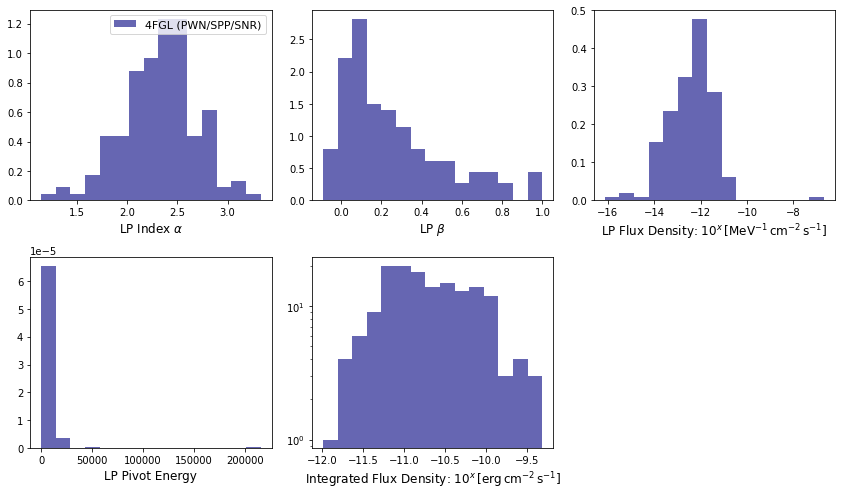

In [60]:
fig  = plt.figure(figsize=(12, 7))
plt.subplot(2, 3, 1)

AGNs_spp_pwn_snr_bins = 15 #int(np.sqrt(v22LP_df_pwn_spp_snr.shape[0]))

plt.hist(v22LP_df_pwn_spp_snr['LP_index'], density=True, bins=AGNs_spp_pwn_snr_bins, color='navy', alpha=0.6, label='4FGL (PWN/SPP/SNR)')
plt.xlabel(r'LP Index $\alpha$', fontsize=12)
plt.legend(fontsize=11)

plt.subplot(2, 3, 2)
plt.hist(v22LP_df_pwn_spp_snr['LP_beta'], density=True, bins=AGNs_spp_pwn_snr_bins, color='navy', alpha=0.6, label='4FGL (PWN/SPP/SNR)')
plt.xlabel(r'LP $\beta$', fontsize=12)

plt.subplot(2, 3, 3)
plt.hist(np.log10(v22LP_df_pwn_spp_snr['LP_f_density']), density=True, bins=AGNs_spp_pwn_snr_bins, color='navy', alpha=0.6, 
         label='4FGL (PWN/SPP/SNR)')
plt.xlabel(r'LP Flux Density: $10^{x}\, [\mathrm{MeV}^{-1}\, \mathrm{cm}^{-2}\, \mathrm{s}^{-1}]$', fontsize=12)

plt.subplot(2, 3, 4)
plt.hist(v22LP_df_pwn_spp_snr['Piv_En'],  density=True, bins=AGNs_spp_pwn_snr_bins, color='navy', alpha=0.6, label='4FGL (PWN/SPP/SNR)')
plt.xlabel(r'LP Pivot Energy', fontsize=12)

plt.subplot(2, 3, 5)
plt.hist(np.log10(v22LP_df_pwn_spp_snr['En_flux_100']),   density=False, bins=AGNs_spp_pwn_snr_bins, color='navy', alpha=0.6, 
         label='4FGL (PWN/SPP/SNR)')
plt.yscale('log')
plt.xlabel(r'Integrated Flux Density: $10^{x}\, [\mathrm{erg}\, \mathrm{cm}^{-2}\, \mathrm{s}^{-1}]$', 
           fontsize=12)

plt.tight_layout()
# plt.savefig('/content/drive/My Drive/Colab Notebooks/PWN_SPP_params.png', dpi=200)

In [61]:
LP_index_mean_bll = v22LP_df_bll['LP_index'].mean()
LP_index_var_bll = v22LP_df_bll['LP_index'].var()

LP_beta_mean_bll = v22LP_df_bll['LP_beta'].mean()
LP_beta_var_bll = v22LP_df_bll['LP_beta'].var()

LP_Fdensity_mean_bll = np.mean(np.log10(v22LP_df_bll['LP_f_density'])) # for conversion 10**(LP_Fdensity_mean)
LP_Fdensity_var_bll = np.var(np.log10(v22LP_df_bll['LP_f_density']))

LP_PEn_mean_bll = np.mean(v22LP_df_bll['Piv_En']) 
LP_PEn_std_bll = np.std(v22LP_df_bll['Piv_En'])

print ('check LP_index_mean: ', LP_index_mean_bll)
print ('check LP_index_var: ', LP_index_var_bll)

print ('check LP_F_Density mean: ', LP_Fdensity_mean_bll)
print ('check LP_F_Density var: ', LP_Fdensity_var_bll)

print ('check LP_PEn mean: ', LP_PEn_mean_bll)
print ('check LP_PEn std: ', LP_PEn_std_bll)

print ('check LP_beta_mean: ', LP_beta_mean_bll)
print ('check LP_beta_var: ', LP_beta_var_bll)

print ('max piv energy in BLL: ', v22LP_df_bll['Piv_En'].max())

check LP_index_mean:  1.9389984607696533
check LP_index_var:  0.0876506045460701
check LP_F_Density mean:  -13.09807014465332
check LP_F_Density var:  0.7443345785140991
check LP_PEn mean:  3054.4609375
check LP_PEn std:  2387.326416015625
check LP_beta_mean:  0.09646789729595184
check LP_beta_var:  0.019541634246706963
max piv energy in BLL:  24191.27734375


In [62]:
LP_index_mean_fsrq = v22LP_df_fsrq['LP_index'].mean()
LP_index_var_fsrq = v22LP_df_fsrq['LP_index'].var()

LP_beta_mean_fsrq = v22LP_df_fsrq['LP_beta'].mean()
LP_beta_var_fsrq = v22LP_df_fsrq['LP_beta'].var()

LP_Fdensity_mean_fsrq = np.mean(np.log10(v22LP_df_fsrq['LP_f_density'])) # for conversion 10**(LP_Fdensity_mean)
LP_Fdensity_var_fsrq = np.var(np.log10(v22LP_df_fsrq['LP_f_density']))

LP_PEn_mean_fsrq = np.mean(v22LP_df_fsrq['Piv_En']) 
LP_PEn_std_fsrq = np.std(v22LP_df_fsrq['Piv_En'])

print ('check LP_index_mean: ', LP_index_mean_fsrq)
print ('check LP_index_var: ', LP_index_var_fsrq)

print ('check LP_F_Density mean: ', LP_Fdensity_mean_fsrq)
print ('check LP_F_Density var: ', LP_Fdensity_var_fsrq)

print ('check LP_PEn mean: ', LP_PEn_mean_fsrq)
print ('check LP_PEn std: ', LP_PEn_std_fsrq)

print ('check LP_beta_mean: ', LP_beta_mean_fsrq)
print ('check LP_beta_var: ', LP_beta_var_fsrq)

print ('max piv energy in FSRQ: ', v22LP_df_fsrq['Piv_En'].max())

check LP_index_mean:  2.403470754623413
check LP_index_var:  0.05808884650468826
check LP_F_Density mean:  -11.79532527923584
check LP_F_Density var:  0.6998057961463928
check LP_PEn mean:  949.0406494140625
check LP_PEn std:  814.9517211914062
check LP_beta_mean:  0.12752006947994232
check LP_beta_var:  0.02007533609867096
max piv energy in FSRQ:  12709.5419921875


In [63]:
LP_index_mean_bcu = v22LP_df_bcu['LP_index'].mean()
LP_index_var_bcu = v22LP_df_bcu['LP_index'].var()

LP_beta_mean_bcu = v22LP_df_bcu['LP_beta'].mean()
LP_beta_var_bcu = v22LP_df_bcu['LP_beta'].var()

LP_Fdensity_mean_bcu = np.mean(np.log10(v22LP_df_bcu['LP_f_density'])) # for conversion 10**(LP_Fdensity_mean)
LP_Fdensity_var_bcu = np.var(np.log10(v22LP_df_bcu['LP_f_density']))

LP_PEn_mean_bcu = np.mean(v22LP_df_bcu['Piv_En']) 
LP_PEn_std_bcu = np.std(v22LP_df_bcu['Piv_En'])

print ('check LP_index_mean: ', LP_index_mean_bcu)
print ('check LP_index_var: ', LP_index_var_bcu)

print ('check LP_F_Density mean: ', LP_Fdensity_mean_bcu)
print ('check LP_F_Density var: ', LP_Fdensity_var_bcu)

print ('check LP_PEn mean: ', LP_PEn_mean_bcu)
print ('check LP_PEn std: ', LP_PEn_std_bcu)

print ('check LP_beta_mean: ', LP_beta_mean_bcu)
print ('check LP_beta_var: ', LP_beta_var_bcu)

print ('max piv energy in BCU: ', v22LP_df_bcu['Piv_En'].max())

check LP_index_mean:  2.1579413414001465
check LP_index_var:  0.16375228762626648
check LP_F_Density mean:  -13.00039291381836
check LP_F_Density var:  0.8008907437324524
check LP_PEn mean:  2600.458251953125
check LP_PEn std:  2556.98291015625
check LP_beta_mean:  0.17359928786754608
check LP_beta_var:  0.047554586082696915
max piv energy in BCU:  23111.09375


In [64]:
LP_index_mean_pwn_spp_snr = v22LP_df_pwn_spp_snr['LP_index'].mean()
LP_index_var_pwn_spp_snr = v22LP_df_pwn_spp_snr['LP_index'].var()

LP_beta_mean_pwn_spp_snr = v22LP_df_pwn_spp_snr['LP_beta'].mean()
LP_beta_var_pwn_spp_snr = v22LP_df_pwn_spp_snr['LP_beta'].var()

LP_Fdensity_mean_pwn_spp_snr = np.mean(np.log10(v22LP_df_pwn_spp_snr['LP_f_density'])) # for conversion 10**(LP_Fdensity_mean)
LP_Fdensity_var_pwn_spp_snr = np.var(np.log10(v22LP_df_pwn_spp_snr['LP_f_density']))

LP_PEn_mean_pwn_spp_snr = np.mean(v22LP_df_pwn_spp_snr['Piv_En']) 
LP_PEn_std_pwn_spp_snr = np.std(v22LP_df_pwn_spp_snr['Piv_En'])

print ('check LP_index_mean: ', LP_index_mean_pwn_spp_snr)
print ('check LP_index_var: ', LP_index_var_pwn_spp_snr)

print ('check LP_F_Density mean: ', LP_Fdensity_mean_pwn_spp_snr)
print ('check LP_F_Density var: ', LP_Fdensity_var_pwn_spp_snr)

print ('check LP_PEn mean: ', LP_PEn_mean_pwn_spp_snr)
print ('check LP_PEn std: ', LP_PEn_std_pwn_spp_snr)

print ('check LP_beta_mean: ', LP_beta_mean_pwn_spp_snr)
print ('check LP_beta_var: ', LP_beta_var_pwn_spp_snr)

print ('max piv energy in PWN/SPP/SNR: ', v22LP_df_pwn_spp_snr['Piv_En'].max())

check LP_index_mean:  2.3257339000701904
check LP_index_var:  0.13202962279319763
check LP_F_Density mean:  -12.391804695129395
check LP_F_Density var:  1.07744300365448
check LP_PEn mean:  5396.333984375
check LP_PEn std:  17687.125
check LP_beta_mean:  0.25728389620780945
check LP_beta_var:  0.0659637376666069
max piv energy in PWN/SPP/SNR:  215093.65625


In [100]:
#### generate params for BLL 

LP_df_mockCat_bins_bll = 10000

LPIndex_mock_dist_bll = np.sqrt(LP_index_var_bll) * np.random.randn(LP_df_mockCat_bins_bll) + LP_index_mean_bll



LPBeta_mock_dist2_bll = np.random.gumbel(LP_beta_mean_bll-0.067, np.sqrt(LP_beta_var_bll)-0.08, 
                                         size=LP_df_mockCat_bins_bll) 
# best for beta

LPFDensity_mock_dist_bll = 10**(np.sqrt(LP_Fdensity_var_bll) * np.random.randn(LP_df_mockCat_bins_bll) + LP_Fdensity_mean_bll) 



logshape1_bll, logloc1_bll, logscale1_bll = lognorm.fit(v22LP_df_bll['Piv_En'], loc=0)
print ('check fit shape, loc and scale, log(scale): ', logshape1_bll, logloc1_bll, logscale1_bll, np.log(logscale1_bll))

LPPivEn_mock_dist3_bll = np.random.lognormal(np.log(logscale1_bll), logshape1_bll, LP_df_mockCat_bins_bll)
LPPivEn_mock_dist3fbll = LPPivEn_mock_dist3_bll[(LPPivEn_mock_dist3_bll<26000.)]

check fit shape, loc and scale, log(scale):  0.6292479510857549 -7.722385013195101 2480.211308203052 7.81609904044988


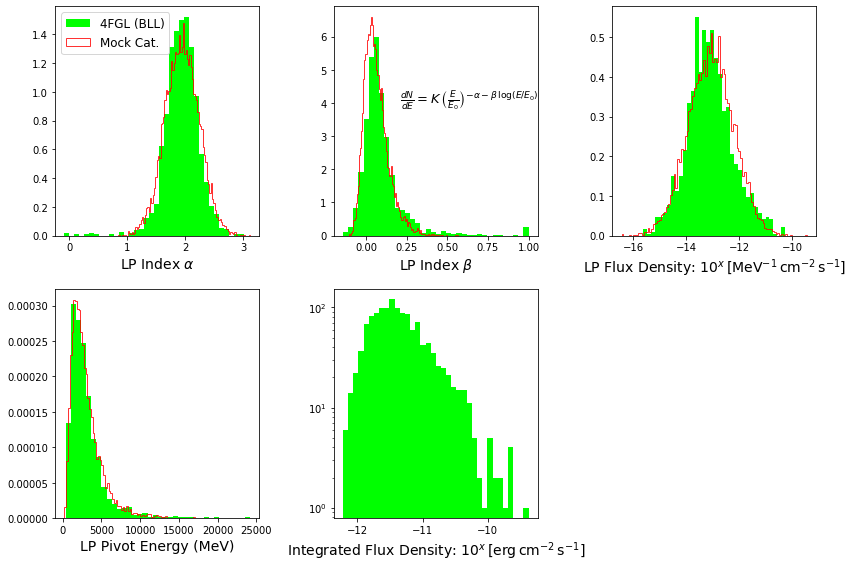

In [101]:
fig = plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.hist(v22LP_df_bll['LP_index'], density=True, bins=AGNs_bll_bins, color='lime', label='4FGL (BLL)')
plt.hist(LPIndex_mock_dist_bll, bins=int(np.sqrt(LP_df_mockCat_bins_bll)), density=True, histtype='stepfilled', 
         edgecolor='red', fill=False, alpha=0.8, label='Mock Cat.')
plt.xlabel(r'LP Index $\alpha$', fontsize=14)
plt.legend(fontsize=12)

plt.subplot(2, 3, 2)
plt.hist(v22LP_df_bll['LP_beta'], density=True, bins=AGNs_bll_bins, color='lime')
plt.hist(LPBeta_mock_dist2_bll, bins=int(np.sqrt(LP_df_mockCat_bins_bll)), density=True, 
         histtype='stepfilled', fill= False, edgecolor='red', alpha=0.8)

plt.text(0.21, 4, 
         r'$\frac{dN}{dE} = K\, \left( \frac{E}{E_0} \right )^{-\alpha -\beta \,  \mathrm{log} (E/E_0)}$', 
        fontsize=13)
plt.xlabel(r'LP Index $\beta$', fontsize=14)

plt.subplot(2, 3, 3)
plt.hist(np.log10(v22LP_df_bll['LP_f_density']), density=True, bins=AGNs_bll_bins, color='lime')
plt.hist(np.log10(LPFDensity_mock_dist_bll), density=True, bins=int(np.sqrt(LP_df_mockCat_bins_bll)), edgecolor='red', 
         histtype='stepfilled', fill=False, alpha=0.8)
plt.xlabel(r'LP Flux Density: $10^{x}\, [\mathrm{MeV}^{-1}\, \mathrm{cm}^{-2}\, \mathrm{s}^{-1}]$', fontsize=14)

plt.subplot(2, 3, 4)
plt.hist(v22LP_df_bll['Piv_En'], density=True, bins=AGNs_bll_bins, color='lime')
plt.hist(LPPivEn_mock_dist3fbll, density=True, bins=int(np.sqrt(LP_df_mockCat_bins_bll)), edgecolor='red', 
         histtype='stepfilled', fill=False, alpha=0.8)
xticksPEn = ['20e3', ]
plt.xlabel(r'LP Pivot Energy (MeV)', fontsize=14)


plt.subplot(2, 3, 5)

plt.hist(np.log10(v22LP_df_bll['En_flux_100']), density=False, bins=AGNs_bll_bins, color='lime')

plt.yscale('log')
plt.xlabel(r'Integrated Flux Density: $10^{x}\, [\mathrm{erg}\, \mathrm{cm}^{-2}\, \mathrm{s}^{-1}]$', 
           fontsize=14)

plt.tight_layout()

# plt.savefig('/content/drive/My Drive/Colab Notebooks/fermi-lat/bll_4fgl_mock.png', dpi=300)
# plt.savefig('/content/drive/My Drive/Colab Notebooks/fermi-lat/bll_4fgl_mock.eps', dpi=300)

In [102]:
#### generate params for fsrq 

LP_df_mockCat_bins_fsrq = 6000

LPIndex_mock_dist_fsrq = np.sqrt(LP_index_var_fsrq) * np.random.randn(LP_df_mockCat_bins_fsrq) + LP_index_mean_fsrq



LPBeta_mock_dist2_fsrq = np.random.gumbel(LP_beta_mean_fsrq-0.080, np.sqrt(LP_beta_var_fsrq)-0.06, 
                                         size=LP_df_mockCat_bins_fsrq) 
# best for beta

LPFDensity_mock_dist_fsrq = 10**(np.sqrt(LP_Fdensity_var_fsrq) * np.random.randn(LP_df_mockCat_bins_fsrq) + LP_Fdensity_mean_fsrq) 


from scipy.stats import expon, lognorm

logshape1_fsrq, logloc1_fsrq, logscale1_fsrq = lognorm.fit(v22LP_df_fsrq['Piv_En'], loc=0)
print ('check fit shape, loc and scale, log(scale): ', logshape1_fsrq, logloc1_fsrq, logscale1_fsrq, np.log(logscale1_fsrq))
LPPivEn_mock_dist3_fsrq = np.random.lognormal(np.log(logscale1_fsrq), logshape1_fsrq, LP_df_mockCat_bins_fsrq)
LPPivEn_mock_dist3ffsrq = LPPivEn_mock_dist3_fsrq[(LPPivEn_mock_dist3_fsrq<13000.)]

check fit shape, loc and scale, log(scale):  0.5157671452107697 -1.5374132159180192 806.4051845917418 6.692586326601671


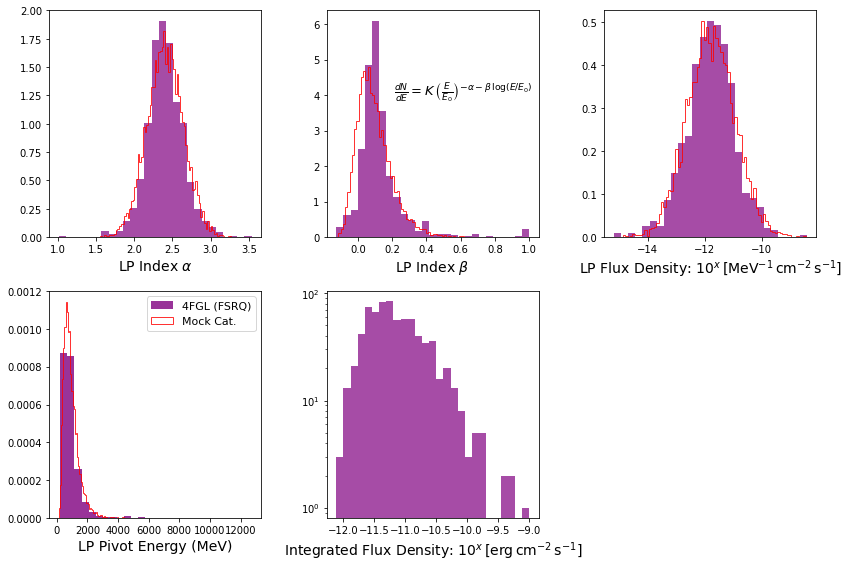

In [103]:
fig = plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.hist(v22LP_df_fsrq['LP_index'], density=True, bins=AGNs_fsrq_bins, color='purple', alpha=0.7, label='4FGL (FSRQ)')
plt.hist(LPIndex_mock_dist_fsrq, bins=int(np.sqrt(LP_df_mockCat_bins_fsrq)), density=True, histtype='stepfilled', 
         edgecolor='red', fill=False, alpha=0.8, label='Mock Cat.')
plt.xlabel(r'LP Index $\alpha$', fontsize=14)


plt.subplot(2, 3, 2)
plt.hist(v22LP_df_fsrq['LP_beta'], density=True, bins=AGNs_fsrq_bins, alpha=0.7, color='purple')
plt.hist(LPBeta_mock_dist2_fsrq, bins=int(np.sqrt(LP_df_mockCat_bins_fsrq)), density=True, 
         histtype='stepfilled', fill= False, edgecolor='red', alpha=0.8)

plt.text(0.21, 4, 
         r'$\frac{dN}{dE} = K\, \left( \frac{E}{E_0} \right )^{-\alpha -\beta \,  \mathrm{log} (E/E_0)}$', 
        fontsize=13)
plt.xlabel(r'LP Index $\beta$', fontsize=14)

plt.subplot(2, 3, 3)
plt.hist(np.log10(v22LP_df_fsrq['LP_f_density']), density=True, bins=AGNs_fsrq_bins, color='purple', alpha=0.7)
plt.hist(np.log10(LPFDensity_mock_dist_fsrq), density=True, bins=int(np.sqrt(LP_df_mockCat_bins_fsrq)), edgecolor='red', 
         histtype='stepfilled', fill=False, alpha=0.8)
plt.xlabel(r'LP Flux Density: $10^{x}\, [\mathrm{MeV}^{-1}\, \mathrm{cm}^{-2}\, \mathrm{s}^{-1}]$', fontsize=14)

plt.subplot(2, 3, 4)
plt.hist(v22LP_df_fsrq['Piv_En'], density=True, bins=AGNs_fsrq_bins, color='purple', alpha=0.8, label='4FGL (FSRQ)')
plt.hist(LPPivEn_mock_dist3ffsrq, density=True, bins=int(np.sqrt(LP_df_mockCat_bins_fsrq)), edgecolor='red', 
         histtype='stepfilled', fill=False, alpha=0.8, label='Mock Cat.')
xticksPEn = ['20e3', ]
plt.xlabel(r'LP Pivot Energy (MeV)', fontsize=14)
plt.legend(fontsize=11)

plt.subplot(2, 3, 5)

plt.hist(np.log10(v22LP_df_fsrq['En_flux_100']), density=False, bins=AGNs_fsrq_bins, color='purple', alpha=0.7)

plt.yscale('log')
plt.xlabel(r'Integrated Flux Density: $10^{x}\, [\mathrm{erg}\, \mathrm{cm}^{-2}\, \mathrm{s}^{-1}]$', 
           fontsize=14)



plt.tight_layout()
# plt.savefig('/content/drive/My Drive/Colab Notebooks/fermi-lat/fsrq_4fgl_mock.png', dpi=300)
# plt.savefig('/content/drive/My Drive/Colab Notebooks/fermi-lat/fsrq_4fgl_mock.eps', dpi=400)

In [104]:
#### generate params for BCU 

LP_df_mockCat_bins_bcu = 11000

LPIndex_mock_dist_bcu = np.sqrt(LP_index_var_bcu) * np.random.randn(LP_df_mockCat_bins_bcu) + LP_index_mean_bcu



LPBeta_mock_dist2_bcu = np.random.gumbel(LP_beta_mean_bcu-0.067, np.sqrt(LP_beta_var_bcu)-0.07, 
                                         size=LP_df_mockCat_bins_bcu) 
# best for beta

LPFDensity_mock_dist_bcu = 10**(np.sqrt(LP_Fdensity_var_bcu) * np.random.randn(LP_df_mockCat_bins_bcu) + LP_Fdensity_mean_bcu) 


from scipy.stats import expon, lognorm

logshape1_bcu, logloc1_bcu, logscale1_bcu = lognorm.fit(v22LP_df_bcu['Piv_En'], loc=0)
print ('check fit shape, loc and scale, log(scale): ', logshape1_bcu, logloc1_bcu, logscale1_bcu, np.log(logscale1_bcu))

LPPivEn_mock_dist3_bcu = np.random.lognormal(np.log(logscale1_bcu), logshape1_bcu, LP_df_mockCat_bins_bcu)
LPPivEn_mock_dist3fbcu = LPPivEn_mock_dist3_bcu[(LPPivEn_mock_dist3_bcu<26600.)]

check fit shape, loc and scale, log(scale):  0.7823676778683399 -6.969823048135531 1881.864455574187 7.540018296071413


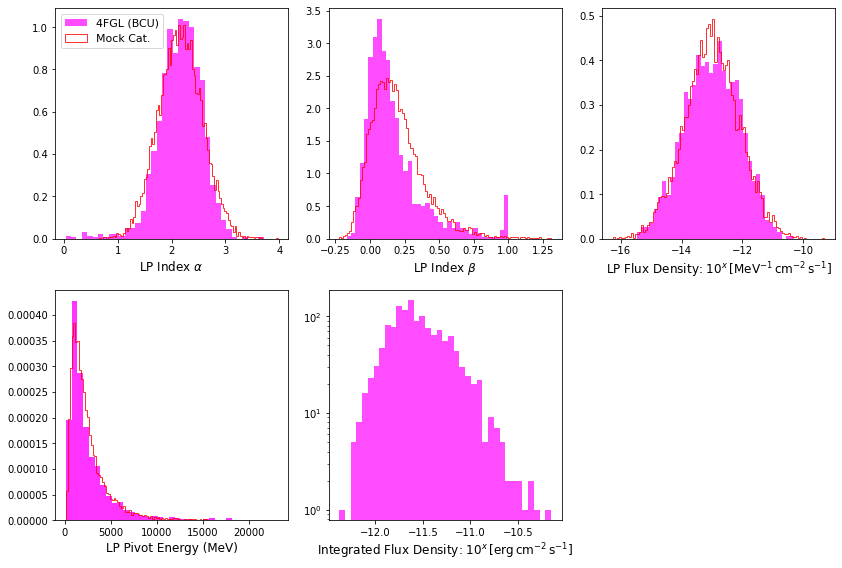

In [105]:
fig = plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.hist(v22LP_df_bcu['LP_index'], density=True, bins=AGNs_bcu_bins, color='magenta', alpha=0.7, label='4FGL (BCU)')
plt.hist(LPIndex_mock_dist_bcu, bins=int(np.sqrt(LP_df_mockCat_bins_bcu)), density=True, histtype='stepfilled', 
         edgecolor='red', fill=False, alpha=0.8, label='Mock Cat.')
plt.xlabel(r'LP Index $\alpha$', fontsize=12)
plt.legend(fontsize=11)

plt.subplot(2, 3, 2)
plt.hist(v22LP_df_bcu['LP_beta'], density=True, bins=AGNs_bcu_bins, alpha=0.7, color='magenta')
plt.hist(LPBeta_mock_dist2_bcu, bins=int(np.sqrt(LP_df_mockCat_bins_bcu)), density=True, 
         histtype='stepfilled', fill= False, edgecolor='red', alpha=0.8)

# plt.text(0.23, 4, 
#          r'$\frac{dN}{dE} = K\, \left( \frac{E}{E_0} \right )^{-\alpha -\beta \,  \mathrm{log} (E/E_0)}$', 
#         fontsize=13)

plt.xlabel(r'LP Index $\beta$', fontsize=12)

plt.subplot(2, 3, 3)
plt.hist(np.log10(v22LP_df_bcu['LP_f_density']), density=True, bins=AGNs_bcu_bins, color='magenta', alpha=0.7)
plt.hist(np.log10(LPFDensity_mock_dist_bcu), density=True, bins=int(np.sqrt(LP_df_mockCat_bins_bcu)), edgecolor='red', 
         histtype='stepfilled', fill=False, alpha=0.8)
plt.xlabel(r'LP Flux Density: $10^{x}\, [\mathrm{MeV}^{-1}\, \mathrm{cm}^{-2}\, \mathrm{s}^{-1}]$', fontsize=12)

plt.subplot(2, 3, 4)
plt.hist(v22LP_df_bcu['Piv_En'], density=True, bins=AGNs_bcu_bins, color='magenta', alpha=0.8)
plt.hist(LPPivEn_mock_dist3fbcu, density=True, bins=int(np.sqrt(LP_df_mockCat_bins_bcu)), edgecolor='red', 
         histtype='stepfilled', fill=False, alpha=0.8)
xticksPEn = ['20e3', ]
plt.xlabel(r'LP Pivot Energy (MeV)', fontsize=12)


plt.subplot(2, 3, 5)

plt.hist(np.log10(v22LP_df_bcu['En_flux_100']), density=False, bins=AGNs_bcu_bins, color='magenta', alpha=0.7)

plt.yscale('log')
plt.xlabel(r'Integrated Flux Density: $10^{x}\, [\mathrm{erg}\, \mathrm{cm}^{-2}\, \mathrm{s}^{-1}]$', 
           fontsize=12)

plt.tight_layout()
# plt.savefig('/content/drive/My Drive/Colab Notebooks/fermi-lat/bcu_4fgl_mock.png', dpi=300)

In [106]:
#### generate params for spp/pwn/snr 

LP_df_mockCat_bins_pwn_spp_snr = 3000

LPIndex_mock_dist_pwn_spp_snr = np.sqrt(LP_index_var_pwn_spp_snr) * np.random.randn(LP_df_mockCat_bins_pwn_spp_snr) + LP_index_mean_pwn_spp_snr



LPBeta_mock_dist2_pwn_spp_snr = np.random.gumbel(LP_beta_mean_pwn_spp_snr-0.067, np.sqrt(LP_beta_var_pwn_spp_snr)-0.07, 
                                         size=LP_df_mockCat_bins_pwn_spp_snr) 
# best for beta

LPFDensity_mock_dist_pwn_spp_snr = 10**(np.sqrt(LP_Fdensity_var_pwn_spp_snr) * np.random.randn(LP_df_mockCat_bins_pwn_spp_snr) + LP_Fdensity_mean_pwn_spp_snr)


from scipy.stats import expon, lognorm

logshape1_pwn_spp_snr, logloc1_pwn_spp_snr, logscale1_pwn_spp_snr = lognorm.fit(v22LP_df_pwn_spp_snr['Piv_En'], loc=0.001)
print ('check fit shape, loc and scale, log(scale): ', logshape1_pwn_spp_snr, logloc1_pwn_spp_snr, logscale1_pwn_spp_snr, 
       np.log(logscale1_pwn_spp_snr))

LPPivEn_mock_dist3_pwn_spp_snr = np.random.lognormal(np.log(logscale1_pwn_spp_snr), logshape1_pwn_spp_snr, 
                                                     LP_df_mockCat_bins_pwn_spp_snr)

LPPivEn_mock_dist3fpwn_spp_snr = LPPivEn_mock_dist3_pwn_spp_snr[(LPPivEn_mock_dist3_pwn_spp_snr<239424.859375)]

check fit shape, loc and scale, log(scale):  0.9586719977907874 0.0011419223901212232 2657.307027431104 7.885068493254477


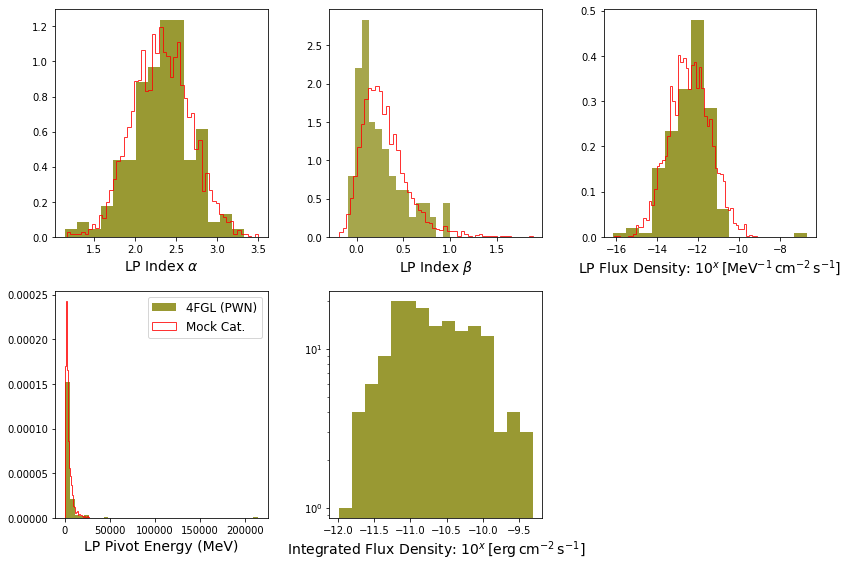

In [107]:
fig = plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.hist(v22LP_df_pwn_spp_snr['LP_index'], density=True, bins=AGNs_spp_pwn_snr_bins, color='olive', alpha=0.8, label='4FGL (PWN)')
plt.hist(LPIndex_mock_dist_pwn_spp_snr, bins=int(np.sqrt(LP_df_mockCat_bins_pwn_spp_snr)), density=True, histtype='stepfilled', 
         edgecolor='red', fill=False, alpha=0.8, label='Mock Cat.')
plt.xlabel(r'LP Index $\alpha$', fontsize=14)
# plt.legend(fontsize=11)

plt.subplot(2, 3, 2)
plt.hist(v22LP_df_pwn_spp_snr['LP_beta'], density=True, bins=AGNs_spp_pwn_snr_bins, alpha=0.7, color='olive', label='4FGL (PWN)')
plt.hist(LPBeta_mock_dist2_pwn_spp_snr, bins=int(np.sqrt(LP_df_mockCat_bins_pwn_spp_snr)), density=True, 
         histtype='stepfilled', fill= False, edgecolor='red', alpha=0.8)

# plt.text(0.23, 4, 
#          r'$\frac{dN}{dE} = K\, \left( \frac{E}{E_0} \right )^{-\alpha -\beta \,  \mathrm{log} (E/E_0)}$', 
#         fontsize=13)

plt.xlabel(r'LP Index $\beta$', fontsize=14)

plt.subplot(2, 3, 3)
plt.hist(np.log10(v22LP_df_pwn_spp_snr['LP_f_density']), density=True, bins=AGNs_spp_pwn_snr_bins, color='olive', alpha=0.8)
plt.hist(np.log10(LPFDensity_mock_dist_pwn_spp_snr), density=True, bins=int(np.sqrt(LP_df_mockCat_bins_pwn_spp_snr)), 
         edgecolor='red', histtype='stepfilled', fill=False, alpha=0.8)
plt.xlabel(r'LP Flux Density: $10^{x}\, [\mathrm{MeV}^{-1}\, \mathrm{cm}^{-2}\, \mathrm{s}^{-1}]$', fontsize=14)

plt.subplot(2, 3, 4)
plt.hist(v22LP_df_pwn_spp_snr['Piv_En'], density=True, bins=40, color='olive', alpha=0.8, label='4FGL (PWN)')
plt.hist(LPPivEn_mock_dist3fpwn_spp_snr, density=True, bins=int(np.sqrt(LP_df_mockCat_bins_pwn_spp_snr)), edgecolor='red', 
         histtype='stepfilled', fill=False, alpha=0.8, label='Mock Cat.')
xticksPEn = ['20e3', ]
plt.xlabel(r'LP Pivot Energy (MeV)', fontsize=14)
plt.legend(fontsize=12)

plt.subplot(2, 3, 5)

plt.hist(np.log10(v22LP_df_pwn_spp_snr['En_flux_100']), density=False, bins=AGNs_spp_pwn_snr_bins, color='olive', alpha=0.8)

plt.yscale('log')
plt.xlabel(r'Integrated Flux Density: $10^{x}\, [\mathrm{erg}\, \mathrm{cm}^{-2}\, \mathrm{s}^{-1}]$', 
           fontsize=14)

plt.tight_layout()
# plt.savefig('/content/drive/My Drive/Colab Notebooks/fermi-lat/PWN_SPP_4fgl_mock.png', dpi=300)
# plt.savefig('/content/drive/My Drive/Colab Notebooks/fermi-lat/PWN_SPP_4fgl_mock.eps', dpi=300)

max and min of GLAT for FSRQs;  84.47606658935547 -86.34920501708984
max and min of GLAT for BCUs;  87.57076263427734 -87.25494384765625
max and min of GLAT for PWN/SPPs;  14.637993812561035 -32.79877853393555


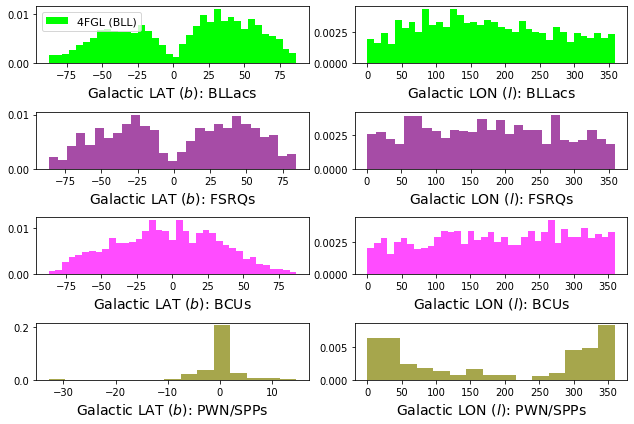

In [108]:
fig = plt.figure(figsize=(9, 6))

fig.add_subplot(4, 2, 1)
plt.hist(v22LP_df_bll['GLAT'], bins=AGNs_bll_bins, color='lime', 
         density=True, label='4FGL (BLL)')
# plt.hlines(0.5, -1., 1., linestyle='--', color='red', alpha=0.7)
# plt.text(0.00, 0.6, r'0.5', fontsize=12)
plt.xlabel(r'Galactic LAT $(b)$: BLLacs', fontsize=14)
plt.legend(fontsize=11)

fig.add_subplot(4, 2, 2)
plt.hist(v22LP_df_bll['GLON'], bins=AGNs_bll_bins, color='lime', density=True)
plt.xlabel(r'Galactic LON $(l)$: BLLacs', fontsize=14)

fig.add_subplot(423)
plt.hist(v22LP_df_fsrq['GLAT'], bins=AGNs_fsrq_bins, color='purple', alpha=0.7, 
         label='4FGL Data (FSRQ)', density=True)
plt.xlabel(r'Galactic LAT $(b)$: FSRQs', fontsize=14)
print ('max and min of GLAT for FSRQs; ', v22LP_df_fsrq['GLAT'].max(), v22LP_df_fsrq['GLAT'].min())


fig.add_subplot(424)
plt.hist(v22LP_df_fsrq['GLON'], bins=AGNs_fsrq_bins, color='purple', alpha = 0.7, density=True)
plt.xlabel(r'Galactic LON $(l)$: FSRQs', fontsize=14)


fig.add_subplot(425)
plt.hist(v22LP_df_bcu['GLAT'], bins=AGNs_bcu_bins, color='magenta', alpha=0.7, 
         label='4FGL Data (BCU)', density=True)
plt.xlabel(r'Galactic LAT $(b)$: BCUs', fontsize=14)
print ('max and min of GLAT for BCUs; ', v22LP_df_bcu['GLAT'].max(), v22LP_df_bcu['GLAT'].min())


fig.add_subplot(426)
plt.hist(v22LP_df_bcu['GLON'], bins=AGNs_bcu_bins, color='magenta', alpha = 0.7, density=True)
plt.xlabel(r'Galactic LON $(l)$: BCUs', fontsize=14)


fig.add_subplot(427)
plt.hist(v22LP_df_pwn_spp_snr['GLAT'], bins=AGNs_spp_pwn_snr_bins, color='olive', alpha=0.7, 
         label='4FGL Data (PWN/SPPs)', density=True)
plt.xlabel(r'Galactic LAT $(b)$: PWN/SPPs', fontsize=14)
print ('max and min of GLAT for PWN/SPPs; ', v22LP_df_pwn_spp_snr['GLAT'].max(), 
       v22LP_df_pwn_spp_snr['GLAT'].min())


fig.add_subplot(428)
plt.hist(v22LP_df_pwn_spp_snr['GLON'], bins=AGNs_spp_pwn_snr_bins, color='olive', alpha = 0.7, density=True)
plt.xlabel(r'Galactic LON $(l)$: PWN/SPPs', fontsize=14)

plt.tight_layout()
# plt.savefig('/content/drive/My Drive/Colab Notebooks/fermi-lat/4fgl_lat_lon_allAGNs.png', dpi=300)
# plt.savefig('/content/drive/My Drive/Colab Notebooks/fermi-lat/4fgl_lat_lon_allAGNs.eps', dpi=300)

max and min of GLAT for FSRQs;  84.47606658935547 -86.34920501708984
max and min of GLAT for BCUs;  87.57076263427734 -87.25494384765625
max and min of GLAT for PWN/SPPs;  14.637993812561035 -32.79877853393555


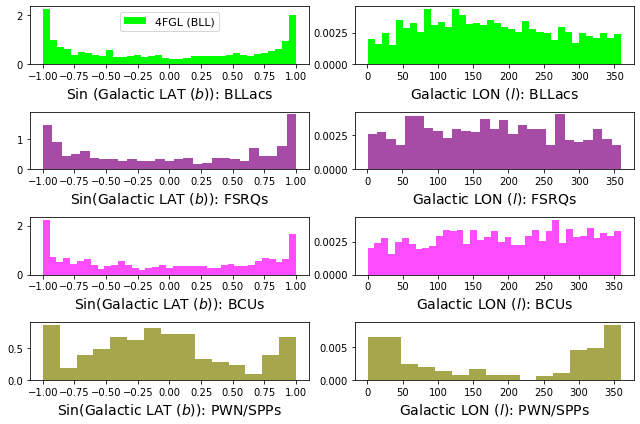

In [109]:
fig = plt.figure(figsize=(9, 6))

fig.add_subplot(4, 2, 1)
plt.hist(np.sin(v22LP_df_bll['GLAT']), bins=AGNs_bll_bins, color='lime', 
         density=True, label='4FGL (BLL)')
# plt.hlines(0.5, -1., 1., linestyle='--', color='red', alpha=0.7)
# plt.text(0.00, 0.6, r'0.5', fontsize=12)
plt.xlabel(r'Sin (Galactic LAT $(b)$): BLLacs', fontsize=14)
plt.legend(fontsize=11)

fig.add_subplot(4, 2, 2)
plt.hist(v22LP_df_bll['GLON'], bins=AGNs_bll_bins, color='lime', density=True)
plt.xlabel(r'Galactic LON $(l)$: BLLacs', fontsize=14)

fig.add_subplot(423)
plt.hist(np.sin(v22LP_df_fsrq['GLAT']), bins=AGNs_fsrq_bins, color='purple', alpha=0.7, 
         label='4FGL Data (FSRQ)', density=True)
plt.xlabel(r'Sin(Galactic LAT $(b)$): FSRQs', fontsize=14)
print ('max and min of GLAT for FSRQs; ', v22LP_df_fsrq['GLAT'].max(), v22LP_df_fsrq['GLAT'].min())


fig.add_subplot(424)
plt.hist(v22LP_df_fsrq['GLON'], bins=AGNs_fsrq_bins, color='purple', alpha = 0.7, density=True)
plt.xlabel(r'Galactic LON $(l)$: FSRQs', fontsize=14)


fig.add_subplot(425)
plt.hist(np.sin(v22LP_df_bcu['GLAT']), bins=AGNs_bcu_bins, color='magenta', alpha=0.7, 
         label='4FGL Data (BCU)', density=True)
plt.xlabel(r'Sin(Galactic LAT $(b)$): BCUs', fontsize=14)
print ('max and min of GLAT for BCUs; ', v22LP_df_bcu['GLAT'].max(), v22LP_df_bcu['GLAT'].min())


fig.add_subplot(426)
plt.hist(v22LP_df_bcu['GLON'], bins=AGNs_bcu_bins, color='magenta', alpha = 0.7, density=True)
plt.xlabel(r'Galactic LON $(l)$: BCUs', fontsize=14)


fig.add_subplot(427)
plt.hist(np.sin(v22LP_df_pwn_spp_snr['GLAT']), bins=AGNs_spp_pwn_snr_bins, color='olive', alpha=0.7, 
         label='4FGL Data (PWN/SPPs)', density=True)
plt.xlabel(r'Sin(Galactic LAT $(b)$): PWN/SPPs', fontsize=14)
print ('max and min of GLAT for PWN/SPPs; ', v22LP_df_pwn_spp_snr['GLAT'].max(), 
       v22LP_df_pwn_spp_snr['GLAT'].min())


fig.add_subplot(428)
plt.hist(v22LP_df_pwn_spp_snr['GLON'], bins=AGNs_spp_pwn_snr_bins, color='olive', alpha = 0.7, density=True)
plt.xlabel(r'Galactic LON $(l)$: PWN/SPPs', fontsize=14)

plt.tight_layout()
# plt.savefig('/content/drive/My Drive/Colab Notebooks/fermi-lat/4fgl_sinlat_lon_allAGNs.png', dpi=300)
# plt.savefig('/content/drive/My Drive/Colab Notebooks/fermi-lat/4fgl_sinlat_lon_allAGNs.eps', dpi=300)

example sin inv b in rad and tot len :  -0.026916936043790574 10000
example sin inv b in deg:  -1.542226832732763
example gal long in degrees:  293.8665069357566
example val and total length:  61.11654016444536 10000


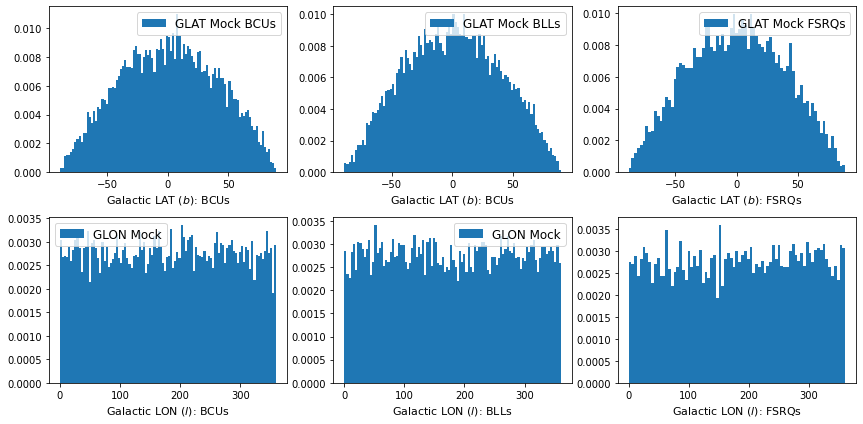

In [110]:
### mock agn (BLL, FSRQ, BCU)

sinb_bll = np.random.uniform(-1, 1, LP_df_mockCat_bins_bll) # distribution of sinb from -1, 1
sinb_fsrq = np.random.uniform(-1, 1, LP_df_mockCat_bins_fsrq)
sinb_bcu = np.random.uniform(-1, 1, LP_df_mockCat_bins_bcu) 
# print ('sinb : ', sinb)
print ('example sin inv b in rad and tot len : ', np.arcsin(sinb_bll[0]), len(sinb_bll)) # radian 
print ('example sin inv b in deg: ', np.rad2deg(np.arcsin(sinb_bll[0]))) # degree


# b will be drawn from sinb distribution 
mock_GLAT_bll = np.rad2deg(np.arcsin(sinb_bll))
mock_GLAT_fsrq = np.rad2deg(np.arcsin(sinb_fsrq))
mock_GLAT_bcu = np.rad2deg(np.arcsin(sinb_bcu))

fig = plt.figure(figsize=(12, 6))

fig.add_subplot(231)
plt.hist(mock_GLAT_bcu, density=True, label='GLAT Mock BCUs', bins=int(np.sqrt(LP_df_mockCat_bins_bcu)))

plt.xlabel(r'Galactic LAT $(b)$: BCUs', fontsize=11)
plt.legend(fontsize=12)

fig.add_subplot(232)
plt.hist(mock_GLAT_bll, density=True, label='GLAT Mock BLLs', bins=int(np.sqrt(LP_df_mockCat_bins_bll)))
plt.xlabel(r'Galactic LAT $(b)$: BCUs', fontsize=11)
plt.legend(fontsize=12)

fig.add_subplot(233)
plt.hist(mock_GLAT_fsrq, density=True, label='GLAT Mock FSRQs', bins=int(np.sqrt(LP_df_mockCat_bins_fsrq)))
plt.xlabel(r'Galactic LAT $(b)$: FSRQs', fontsize=11)
plt.legend(fontsize=12)

gal_long_uniform_bll = np.random.uniform(0.0, 2*np.pi, LP_df_mockCat_bins_bll) # already in radian
gal_long_uniform_fsrq = np.random.uniform(0.0, 2*np.pi, LP_df_mockCat_bins_fsrq)
gal_long_uniform_bcu = np.random.uniform(0.0, 2*np.pi, LP_df_mockCat_bins_bcu)

# print ('gal long: ', gal_long)
print ('example gal long in degrees: ', np.rad2deg(gal_long_uniform_bll[5]))

mock_GLON_bll = np.rad2deg(gal_long_uniform_bll)
mock_GLON_fsrq = np.rad2deg(gal_long_uniform_fsrq)
mock_GLON_bcu = np.rad2deg(gal_long_uniform_bcu)

print ('example val and total length: ', mock_GLON_bll[10], len(mock_GLON_bll))
# mock_GLON_unique = np.unique(mock_GLON)
# print ('len of unique list: ', len(mock_GLON_unique) )

fig.add_subplot(234)
plt.hist(mock_GLON_bcu, density=True, label='GLON Mock', bins=int(np.sqrt(LP_df_mockCat_bins_bcu)) )

plt.xlabel(r'Galactic LON $(l)$: BCUs', fontsize=11)
plt.legend(fontsize=12)


fig.add_subplot(235)
plt.hist(mock_GLON_bll, density=True, label='GLON Mock', bins=int(np.sqrt(LP_df_mockCat_bins_bll)) )


plt.xlabel(r'Galactic LON $(l)$: BLLs', fontsize=11)
plt.legend(fontsize=12)

fig.add_subplot(236)
plt.hist(mock_GLON_fsrq, density=True, label='GLON Mock', bins=int(np.sqrt(LP_df_mockCat_bins_fsrq)) )
plt.xlabel(r'Galactic LON $(l)$: FSRQs', fontsize=11)

plt.tight_layout()
# plt.savefig('/content/drive/My Drive/Colab Notebooks/fermi-lat/mock-lat-lon_bl_fs_bcu.png', dpi=300)

Log-Parabola Parametrization: 

$f_{LP}(E) = \frac{dN}{dE} = K\, \left(E/E_0\right)^{-\alpha -\beta\, \text{log} \left(E/E_0\right)}$

$\int _{100}^{1e5} E\times f_{LP}(E)$ gives us the "Energy Flux 100" parameter. 

In [111]:
### LP Parametrization and Integrated Flux 

def Integrate(N, a, b, alpha, beta, PivEn, 
              FluxDensity): # number of steps, lower and upper limit 
    value = 0
    value2 = 0
    
    for i in range(1, N+1):
        En1 = a + ( (i-1/2)* ( (b-a)/ N ) )
        x = En1*FluxDensity * ((En1/PivEn)**(- alpha - ( beta *(math.log(En1/PivEn)) ) ))
#         value += LP(En1 , alpha1, beta1, PivEn, FluxDensity)
        value += x
    value2 = ( (b-a)/N ) * value
    return value2    

In [ ]:
# ### select bins till the flux log N starts to drop. 

# E100bins_bll_high=E100bins_bll[3:]
# print ('check selected bins:', E100bins_bll_high)

# ### select E100 values coresponding to the same bins 

# E100hist_bll_high = E100hist_bll[3:]
# print ('check lens: ', len(E100hist_bll_high), len(E100bins_bll_high))

# E100bins_bll_highL, E100bins_bll_highH = (10**E100bins_bll_high[0], 10**E100bins_bll_high[-1])
# print ('check the bin boundaries: ', E100bins_bll_highL, E100bins_bll_highH) 

check some values of the noise_N:  1.2558660291493315 1.0479219224622711 1.0311378108840574


(array([2.82555697, 0.94185232, 1.88370465, 0.94185232, 2.82555697,
        2.35463081, 1.41277848, 0.        , 1.41277848, 2.35463081]),
 array([0.70264139, 0.76162681, 0.82061223, 0.87959765, 0.93858307,
        0.99756849, 1.05655391, 1.11553933, 1.17452475, 1.23351017,
        1.2924956 ]),
 <a list of 10 Patch objects>)

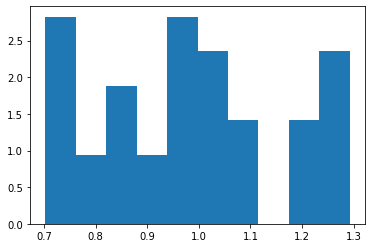

In [112]:
#### introduce the poisson noise (used later for filling source)

noise_N_bll_comb = np.random.uniform(0.7, 1.3, AGNs_bll_bins+1)    
noise_N_bll = np.random.uniform(0.7, 1.3, AGNs_bll_bins)

print ('check some values of the noise_N: ', noise_N_bll[5], noise_N_bll[10], noise_N_bll[15])  
plt.hist(noise_N_bll, density=True, bins=10)

In [113]:
#### Generation of BLL Catalogue

rand_LPIndex_mock_dist_bll    = random.sample(LPIndex_mock_dist_bll.tolist(), 8000)
rand_LPBeta_mock_dist_bll     = random.sample(LPBeta_mock_dist2_bll.tolist(), 8000)
rand_LPFDensity_mock_dist_bll = random.sample(LPFDensity_mock_dist_bll.tolist(), 8000)
rand_LPPivEn_mock_dist_bll    = random.sample(LPPivEn_mock_dist3_bll.tolist(), 8000)

rand_GLAT_bll                 = random.sample(mock_GLAT_bll.tolist(), 8000)
rand_GLON_bll                 = random.sample(mock_GLON_bll.tolist(), 8000)

In [114]:
def simple_lum_bll(n):
    result_list_bll = []
#     comp_list = [0] * len(E100hist_list)
    final_result_list_bll = []
    c_lp_a_bll   = [] # AGN alpha
    c_lp_b_bll   = [] # AGN beta
    c_lp_F_bll   = [] # flux density
    c_lp_PEn_bll = [] # pivot  energy
    c_GLAT_bll   = [] # lat
    c_GLON_bll   = [] # long
    #### loop over the number of sources (selected in random)
    for x in range(4000):
        LP_index_bll = rand_LPIndex_mock_dist_bll[x]
        LP_beta_bll  = rand_LPBeta_mock_dist_bll[x]
        LP_FD_bll    = rand_LPFDensity_mock_dist_bll[x]
        LP_PEn_bll   = rand_LPPivEn_mock_dist_bll[x]
        LP_glat_bll  = rand_GLAT_bll[x]
        LP_glon_bll  = rand_GLON_bll[x]

        
        
        result_bll   = Integrate(n, 100, 100e3, alpha=LP_index_bll, beta=LP_beta_bll, 
                                 PivEn=LP_PEn_bll, FluxDensity=LP_FD_bll)
        # n is the number of steps in integration, higher ---> better accuracy
        # unit here is MeV cm^-2 s^-1 :
        result_bll   = result_bll * 1.6e-6 
        # unit here is Erg cm^-2 s^-1:
        # lowest bin -12.378695, highest bin -9.002079  
        if result_bll>=7.18408151614367978e-13 and result_bll <= 4.4967794722950834e-10: # 10**(lbin), 10**(hbin)
            result_list_bll.append(result_bll)

            c_lp_a_bll.append(LP_index_bll)
            c_lp_b_bll.append(LP_beta_bll)
            c_lp_F_bll.append(LP_FD_bll)
            c_lp_PEn_bll.append(LP_PEn_bll)
            c_GLAT_bll.append(LP_glat_bll)
            c_GLON_bll.append(LP_glon_bll)
            
            mockE100hist_bll, bins_bll = np.histogram(np.log10(result_list_bll), bins=E100bins_bll, density=False)
            mockE100hist_list_bll = mockE100hist_bll.tolist()
#         for Ebins in E100bins_notlast:
            for x1, x2, x3 in zip(mockE100hist_list_bll, E100hist_list_bll, noise_N_bll): 
                if (x1*x3) > x2:
                    print ('!!! mock higher than the real !!!', x1, x2)
                    result_list_bll.pop()
#                     print ('result_list len: ', len(result_list))
                    final_result_list_bll = result_list_bll[:]
                    c_lp_a_bll.pop()
                    c_lp_b_bll.pop()
                    c_lp_F_bll.pop()
                    c_lp_PEn_bll.pop()
                    c_GLAT_bll.pop()
                    c_GLON_bll.pop()
        
                else:
                    continue
                    print (':) :) what is happening here :) :)')
                
#                 result_list.pop()    
    return final_result_list_bll, c_lp_a_bll, c_lp_b_bll, c_lp_F_bll, c_lp_PEn_bll, c_GLAT_bll, c_GLON_bll

In [81]:
final_result_list_bll, c_lp_a_bll, c_lp_b_bll, c_lp_F_bll, c_lp_PEn_bll, c_GLAT_bll, c_GLON_bll = simple_lum_bll(1070)

print('check the number of selected sources: \n', len(c_lp_a_bll))

!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 3 2.0
!!! mock higher than the real !!! 3 2.0
!!! mock higher than the real !!! 2 2.0
!!! mock higher than the real !!! 2 1.0
!!! mock higher than the real !!! 2 1.0
!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 2 1.0
!!! mock higher than the real !!! 2 2.0
!!! mock higher than the real !!! 2 1.0
!!! mock higher than the real !!! 2 1.0
!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 3 2.0
!!! mock higher than the real !!! 2 1.0
!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 2 1.0
!!! mock higher than the real !!! 2 2.0
!!! mock higher than the real !!! 2 1.0
!!! mock higher than the real !!! 2 1.0
!!! mock higher than the real !!! 2 2.0
!!! mock higher than the real !!! 3 2.0
!!! mock higher than the real !!! 2 2.0
!!! mock higher than the real !!! 6 5.0
!!! mock higher than the real !!! 6 5.0


In [ ]:
# E100hist_list_bll_combined

In [115]:
def simple_lum_bll_comb(n):
    result_list_bll = []
#     comp_list = [0] * len(E100hist_list)
    final_result_list_bll = []
    c_lp_a_bll   = [] # AGN alpha
    c_lp_b_bll   = [] # AGN beta
    c_lp_F_bll   = [] # flux density
    c_lp_PEn_bll = [] # pivot  energy
    c_GLAT_bll   = [] # lat
    c_GLON_bll   = [] # long
    #### loop over the number of sources (selected in random)
    for x in range(4700):
        LP_index_bll = rand_LPIndex_mock_dist_bll[x]
        LP_beta_bll  = rand_LPBeta_mock_dist_bll[x]
        LP_FD_bll    = rand_LPFDensity_mock_dist_bll[x]
        LP_PEn_bll   = rand_LPPivEn_mock_dist_bll[x]
        LP_glat_bll  = rand_GLAT_bll[x]
        LP_glon_bll  = rand_GLON_bll[x]

        
        
        result_bll   = Integrate(n, 100, 100e3, alpha=LP_index_bll, beta=LP_beta_bll, 
                                 PivEn=LP_PEn_bll, FluxDensity=LP_FD_bll)
        # n is the number of steps in integration, higher ---> better accuracy
        # unit here is MeV cm^-2 s^-1 :
        result_bll   = result_bll * 1.6e-6 
        # unit here is Erg cm^-2 s^-1:
        # lowest bin -12.378695, highest bin -9.002079  
        # E100hist_list_bll_combined = check_area1sigh_bll_list_pow + E100hist_list_bll_high
        # E100bins_bll_list_combined = selected_bins1_list_bll_extended + E100bins_bll_list_high
        if result_bll>=10**E100bins_bll_list_combined[0] and result_bll < 10**(E100bins_bll_list_combined[-1]): # 10**(lbin), 10**(hbin)
            result_list_bll.append(result_bll)

            c_lp_a_bll.append(LP_index_bll)
            c_lp_b_bll.append(LP_beta_bll)
            c_lp_F_bll.append(LP_FD_bll)
            c_lp_PEn_bll.append(LP_PEn_bll)
            c_GLAT_bll.append(LP_glat_bll)
            c_GLON_bll.append(LP_glon_bll)
            
            mockE100hist_bll, bins_bll = np.histogram(np.log10(result_list_bll), bins=E100bins_bll_list_combined, density=False)
            mockE100hist_list_bll = mockE100hist_bll.tolist()
#         for Ebins in E100bins_notlast:
            for x1, x2, x3 in zip(mockE100hist_list_bll, E100hist_list_bll_combined, noise_N_bll_comb): 
                if (x1*x3) > x2:
                    print ('!!! mock higher than the real !!!', x1, x2)
                    result_list_bll.pop()
#                     print ('result_list len: ', len(result_list))
                    final_result_list_bll = result_list_bll[:]
                    c_lp_a_bll.pop()
                    c_lp_b_bll.pop()
                    c_lp_F_bll.pop()
                    c_lp_PEn_bll.pop()
                    c_GLAT_bll.pop()
                    c_GLON_bll.pop()
        
                else:
                    continue
                    print (':) :) what is happening here :) :)')
                
#                 result_list.pop()    
    return final_result_list_bll, c_lp_a_bll, c_lp_b_bll, c_lp_F_bll, c_lp_PEn_bll, c_GLAT_bll, c_GLON_bll

In [116]:
final_result_list_bll_comb, c_lp_a_bll_comb, c_lp_b_bll_comb, c_lp_F_bll_comb, c_lp_PEn_bll_comb, c_GLAT_bll_comb, c_GLON_bll_comb = simple_lum_bll_comb(1070)

print('check the number of selected sources: \n', len(c_lp_a_bll_comb))

!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 2 2.0
!!! mock higher than the real !!! 2 2.0
!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 2 1.0
!!! mock higher than the real !!! 2 1.0
!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 2 1.0
!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 2 1.0
!!! mock higher than the real !!! 2 1.0
!!! mock higher than the real !!! 3 2.0
!!! mock higher than the real !!! 2 1.0
!!! mock higher than the real !!! 2 1.0
!!! mock higher than the real !!! 2 2.0
!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 2 2.0
!!! mock higher than the real !!! 2 1.0
!!! mock higher than the real !!! 2 1.0
!!! mock higher than the real !!! 2 1.0
!!! mock higher than the real !!! 5 4.0
!!! mock higher than the real !!! 3 2.0


In [ ]:
# def simple_lum_bll_high(n):
#     result_list_bll = []
# #     comp_list = [0] * len(E100hist_list)
#     final_result_list_bll = []
#     c_lp_a_bll   = [] # AGN alpha
#     c_lp_b_bll   = [] # AGN beta
#     c_lp_F_bll   = [] # flux density
#     c_lp_PEn_bll = [] # pivot  energy
#     c_GLAT_bll   = [] # lat
#     c_GLON_bll   = [] # long
#     #### loop over the number of sources (selected in random)
#     for x in range(3300):
#         LP_index_bll = rand_LPIndex_mock_dist_bll[x]
#         LP_beta_bll  = rand_LPBeta_mock_dist_bll[x]
#         LP_FD_bll    = rand_LPFDensity_mock_dist_bll[x]
#         LP_PEn_bll   = rand_LPPivEn_mock_dist_bll[x]
#         LP_glat_bll  = rand_GLAT_bll[x]
#         LP_glon_bll  = rand_GLON_bll[x]

        
        
#         result_bll   = Integrate(n, 100, 100e3, alpha=LP_index_bll, beta=LP_beta_bll, 
#                                  PivEn=LP_PEn_bll, FluxDensity=LP_FD_bll)
#         # n is the number of steps in integration, higher ---> better accuracy
#         # unit here is MeV cm^-2 s^-1 :
#         result_bll   = result_bll * 1.6e-6 
#         # unit here is Erg cm^-2 s^-1:
#         # lowest bin -12.378695, highest bin -9.002079  
#         if result_bll>=E100bins_bll_highL and result_bll <= E100bins_bll_highH: # 10**(lbin), 10**(hbin)
#             result_list_bll.append(result_bll)

#             c_lp_a_bll.append(LP_index_bll)
#             c_lp_b_bll.append(LP_beta_bll)
#             c_lp_F_bll.append(LP_FD_bll)
#             c_lp_PEn_bll.append(LP_PEn_bll)
#             c_GLAT_bll.append(LP_glat_bll)
#             c_GLON_bll.append(LP_glon_bll)
            
#             mockE100hist_bll, bins_bll = np.histogram(np.log10(result_list_bll), bins=E100bins_bll, density=False)
#             mockE100hist_list_bll = mockE100hist_bll.tolist()
# #         for Ebins in E100bins_notlast:
#             for x1, x2, x3 in zip(mockE100hist_list_bll, E100hist_list_bll, noise_N_bll): 
#                 if (x1*x3) > x2:
#                     print ('!!! mock higher than the real !!!', x1, x2)
#                     result_list_bll.pop()
# #                     print ('result_list len: ', len(result_list))
#                     final_result_list_bll = result_list_bll[:]
#                     c_lp_a_bll.pop()
#                     c_lp_b_bll.pop()
#                     c_lp_F_bll.pop()
#                     c_lp_PEn_bll.pop()
#                     c_GLAT_bll.pop()
#                     c_GLON_bll.pop()
        
#                 else:
#                     continue
#                     print (':) :) what is happening here :) :)')
                
# #                 result_list.pop()    
#     return final_result_list_bll, c_lp_a_bll, c_lp_b_bll, c_lp_F_bll, c_lp_PEn_bll, c_GLAT_bll, c_GLON_bll

In [ ]:
# final_result_list_bll_H, c_lp_a_bll_H, c_lp_b_bll_H, c_lp_F_bll_H, c_lp_PEn_bll_H, c_GLAT_bll_H, c_GLON_bll_H = simple_lum_bll_high(1070)
# 
# print('check the number of selected sources: \n', len(c_lp_a_bll_H))

1278 1420


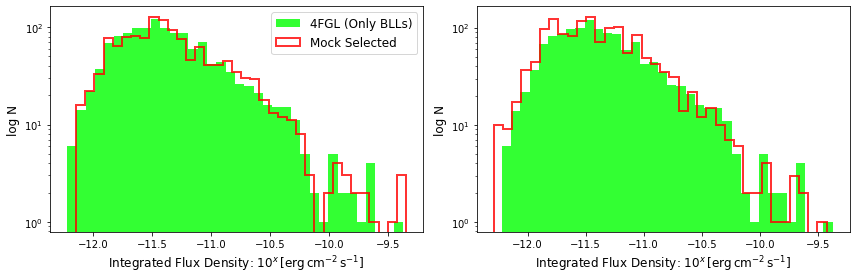

In [117]:
fig = plt.figure(figsize=(12, 4))

fig.add_subplot(121)

plt.hist(np.log10(v22LP_df_bll['En_flux_100']), bins=AGNs_bll_bins, density=False, 
         label='4FGL (Only BLLs)', color='lime', alpha=0.8)

plt.hist(np.log10(final_result_list_bll), bins=AGNs_bll_bins, density=False, 
         histtype='stepfilled', fill=False, alpha=0.8, edgecolor='red', label='Mock Selected', 
        linewidth=2)




# plt.text(-10.6, 46, 'Number of sources in Mock: %d'%( len(final_result_list) ) )
# plt.text()
plt.yscale('log')
plt.ylabel('log N', fontsize=12)

plt.xlabel(r'Integrated Flux Density: $10^{x}\, [\mathrm{erg}\, \mathrm{cm}^{-2}\, \mathrm{s}^{-1}]$', 
           fontsize=12)

plt.legend(fontsize=12)
# plt.savefig('Integrated_E100_mock_4FGLV23_AGNs.png', dpi=170)


fig.add_subplot(122)

plt.hist(np.log10(v22LP_df_bll['En_flux_100']), bins=AGNs_bll_bins, density=False, 
         label='4FGL (Only BLLs)', color='lime', alpha=0.8)

plt.hist(np.log10(final_result_list_bll_comb), bins=AGNs_bll_bins, density=False, 
         histtype='stepfilled', fill=False, alpha=0.8, edgecolor='red', label='Mock Selected', 
        linewidth=2)




# plt.text(-10.6, 46, 'Number of sources in Mock: %d'%( len(final_result_list) ) )
# plt.text()
plt.yscale('log')
plt.ylabel('log N', fontsize=12)

plt.xlabel(r'Integrated Flux Density: $10^{x}\, [\mathrm{erg}\, \mathrm{cm}^{-2}\, \mathrm{s}^{-1}]$', 
           fontsize=12)

# plt.legend(fontsize=12)
# plt.savefig('Integrated_E100_mock_4FGLV23_AGNs.png', dpi=170)
plt.tight_layout()


print(len(final_result_list_bll),len(final_result_list_bll_comb))

len of Flux Density:  1278


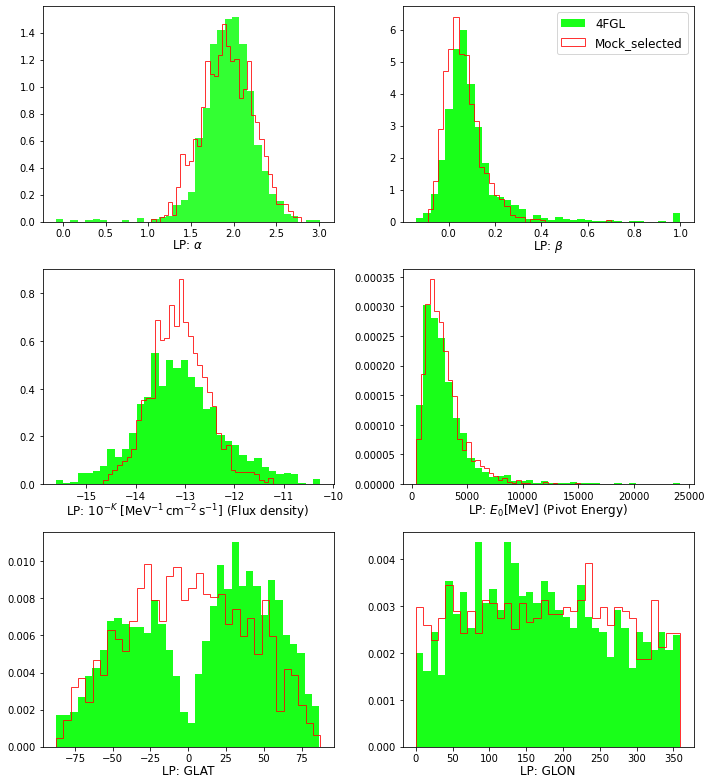

In [118]:
# print for sanity check @ length of all lists of parameters should be same

# compare the 4FGL original distribution and the selected parameters distribution 


fig = plt.figure(figsize=(10, 11))

fig.add_subplot(321)


plt.hist(v22LP_df_bll['LP_index'], bins=AGNs_bll_bins, density=True, label='4FGL BLL', color= 'lime', alpha=0.8)
plt.hist(c_lp_a_bll, bins=AGNs_bll_bins, density=True, label='mock selected', 
        histtype='stepfilled', fill=False, alpha=0.8, edgecolor='red')

plt.xlabel(r'LP: $\alpha$', fontsize=12, labelpad=0.1)
# plt.legend(fontsize=12)


fig.add_subplot(322)


plt.hist(v22LP_df_bll['LP_beta'], bins=AGNs_bll_bins, density=True, label='4FGL', color= 'lime', alpha=0.9)
plt.hist(c_lp_b_bll, bins=AGNs_bll_bins, density=True, label='Mock_selected', 
         histtype='stepfilled', fill=False, alpha=0.8, edgecolor='red')

plt.xlabel(r'LP: $\beta$', fontsize=12, labelpad=0.1)
plt.legend(fontsize=12)

print ('len of Flux Density: ', len(c_lp_F_bll))
fig.add_subplot(323) # log of flux density is plotted 

plt.hist(np.log10(v22LP_df_bll['LP_f_density']), bins=AGNs_bll_bins, density=True, label='4FGL', 
         color= 'lime', alpha=0.9)
plt.hist(np.log10(c_lp_F_bll), bins=AGNs_bll_bins, density=True, histtype='stepfilled', fill=False, alpha=0.8, 
         edgecolor='red')

plt.xlabel(r'LP: $10^{-K}\, \, [\mathrm{MeV}^{-1}\, \mathrm{cm}^{-2}\, \mathrm{s}^{-1}]$ (Flux density)', 
           fontsize=12, labelpad=0.1)

fig.add_subplot(324)

plt.hist(v22LP_df_bll['Piv_En'], bins=AGNs_bll_bins, density=True, label='4FGL', color= 'lime', alpha=0.9)
plt.hist(c_lp_PEn_bll, bins=AGNs_bll_bins, density=True, histtype='stepfilled', fill=False, alpha=0.8, 
         edgecolor='red')

plt.xlabel(r'LP: $E_0 [\mathrm{MeV}]$ (Pivot Energy)', fontsize=12, labelpad=0.1)

fig.add_subplot(325)

plt.hist(v22LP_df_bll['GLAT'], bins=AGNs_bll_bins, density=True, label='4FGL', color= 'lime', alpha=0.9)
plt.hist(c_GLAT_bll, bins=AGNs_bll_bins, density=True, histtype='stepfilled', fill=False, alpha=0.8, 
         edgecolor='red')

plt.xlabel(r'LP: GLAT', fontsize=12, labelpad=0.1)

fig.add_subplot(326)

plt.hist(v22LP_df_bll['GLON'], bins=AGNs_bll_bins, density=True, label='4FGL', color= 'lime', alpha=0.9)
plt.hist(c_GLON_bll, bins=AGNs_bll_bins, density=True, histtype='stepfilled', fill=False, alpha=0.8, 
         edgecolor='red')

plt.xlabel(r'LP: GLON', fontsize=12, labelpad=0.1)

plt.tight_layout()

In [119]:
#### check the min max value of different params for the mock catalog

print ('mock cat alpha max; ', max(c_lp_a_bll))
print ('mock cat alpha min; ', min(c_lp_a_bll))

print ('mock cat beta max; ', max(c_lp_b_bll))
print ('mock cat beta min; ', min(c_lp_b_bll))

print ('mock cat beta max; ', max(c_lp_F_bll))
print ('mock cat beta min; ', min(c_lp_F_bll))

print ('mock cat beta max; ', max(c_lp_PEn_bll))
print ('mock cat beta min; ', min(c_lp_PEn_bll))

mock cat alpha max;  2.787907130751109
mock cat alpha min;  1.0357513418508972
mock cat beta max;  0.7029451834311917
mock cat beta min;  -0.08897968356151527
mock cat beta max;  6.0346668648289944e-12
mock cat beta min;  2.186036258244566e-15
mock cat beta max;  15144.99732163819
mock cat beta min;  396.8253100991685


In [ ]:
# ### select bins till the flux log N starts to drop. 

# E100bins_fsrq_high=E100bins_fsrq[3:]
# print ('check selected bins:', E100bins_fsrq_high)

# ### select E100 values coresponding to the same bins 

# E100hist_fsrq_high = E100hist_fsrq[3:]
# print ('check lens: ', len(E100hist_fsrq_high), len(E100bins_fsrq_high))

# E100bins_fsrq_highL, E100bins_fsrq_highH = (10**E100bins_fsrq_high[0], 10**E100bins_fsrq_high[-1])
# print ('check the bin boundaries: ', E100bins_fsrq_highL, E100bins_fsrq_highH) 

check some values of the noise_N:  1.0021451880065382 0.7897886327118806 0.894409986087205


(array([1.40195405, 2.8039081 , 2.10293107, 2.10293107, 1.40195405,
        0.70097702, 0.        , 2.8039081 , 2.10293107, 3.50488512]),
 array([0.70395332, 0.75678963, 0.80962593, 0.86246224, 0.91529855,
        0.96813485, 1.02097116, 1.07380747, 1.12664377, 1.17948008,
        1.23231639]),
 <a list of 10 Patch objects>)

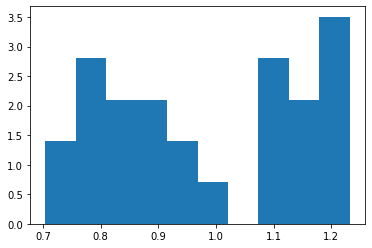

In [120]:
#### introduce the poisson noise (used later for filling source)

noise_N_fsrq = np.random.uniform(0.7, 1.3, AGNs_fsrq_bins)    
# noise_N_fsrq_high = np.random.uniform(0.7, 1.3, len(E100bins_fsrq_high))
noise_N_fsrq_comb = np.random.uniform(0.7, 1.3, AGNs_fsrq_bins+1)

print ('check some values of the noise_N: ', noise_N_fsrq[5], noise_N_fsrq[10], noise_N_fsrq[15])  
plt.hist(noise_N_fsrq, density=True, bins=10)

In [121]:
#### Generation of FSRQ Catalogue

rand_LPIndex_mock_dist_fsrq    = random.sample(LPIndex_mock_dist_fsrq.tolist(), 4000)
rand_LPBeta_mock_dist_fsrq     = random.sample(LPBeta_mock_dist2_fsrq.tolist(), 4000)
rand_LPFDensity_mock_dist_fsrq = random.sample(LPFDensity_mock_dist_fsrq.tolist(), 4000)
rand_LPPivEn_mock_dist_fsrq    = random.sample(LPPivEn_mock_dist3_fsrq.tolist(), 4000)

rand_GLAT_fsrq                 = random.sample(mock_GLAT_fsrq.tolist(), 4000)
rand_GLON_fsrq                 = random.sample(mock_GLON_fsrq.tolist(), 4000)

In [122]:
def simple_lum_fsrq(n):
    result_list_fsrq = []
#     comp_list = [0] * len(E100hist_list)
    final_result_list_fsrq = []
    c_lp_a_fsrq   = [] # AGN alpha
    c_lp_b_fsrq   = [] # AGN beta
    c_lp_F_fsrq   = [] # flux density
    c_lp_PEn_fsrq = [] # pivot  energy
    c_GLAT_fsrq   = [] # lat
    c_GLON_fsrq   = [] # long
    #### loop over the number of sources (selected in random)
    for x in range(1700):
        LP_index_fsrq = rand_LPIndex_mock_dist_fsrq[x]
        LP_beta_fsrq  = rand_LPBeta_mock_dist_fsrq[x]
        LP_FD_fsrq    = rand_LPFDensity_mock_dist_fsrq[x]
        LP_PEn_fsrq   = rand_LPPivEn_mock_dist_fsrq[x]
        LP_glat_fsrq  = rand_GLAT_fsrq[x]
        LP_glon_fsrq  = rand_GLON_fsrq[x]
# 
        # 
        # 
        result_fsrq   = Integrate(n, 100, 100e3, alpha=LP_index_fsrq, beta=LP_beta_fsrq, 
                                 PivEn=LP_PEn_fsrq, FluxDensity=LP_FD_fsrq)
        # n is the number of steps in integration, higher ---> better accuracy
        # unit here is MeV cm^-2 s^-1 :
        result_fsrq   = result_fsrq * 1.6e-6 
        # unit here is Erg cm^-2 s^-1:  
        if result_fsrq>=8.033498774796227e-13 and result_fsrq <= 1.1248463081262345e-09: # 10**(lbin), 10**(hbin)
            result_list_fsrq.append(result_fsrq)
# 
            c_lp_a_fsrq.append(LP_index_fsrq)
            c_lp_b_fsrq.append(LP_beta_fsrq)
            c_lp_F_fsrq.append(LP_FD_fsrq)
            c_lp_PEn_fsrq.append(LP_PEn_fsrq)
            c_GLAT_fsrq.append(LP_glat_fsrq)
            c_GLON_fsrq.append(LP_glon_fsrq)
            # 
            mockE100hist_fsrq, bins_fsrq = np.histogram(np.log10(result_list_fsrq), bins=E100bins_fsrq, density=False)
            mockE100hist_list_fsrq = mockE100hist_fsrq.tolist()
#         for Ebins in E100bins_notlast:
            for x1, x2, x3 in zip(mockE100hist_list_fsrq, E100hist_list_fsrq, noise_N_fsrq): 
                if (x1*x3) > x2:
                    print ('!!! mock higher than the real !!!', x1, x2)
                    result_list_fsrq.pop()
#                     print ('result_list len: ', len(result_list))
                    final_result_list_fsrq = result_list_fsrq[:]
                    c_lp_a_fsrq.pop()
                    c_lp_b_fsrq.pop()
                    c_lp_F_fsrq.pop()
                    c_lp_PEn_fsrq.pop()
                    c_GLAT_fsrq.pop()
                    c_GLON_fsrq.pop()
        # 
                else:
                    continue
                    print (':) :) what is happening here :) :)')
                # 
#                 result_list.pop()    
    return final_result_list_fsrq, c_lp_a_fsrq, c_lp_b_fsrq, c_lp_F_fsrq, c_lp_PEn_fsrq, c_GLAT_fsrq, c_GLON_fsrq

In [123]:
final_result_list_fsrq, c_lp_a_fsrq, c_lp_b_fsrq, c_lp_F_fsrq, c_lp_PEn_fsrq, c_GLAT_fsrq, c_GLON_fsrq = simple_lum_fsrq(1070)

print('check the number of selected sources: \n', len(c_lp_a_fsrq))

!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 3 3.0
!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 4 3.0
!!! mock higher than the real !!! 3 3.0
!!! mock higher than the real !!! 3 3.0
!!! mock higher than the real !!! 4 3.0
!!! mock higher than the real !!! 3 3.0
!!! mock higher than the real !!! 4 3.0
!!! mock higher than the real !!! 4 3.0
!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 3 3.0
!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 4 3.0
!!! mock higher than the real !!! 3 3.0
!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 2 2.0
!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 4 3.0
!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 3 3.0
!!! mock higher than the real !!! 2 2.0
!!! mock higher than the real !!! 2 2.0
!!! mock higher than the real !!! 1 0.0


In [124]:
def simple_lum_fsrq_comb(n):
    result_list_fsrq = []
#     comp_list = [0] * len(E100hist_list)
    final_result_list_fsrq = []
    c_lp_a_fsrq   = [] # AGN alpha
    c_lp_b_fsrq   = [] # AGN beta
    c_lp_F_fsrq   = [] # flux density
    c_lp_PEn_fsrq = [] # pivot  energy
    c_GLAT_fsrq   = [] # lat
    c_GLON_fsrq   = [] # long
    #### loop over the number of sources (selected in random)
    for x in range(2000):
        LP_index_fsrq = rand_LPIndex_mock_dist_fsrq[x]
        LP_beta_fsrq  = rand_LPBeta_mock_dist_fsrq[x]
        LP_FD_fsrq    = rand_LPFDensity_mock_dist_fsrq[x]
        LP_PEn_fsrq   = rand_LPPivEn_mock_dist_fsrq[x]
        LP_glat_fsrq  = rand_GLAT_fsrq[x]
        LP_glon_fsrq  = rand_GLON_fsrq[x]
# 
        # 
        # 
        result_fsrq   = Integrate(n, 100, 100e3, alpha=LP_index_fsrq, beta=LP_beta_fsrq, 
                                 PivEn=LP_PEn_fsrq, FluxDensity=LP_FD_fsrq)
        # n is the number of steps in integration, higher ---> better accuracy
        # unit here is MeV cm^-2 s^-1 :
        result_fsrq   = result_fsrq * 1.6e-6 
        # unit here is Erg cm^-2 s^-1:  
        if result_fsrq>=10**(E100bins_fsrq_list_combined[0]) and result_fsrq <= 10**(E100bins_fsrq_list_combined[-1]): # 10**(lbin), 10**(hbin)
            result_list_fsrq.append(result_fsrq)
# 
            c_lp_a_fsrq.append(LP_index_fsrq)
            c_lp_b_fsrq.append(LP_beta_fsrq)
            c_lp_F_fsrq.append(LP_FD_fsrq)
            c_lp_PEn_fsrq.append(LP_PEn_fsrq)
            c_GLAT_fsrq.append(LP_glat_fsrq)
            c_GLON_fsrq.append(LP_glon_fsrq)
            # 
            mockE100hist_fsrq, bins_fsrq = np.histogram(np.log10(result_list_fsrq), bins=E100bins_fsrq_list_combined, density=False)
            mockE100hist_list_fsrq = mockE100hist_fsrq.tolist()
#         for Ebins in E100bins_notlast:
            for x1, x2, x3 in zip(mockE100hist_list_fsrq, E100hist_list_fsrq_combined, noise_N_fsrq_comb): 
                if (x1*x3) > x2:
                    print ('!!! mock higher than the real !!!', x1, x2)
                    result_list_fsrq.pop()
#                     print ('result_list len: ', len(result_list))
                    final_result_list_fsrq = result_list_fsrq[:]
                    c_lp_a_fsrq.pop()
                    c_lp_b_fsrq.pop()
                    c_lp_F_fsrq.pop()
                    c_lp_PEn_fsrq.pop()
                    c_GLAT_fsrq.pop()
                    c_GLON_fsrq.pop()
        # 
                else:
                    continue
                    print (':) :) what is happening here :) :)')
                # 
#                 result_list.pop()    
    return final_result_list_fsrq, c_lp_a_fsrq, c_lp_b_fsrq, c_lp_F_fsrq, c_lp_PEn_fsrq, c_GLAT_fsrq, c_GLON_fsrq

In [125]:
f_result_list_fsrq_comb, c_lp_a_fsrq_comb, c_lp_b_fsrq_comb, c_lp_F_fsrq_comb, c_lp_PEn_fsrq_comb, c_GLAT_fsrq_comb, c_GLON_fsrq_comb = simple_lum_fsrq_comb(1070)

print('check the number of selected sources: \n', len(c_lp_a_fsrq_comb))

!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 4 3.0
!!! mock higher than the real !!! 4 3.0
!!! mock higher than the real !!! 5 4.402652701379663
!!! mock higher than the real !!! 4 3.0
!!! mock higher than the real !!! 4 3.0
!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 8 7.6666185919195415
!!! mock higher than the real !!! 5 4.402652701379663
!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 5 4.402652701379663
!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 4 3.0
!!! mock higher than the real !!! 8 7.6666185919195415
!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 2 2.0
!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 4 3.0
!!! mock higher than the real !!! 5 4.402652701379663
!!! mock higher than the real !!! 8 7.6666185919195415
!!! mock higher than the real !!! 1 0.0
!!! mock higher tha

738 761


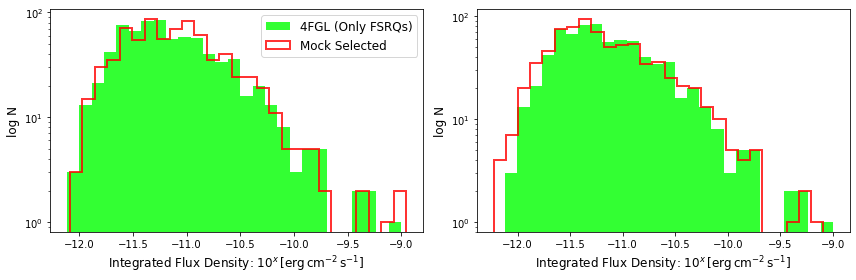

In [126]:
fig = plt.figure(figsize=(12, 4))

fig.add_subplot(121)
plt.hist(np.log10(v22LP_df_fsrq['En_flux_100']), bins=AGNs_fsrq_bins, density=False, 
         label='4FGL (Only FSRQs)', color='lime', alpha=0.8)

plt.hist(np.log10(final_result_list_fsrq), bins=AGNs_fsrq_bins, density=False, 
         histtype='stepfilled', fill=False, alpha=0.8, edgecolor='red', label='Mock Selected', 
        linewidth=2)




# plt.text(-10.6, 46, 'Number of sources in Mock: %d'%( len(final_result_list) ) )
# plt.text()
plt.yscale('log')
plt.ylabel('log N', fontsize=12)

plt.xlabel(r'Integrated Flux Density: $10^{x}\, [\mathrm{erg}\, \mathrm{cm}^{-2}\, \mathrm{s}^{-1}]$', 
           fontsize=12)

plt.legend(fontsize=12)


fig.add_subplot(122)

plt.hist(np.log10(v22LP_df_fsrq['En_flux_100']), bins=AGNs_fsrq_bins, density=False, 
         label='4FGL (Only FSRQs)', color='lime', alpha=0.8)

plt.hist(np.log10(f_result_list_fsrq_comb), bins=AGNs_fsrq_bins, density=False, 
         histtype='stepfilled', fill=False, alpha=0.8, edgecolor='red', label='Mock Selected', 
        linewidth=2)




# plt.text(-10.6, 46, 'Number of sources in Mock: %d'%( len(final_result_list) ) )
# plt.text()
plt.yscale('log')
plt.ylabel('log N', fontsize=12)

plt.xlabel(r'Integrated Flux Density: $10^{x}\, [\mathrm{erg}\, \mathrm{cm}^{-2}\, \mathrm{s}^{-1}]$', 
           fontsize=12)


# plt.savefig('Integrated_E100_mock_4FGLV23_AGNs.png', dpi=170)
plt.tight_layout()

print(len(final_result_list_fsrq), len(f_result_list_fsrq_comb))

len of Flux Density:  738


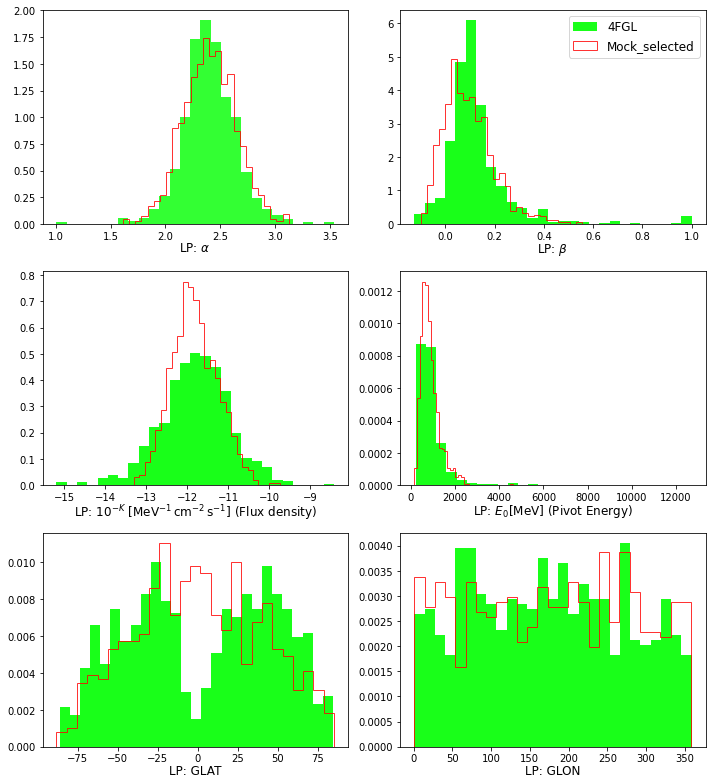

In [127]:
# print for sanity check @ length of all lists of parameters should be same

# compare the 4FGL original distribution and the selected parameters distribution 


fig = plt.figure(figsize=(10, 11))

fig.add_subplot(321)


plt.hist(v22LP_df_fsrq['LP_index'], bins=AGNs_fsrq_bins, density=True, label='4FGL FSRQ', color= 'lime', alpha=0.8)
plt.hist(c_lp_a_fsrq, bins=AGNs_fsrq_bins, density=True, label='mock selected', 
        histtype='stepfilled', fill=False, alpha=0.8, edgecolor='red')

plt.xlabel(r'LP: $\alpha$', fontsize=12, labelpad=0.1)
# plt.legend(fontsize=12)


fig.add_subplot(322)


plt.hist(v22LP_df_fsrq['LP_beta'], bins=AGNs_fsrq_bins, density=True, label='4FGL', color= 'lime', alpha=0.9)
plt.hist(c_lp_b_fsrq, bins=AGNs_fsrq_bins, density=True, label='Mock_selected', 
         histtype='stepfilled', fill=False, alpha=0.8, edgecolor='red')

plt.xlabel(r'LP: $\beta$', fontsize=12, labelpad=0.1)
plt.legend(fontsize=12)

print ('len of Flux Density: ', len(c_lp_F_fsrq))
fig.add_subplot(323) # log of flux density is plotted 

plt.hist(np.log10(v22LP_df_fsrq['LP_f_density']), bins=AGNs_fsrq_bins, density=True, label='4FGL', 
         color= 'lime', alpha=0.9)
plt.hist(np.log10(c_lp_F_fsrq_comb), bins=AGNs_fsrq_bins, density=True, histtype='stepfilled', fill=False, alpha=0.8, 
         edgecolor='red')

plt.xlabel(r'LP: $10^{-K}\, \, [\mathrm{MeV}^{-1}\, \mathrm{cm}^{-2}\, \mathrm{s}^{-1}]$ (Flux density)', 
           fontsize=12, labelpad=0.1)

fig.add_subplot(324)

plt.hist(v22LP_df_fsrq['Piv_En'], bins=AGNs_fsrq_bins, density=True, label='4FGL', color= 'lime', alpha=0.9)
plt.hist(c_lp_PEn_fsrq_comb, bins=AGNs_bll_bins, density=True, histtype='stepfilled', fill=False, alpha=0.8, 
         edgecolor='red')

plt.xlabel(r'LP: $E_0 [\mathrm{MeV}]$ (Pivot Energy)', fontsize=12, labelpad=0.1)

fig.add_subplot(325)

plt.hist(v22LP_df_fsrq['GLAT'], bins=AGNs_fsrq_bins, density=True, label='4FGL', color= 'lime', alpha=0.9)
plt.hist(c_GLAT_fsrq_comb, bins=AGNs_fsrq_bins, density=True, histtype='stepfilled', fill=False, alpha=0.8, 
         edgecolor='red')

plt.xlabel(r'LP: GLAT', fontsize=12, labelpad=0.1)

fig.add_subplot(326)

plt.hist(v22LP_df_fsrq['GLON'], bins=AGNs_fsrq_bins, density=True, label='4FGL', color= 'lime', alpha=0.9)
plt.hist(c_GLON_fsrq_comb, bins=AGNs_fsrq_bins, density=True, histtype='stepfilled', fill=False, alpha=0.8, 
         edgecolor='red')

plt.xlabel(r'LP: GLON', fontsize=12, labelpad=0.1)

plt.tight_layout()

In [128]:
#### check the min max value of different params for the mock catalog

print ('mock cat alpha max; ', max(c_lp_a_fsrq))
print ('mock cat alpha min; ', min(c_lp_a_fsrq))

print ('mock cat beta max; ', max(c_lp_b_bll))
print ('mock cat beta min; ', min(c_lp_b_bll))

print ('mock cat beta max; ', max(c_lp_F_bll))
print ('mock cat beta min; ', min(c_lp_F_bll))

print ('mock cat beta max; ', max(c_lp_PEn_bll))
print ('mock cat beta min; ', min(c_lp_PEn_bll))

mock cat alpha max;  3.1249047016931644
mock cat alpha min;  1.6138839925196191
mock cat beta max;  0.7029451834311917
mock cat beta min;  -0.08897968356151527
mock cat beta max;  6.0346668648289944e-12
mock cat beta min;  2.186036258244566e-15
mock cat beta max;  15144.99732163819
mock cat beta min;  396.8253100991685


check some values of the noise_N:  1.2871847453823104 1.0413512031580208 0.8986583859179317


(array([3.2969183 , 2.35494165, 1.41296499, 0.47098833, 1.88395332,
        1.41296499, 1.41296499, 0.47098833, 2.35494165, 2.35494165]),
 array([0.7133483 , 0.77073194, 0.82811559, 0.88549923, 0.94288288,
        1.00026652, 1.05765017, 1.11503381, 1.17241746, 1.2298011 ,
        1.28718475]),
 <a list of 10 Patch objects>)

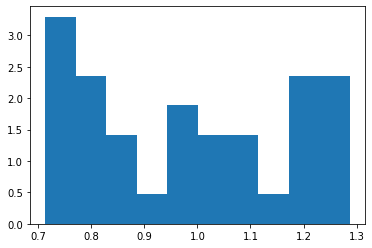

In [129]:
#### introduce the poisson noise (used later for filling source)

noise_N_bcu = np.random.uniform(0.7, 1.3, AGNs_bcu_bins)    
# noise_N_fsrq_high = np.random.uniform(0.7, 1.3, len(E100bins_fsrq_high))
noise_N_bcu_comb = np.random.uniform(0.7, 1.3, AGNs_bcu_bins+1)

print ('check some values of the noise_N: ', noise_N_bcu[5], noise_N_bcu[10], noise_N_bcu[15])  
plt.hist(noise_N_bcu, density=True, bins=10)

In [135]:
#### Generation of BCU Catalogue

rand_LPIndex_mock_dist_bcu    = random.sample(LPIndex_mock_dist_bcu.tolist(), 11000)
rand_LPBeta_mock_dist_bcu     = random.sample(LPBeta_mock_dist2_bcu.tolist(), 11000)
rand_LPFDensity_mock_dist_bcu = random.sample(LPFDensity_mock_dist_bcu.tolist(), 11000)
rand_LPPivEn_mock_dist_bcu    = random.sample(LPPivEn_mock_dist3_bcu.tolist(), 11000)

rand_GLAT_bcu                 = random.sample(mock_GLAT_bcu.tolist(), 11000)
rand_GLON_bcu                 = random.sample(mock_GLON_bcu.tolist(), 11000)

In [131]:
def simple_lum_bcu(n):
    result_list_bcu = []
#     comp_list = [0] * len(E100hist_list)
    final_result_list_bcu = []
    c_lp_a_bcu   = [] # AGN alpha
    c_lp_b_bcu   = [] # AGN beta
    c_lp_F_bcu   = [] # flux density
    c_lp_PEn_bcu = [] # pivot  energy
    c_GLAT_bcu   = [] # lat
    c_GLON_bcu   = [] # long
    #### loop over the number of sources (selected in random)
    for x in range(4900):
        LP_index_bcu = rand_LPIndex_mock_dist_bcu[x]
        LP_beta_bcu  = rand_LPBeta_mock_dist_bcu[x]
        LP_FD_bcu    = rand_LPFDensity_mock_dist_bcu[x]
        LP_PEn_bcu   = rand_LPPivEn_mock_dist_bcu[x]
        LP_glat_bcu  = rand_GLAT_bcu[x]
        LP_glon_bcu  = rand_GLON_bcu[x]

        
        
        result_bcu   = Integrate(n, 100, 100e3, alpha=LP_index_bcu, beta=LP_beta_bcu, 
                                 PivEn=LP_PEn_bcu, FluxDensity=LP_FD_bcu)
        # n is the number of steps in integration, higher ---> better accuracy
        # unit here is MeV cm^-2 s^-1 :
        result_bcu   = result_bcu * 1.6e-6 
        # unit here is Erg cm^-2 s^-1:
        # lowest bin -12.378695, highest bin -9.002079  
        if result_bcu>=6.493068730565138e-13 and result_bcu <= 4.505053989279244e-11: # 10**(lbin), 10**(hbin)
            result_list_bcu.append(result_bcu)

            c_lp_a_bcu.append(LP_index_bcu)
            c_lp_b_bcu.append(LP_beta_bcu)
            c_lp_F_bcu.append(LP_FD_bcu)
            c_lp_PEn_bcu.append(LP_PEn_bcu)
            c_GLAT_bcu.append(LP_glat_bcu)
            c_GLON_bcu.append(LP_glon_bcu)
            
            mockE100hist_bcu, bins_bcu = np.histogram(np.log10(result_list_bcu), bins=E100bins_bcu, density=False)
            mockE100hist_list_bcu = mockE100hist_bcu.tolist()
#         for Ebins in E100bins_notlast:
            for x1, x2, x3 in zip(mockE100hist_list_bcu, E100hist_list_bcu, noise_N_bcu): 
                if (x1*x3) > x2:
                    print ('!!! mock higher than the real !!!', x1, x2)
                    result_list_bcu.pop()
#                     print ('result_list len: ', len(result_list))
                    final_result_list_bcu = result_list_bcu[:]
                    c_lp_a_bcu.pop()
                    c_lp_b_bcu.pop()
                    c_lp_F_bcu.pop()
                    c_lp_PEn_bcu.pop()
                    c_GLAT_bcu.pop()
                    c_GLON_bcu.pop()
        
                else:
                    continue
                    print (':) :) what is happening here :) :)')
                
#                 result_list.pop()    
    return final_result_list_bcu, c_lp_a_bcu, c_lp_b_bcu, c_lp_F_bcu, c_lp_PEn_bcu, c_GLAT_bcu, c_GLON_bcu

In [132]:
final_result_list_bcu, c_lp_a_bcu, c_lp_b_bcu, c_lp_F_bcu, c_lp_PEn_bcu, c_GLAT_bcu, c_GLON_bcu = simple_lum_bcu(1070)

print('check the number of selected sources: \n', len(c_lp_a_bcu))

!!! mock higher than the real !!! 2 2.0
!!! mock higher than the real !!! 2 2.0
!!! mock higher than the real !!! 2 2.0
!!! mock higher than the real !!! 2 2.0
!!! mock higher than the real !!! 3 2.0
!!! mock higher than the real !!! 3 2.0
!!! mock higher than the real !!! 2 1.0
!!! mock higher than the real !!! 2 1.0
!!! mock higher than the real !!! 2 2.0
!!! mock higher than the real !!! 3 2.0
!!! mock higher than the real !!! 2 1.0
!!! mock higher than the real !!! 7 8.0
!!! mock higher than the real !!! 7 5.0
!!! mock higher than the real !!! 10 9.0
!!! mock higher than the real !!! 10 9.0
!!! mock higher than the real !!! 10 9.0
!!! mock higher than the real !!! 2 1.0
!!! mock higher than the real !!! 7 8.0
!!! mock higher than the real !!! 2 2.0
!!! mock higher than the real !!! 10 9.0
!!! mock higher than the real !!! 5 5.0
!!! mock higher than the real !!! 3 2.0
!!! mock higher than the real !!! 2 1.0
!!! mock higher than the real !!! 7 8.0
!!! mock higher than the real !!! 10

In [ ]:
# E100bins_bcu_list_combined

In [136]:
def simple_lum_bcu_comb(n):
    result_list_bcu = []
#     comp_list = [0] * len(E100hist_list)
    final_result_list_bcu = []
    c_lp_a_bcu   = [] # AGN alpha
    c_lp_b_bcu   = [] # AGN beta
    c_lp_F_bcu   = [] # flux density
    c_lp_PEn_bcu = [] # pivot  energy
    c_GLAT_bcu   = [] # lat
    c_GLON_bcu   = [] # long
    #### loop over the number of sources (selected in random)
    for x in range(4700):
        LP_index_bcu = rand_LPIndex_mock_dist_bcu[x]
        LP_beta_bcu  = rand_LPBeta_mock_dist_bcu[x]
        LP_FD_bcu    = rand_LPFDensity_mock_dist_bcu[x]
        LP_PEn_bcu   = rand_LPPivEn_mock_dist_bcu[x]
        LP_glat_bcu  = rand_GLAT_bcu[x]
        LP_glon_bcu  = rand_GLON_bcu[x]

        
        
        result_bcu   = Integrate(n, 100, 100e3, alpha=LP_index_bcu, beta=LP_beta_bcu, 
                                 PivEn=LP_PEn_bcu, FluxDensity=LP_FD_bcu)
        # n is the number of steps in integration, higher ---> better accuracy
        # unit here is MeV cm^-2 s^-1 :
        result_bcu   = result_bcu * 1.6e-6 
        # unit here is Erg cm^-2 s^-1:
        # lowest bin -12.378695, highest bin -9.002079  
        # E100hist_list_bll_combined = check_area1sigh_bll_list_pow + E100hist_list_bll_high
        # E100bins_bll_list_combined = selected_bins1_list_bll_extended + E100bins_bll_list_high
        if result_bcu>=10**E100bins_bcu_list_combined[0] and result_bcu < 10**(E100bins_bcu_list_combined[-1]): # 10**(lbin), 10**(hbin)
            result_list_bcu.append(result_bcu)

            c_lp_a_bcu.append(LP_index_bcu)
            c_lp_b_bcu.append(LP_beta_bcu)
            c_lp_F_bcu.append(LP_FD_bcu)
            c_lp_PEn_bcu.append(LP_PEn_bcu)
            c_GLAT_bcu.append(LP_glat_bcu)
            c_GLON_bcu.append(LP_glon_bcu)
            
            mockE100hist_bcu, bins_bcu = np.histogram(np.log10(result_list_bcu), bins=E100bins_bcu_list_combined, density=False)
            mockE100hist_list_bcu = mockE100hist_bcu.tolist()
#         for Ebins in E100bins_notlast:
            for x1, x2, x3 in zip(mockE100hist_list_bcu, E100hist_list_bcu_combined, noise_N_bcu_comb): 
                if (x1*x3) > x2:
                    print ('!!! mock higher than the real !!!', x1, x2)
                    result_list_bcu.pop()
#                     print ('result_list len: ', len(result_list))
                    final_result_list_bcu = result_list_bcu[:]
                    c_lp_a_bcu.pop()
                    c_lp_b_bcu.pop()
                    c_lp_F_bcu.pop()
                    c_lp_PEn_bcu.pop()
                    c_GLAT_bcu.pop()
                    c_GLON_bcu.pop()
        
                else:
                    continue
                    print (':) :) what is happening here :) :)')
                
#                 result_list.pop()    
    return final_result_list_bcu, c_lp_a_bcu, c_lp_b_bcu, c_lp_F_bcu, c_lp_PEn_bcu, c_GLAT_bcu, c_GLON_bcu

In [137]:
final_result_list_bcu_comb, c_lp_a_bcu_comb, c_lp_b_bcu_comb, c_lp_F_bcu_comb, c_lp_PEn_bcu_comb, c_GLAT_bcu_comb, c_GLON_bcu_comb = simple_lum_bcu_comb(1070)

print('check the number of selected sources: \n', len(c_lp_a_bcu_comb))

!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 1 1.0
!!! mock higher than the real !!! 2 2.0
!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 1 1.0
!!! mock higher than the real !!! 2 2.0
!!! mock higher than the real !!! 2 2.0
!!! mock higher than the real !!! 1 1.0
!!! mock higher than the real !!! 2 1.0
!!! mock higher than the real !!! 5 4.159573798128265
!!! mock higher than the real !!! 2 2.0
!!! mock higher than the real !!! 2 2.0
!!! mock higher than the real !!! 2 2.0
!!! mock higher than the real !!! 6 5.0
!!! mock higher than the real !!! 2 1.0
!!! mock higher than the real !!! 1 1.0
!!! mock higher than the real !!! 1 1.0
!!! mock higher than the real !!! 2 1.0
!!! mock higher than the real !!! 5 4.159573798128265
!!! mock higher than the real !!! 5 4.159573798128265
!!! mock higher than the real !!! 7 5.624103269164843
!!! mock higher than the

1270 1311


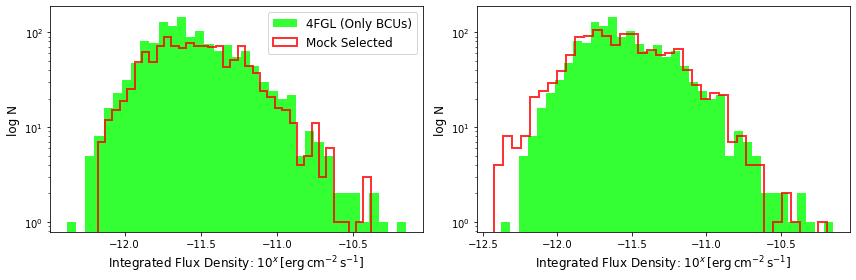

In [138]:
fig = plt.figure(figsize=(12, 4))

fig.add_subplot(121)
plt.hist(np.log10(v22LP_df_bcu['En_flux_100']), bins=AGNs_bcu_bins, density=False, 
         label='4FGL (Only BCUs)', color='lime', alpha=0.8)

plt.hist(np.log10(final_result_list_bcu), bins=AGNs_bcu_bins, density=False, 
         histtype='stepfilled', fill=False, alpha=0.8, edgecolor='red', label='Mock Selected', 
        linewidth=2)




# plt.text(-10.6, 46, 'Number of sources in Mock: %d'%( len(final_result_list) ) )
# plt.text()
plt.yscale('log')
plt.ylabel('log N', fontsize=12)

plt.xlabel(r'Integrated Flux Density: $10^{x}\, [\mathrm{erg}\, \mathrm{cm}^{-2}\, \mathrm{s}^{-1}]$', 
           fontsize=12)

plt.legend(fontsize=12)


fig.add_subplot(122)

plt.hist(np.log10(v22LP_df_bcu['En_flux_100']), bins=AGNs_bcu_bins, density=False, 
         label='4FGL (Only BCUs)', color='lime', alpha=0.8)

plt.hist(np.log10(final_result_list_bcu_comb), bins=AGNs_bcu_bins, density=False, 
         histtype='stepfilled', fill=False, alpha=0.8, edgecolor='red', label='Mock Selected', 
        linewidth=2)




# plt.text(-10.6, 46, 'Number of sources in Mock: %d'%( len(final_result_list) ) )
# plt.text()
plt.yscale('log')
plt.ylabel('log N', fontsize=12)

plt.xlabel(r'Integrated Flux Density: $10^{x}\, [\mathrm{erg}\, \mathrm{cm}^{-2}\, \mathrm{s}^{-1}]$', 
           fontsize=12)


# plt.savefig('Integrated_E100_mock_4FGLV23_AGNs.png', dpi=170)
plt.tight_layout()

print(len(final_result_list_bcu), len(final_result_list_bcu_comb))

In [ ]:
# plot the E100s together



In [139]:
### randomly select 35% of entries from BCU, this will be for bll 
### randomly select 28% of entries from BCU, this will be for fsrq

c_lp_a_bcu_comb_rand_samp = random.sample(c_lp_a_bcu_comb, int(len(c_lp_a_bcu_comb)*0.62))
c_lp_a_bcu_comb_bll = c_lp_a_bcu_comb_rand_samp[0: int(len(c_lp_a_bcu_comb)*0.35)]
c_lp_a_bcu_comb_fsrq = c_lp_a_bcu_comb_rand_samp[int(len(c_lp_a_bcu_comb)*0.35):]


c_lp_b_bcu_comb_rand_samp = random.sample(c_lp_b_bcu_comb, int(len(c_lp_b_bcu_comb)*0.62))
c_lp_b_bcu_comb_bll = c_lp_b_bcu_comb_rand_samp[0: int(len(c_lp_b_bcu_comb)*0.35)]
c_lp_b_bcu_comb_fsrq = c_lp_b_bcu_comb_rand_samp[int(len(c_lp_b_bcu_comb)*0.35):]

c_lp_F_bcu_comb_rand_samp = random.sample(c_lp_F_bcu_comb, int(len(c_lp_F_bcu_comb)*0.62))
c_lp_F_bcu_comb_bll = c_lp_F_bcu_comb_rand_samp[0: int(len(c_lp_F_bcu_comb)*0.35)]
c_lp_F_bcu_comb_fsrq = c_lp_F_bcu_comb_rand_samp[int(len(c_lp_F_bcu_comb)*0.35):]

c_lp_PEn_bcu_comb_rand_samp = random.sample(c_lp_PEn_bcu_comb, int(len(c_lp_PEn_bcu_comb)*0.62))
c_lp_PEn_bcu_comb_bll = c_lp_PEn_bcu_comb_rand_samp[0: int(len(c_lp_PEn_bcu_comb)*0.35)]
c_lp_PEn_bcu_comb_fsrq = c_lp_PEn_bcu_comb_rand_samp[int(len(c_lp_PEn_bcu_comb)*0.35):]

c_GLON_bcu_comb_rand_samp = random.sample(c_GLON_bcu_comb, int(len(c_GLON_bcu_comb)*0.62))
c_GLON_bcu_comb_bll = c_GLON_bcu_comb_rand_samp[0: int(len(c_GLON_bcu_comb)*0.35)]
c_GLON_bcu_comb_fsrq = c_GLON_bcu_comb_rand_samp[int(len(c_GLON_bcu_comb)*0.35):]

c_GLAT_bcu_comb_rand_samp = random.sample(c_GLAT_bcu_comb, int(len(c_GLAT_bcu_comb)*0.62))
c_GLAT_bcu_comb_bll = c_GLAT_bcu_comb_rand_samp[0: int(len(c_GLAT_bcu_comb)*0.35)]
c_GLAT_bcu_comb_fsrq = c_GLAT_bcu_comb_rand_samp[int(len(c_GLAT_bcu_comb)*0.35):]

print ('check lengths: ', len(c_lp_PEn_bcu_comb_bll), len(c_lp_PEn_bcu_comb_fsrq), len(c_lp_F_bcu_comb_bll), 
       len(c_lp_F_bcu_comb_fsrq))

# for n_bcu, al_bcu, be_bcu, pivE_bcu, ra_bcu, dec_bcu, num_bcu in zip(c_lp_F_bll, c_lp_a_bll, c_lp_b_bll, 
#                                                                      c_lp_PEn_bll, c_GLON_bll, c_GLAT_bll, 
#                                                                      mock_source_num_bll):

#### add with the mock org bll and fsrq 

c_lp_a_bll_comb_bcu = c_lp_a_bll + c_lp_a_bcu_comb_bll
print (len(c_lp_a_bll_comb_bcu))

c_lp_b_bll_comb_bcu = c_lp_b_bll + c_lp_b_bcu_comb_bll
c_lp_PEn_bll_comb_bcu = c_lp_PEn_bll + c_lp_PEn_bcu_comb_bll
c_lp_F_bll_comb_bcu = c_lp_F_bll + c_lp_F_bcu_comb_bll
c_GLON_bll_comb_bcu = c_GLON_bll + c_GLON_bcu_comb_bll
c_GLAT_bll_comb_bcu = c_GLAT_bll + c_GLAT_bcu_comb_bll

c_lp_a_fsrq_comb_bcu = c_lp_a_fsrq + c_lp_b_bcu_comb_fsrq
c_lp_b_fsrq_comb_bcu = c_lp_b_fsrq + c_lp_F_bcu_comb_fsrq
c_lp_F_fsrq_comb_bcu = c_lp_F_fsrq + c_lp_F_bcu_comb_fsrq
c_lp_PEn_fsrq_comb_bcu = c_lp_PEn_fsrq + c_lp_PEn_bcu_comb_fsrq
c_GLON_fsrq_comb_bcu = c_GLON_fsrq + c_GLON_bcu_comb_fsrq
c_GLAT_fsrq_comb_bcu = c_GLAT_fsrq + c_GLAT_bcu_comb_fsrq

print ('total bcu + bll: ', len(c_lp_b_bll_comb_bcu))
print ('total bcu + fsrq: ', len(c_lp_b_fsrq_comb_bcu))

check lengths:  458 354 458 354
1736
total bcu + bll:  1736
total bcu + fsrq:  1092


In [ ]:
bll_bcu_ra_cord_list = []
bll_bcu_dec_cord_list = []

mock_source_num_bll_comb_bcu = [i for i in range(len(c_lp_a_bll_comb_bcu))]



for blllo, bllla in zip(c_GLON_bll_comb_bcu, c_GLAT_bll_comb_bcu):
    c_icrs1_bll  = SkyCoord(l=blllo*u.degree, b=bllla*u.degree, frame='galactic')
    bll_bcu_ra_cord_list.append(c_icrs1_bll.fk5.ra.degree)
    bll_bcu_dec_cord_list.append(c_icrs1_bll.fk5.dec.degree)

In [ ]:
fsrq_bcu_ra_cord_list = []
fsrq_bcu_dec_cord_list = []

mock_source_num_fsrq_comb_bcu = [i for i in range(len(c_lp_a_fsrq_comb_bcu))]



for fsrqlo, fsrqla in zip(c_GLON_fsrq_comb_bcu, c_GLAT_fsrq_comb_bcu):
    c_icrs1_fsrq  = SkyCoord(l=fsrqlo*u.degree, b=fsrqla*u.degree, frame='galactic')
    fsrq_bcu_ra_cord_list.append(c_icrs1_fsrq.fk5.ra.degree)
    fsrq_bcu_dec_cord_list.append(c_icrs1_fsrq.fk5.dec.degree)

In [ ]:
mock_source_num_bll_comb_bcu = [i for i in range(len(c_lp_a_bll_comb_bcu))]

mock_xmlfile_bll_bcu_comb = open('/content/drive/My Drive/mock_4FGL_V22_bll_comb_bcu.xml', 'w')
mock_xmlfile_bll_bcu_comb.write('<source_library title="source library">\n')
for n, al, be, pivE, ra, dec, num in zip(c_lp_F_bll_comb_bcu, c_lp_a_bll_comb_bcu, c_lp_b_bll_comb_bcu, 
                                         c_lp_PEn_bll_comb_bcu, 
                                         bll_bcu_ra_cord_list, bll_bcu_dec_cord_list, 
                                         mock_source_num_bll_comb_bcu):
    
    mock_xmlfile_bll_bcu_comb.write('<source name="LogParabola_source{0}" type="PointSource">\n'.format(num))
    mock_xmlfile_bll_bcu_comb.write('<!-- point source units are cm^-2 s^-1 MeV^-1 -->\n')
    mock_xmlfile_bll_bcu_comb.write('<spectrum type="LogParabola">\n')
    mock_xmlfile_bll_bcu_comb.write(
        '<parameter free="1" max="{0}" min="{1}" name="norm" scale="1.0" value="{2}"/>\n'.format(max(c_lp_F_bll_comb_bcu), min(c_lp_F_bll_comb_bcu), n))
    mock_xmlfile_bll_bcu_comb.write(
        '<parameter free="1" max="{0}" min="{1}" name="alpha" scale="1.0" value="{2}"/>\n'.format(max(c_lp_a_bll_comb_bcu), min(c_lp_a_bll_comb_bcu), al))
    mock_xmlfile_bll_bcu_comb.write(
        '<parameter free="1" max="{0}" min="{1}" name="Eb" scale="1" value="{2}"/>\n'.format(max(c_lp_PEn_bll_comb_bcu), min(c_lp_PEn_bll_comb_bcu), pivE))
    mock_xmlfile_bll_bcu_comb.write(
        '<parameter free="1" max="{0}" min="{1}" name="beta" scale="1.0" value="{2}"/>\n'.format(max(c_lp_b_bll_comb_bcu), min(c_lp_b_bll_comb_bcu), be))
    mock_xmlfile_bll_bcu_comb.write('</spectrum>\n')
    mock_xmlfile_bll_bcu_comb.write('<spatialModel type="SkyDirFunction">\n')
    mock_xmlfile_bll_bcu_comb.write(
        '<parameter free="0" max="360." min="0." name="RA" scale="1.0" value="{0}"/>\n'.format(ra))
    mock_xmlfile_bll_bcu_comb.write(
        '<parameter free="0" max="90." min="-90." name="DEC" scale="1.0" value="{0}"/>\n'.format(dec))
    mock_xmlfile_bll_bcu_comb.write('</spatialModel>\n')
    mock_xmlfile_bll_bcu_comb.write('</source>\n')
    
mock_xmlfile_bll_bcu_comb.write('</source_library>')    
mock_xmlfile_bll_bcu_comb.close()

check sampling and org K length:  1736 1736


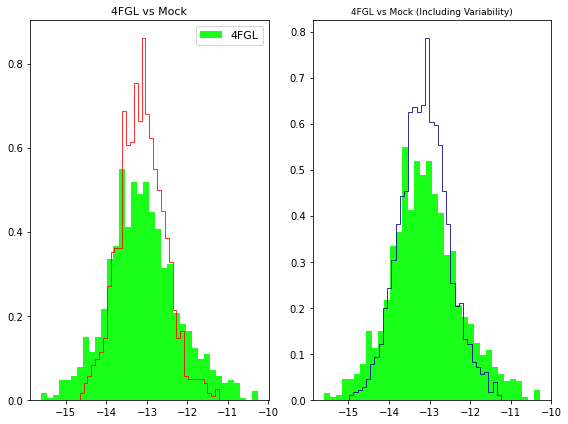

In [140]:
#### here we randomly select the variability and multiply with pre-factor 
#### 

year_mean_mock_dist3fbll_list_new_select = random.sample(year_mean_mock_dist3fbll_list_new, 
                                                         len(c_lp_F_bll_comb_bcu))


print ('check sampling and org K length: ', len(year_mean_mock_dist3fbll_list_new_select), len(c_lp_F_bll_comb_bcu))

variability_bll_bcu_F = [a*b for a, b in zip(year_mean_mock_dist3fbll_list_new_select, c_lp_F_bll_comb_bcu)]

fig = plt.figure(figsize=(8, 6))

fig.add_subplot(121)
plt.hist(np.log10(v22LP_df_bll['LP_f_density']), bins=AGNs_bll_bins, density=True, label='4FGL', 
         color= 'lime', alpha=0.9)
plt.hist(np.log10(c_lp_F_bll), bins=AGNs_bll_bins, density=True, histtype='stepfilled', fill=False, alpha=0.8, 
         edgecolor='red', )

plt.title('4FGL vs Mock', fontsize=11)
plt.legend(fontsize=11)

fig.add_subplot(122)

plt.hist(np.log10(v22LP_df_bll['LP_f_density']), bins=AGNs_bll_bins, density=True, label='4FGL', 
         color= 'lime', alpha=0.9)
plt.hist(np.log10(variability_bll_bcu_F), bins=AGNs_bll_bins, density=True, histtype='stepfilled', fill=False, alpha=0.8, 
         edgecolor='navy')

plt.title('4FGL vs Mock (Including Variability)', fontsize=9)
plt.tight_layout()

In [141]:
# check if zeros exist or not 
print (year_mean_mock_dist3ffsrq_list_new.count(0))

year_mean_mock_dist3ffsrq_list_new_negative = [a for a in year_mean_mock_dist3ffsrq_list_new if a < 0.0]

print (len(year_mean_mock_dist3ffsrq_list_new_negative))

0
1


check sampling and org K length:  1092 1092


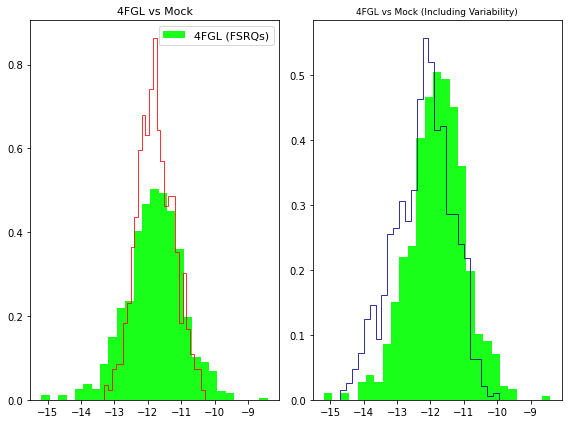

In [142]:
#### here we randomly select the variability and multiply with pre-factor 
#### 

year_mean_mock_dist3ffsrq_list_new_select = random.sample(year_mean_mock_dist3ffsrq_list_new, 
                                                         len(c_lp_F_fsrq_comb_bcu))


print ('check sampling and org K length: ', len(year_mean_mock_dist3ffsrq_list_new_select), len(c_lp_F_fsrq_comb_bcu))

variability_fsrq_bcu_F = [a*b for a, b in zip(year_mean_mock_dist3ffsrq_list_new_select, c_lp_F_fsrq_comb_bcu)]

fig = plt.figure(figsize=(8, 6))

fig.add_subplot(121)
plt.hist(np.log10(v22LP_df_fsrq['LP_f_density']), bins=AGNs_fsrq_bins, density=True, label='4FGL (FSRQs)', 
         color= 'lime', alpha=0.9)
plt.hist(np.log10(c_lp_F_fsrq), bins=AGNs_fsrq_bins, density=True, histtype='stepfilled', fill=False, alpha=0.8, 
         edgecolor='red', )

plt.title('4FGL vs Mock', fontsize=11)
plt.legend(fontsize=11)

fig.add_subplot(122)

variability_fsrq_bcu_F = [a for a in variability_fsrq_bcu_F if a >0.0]

plt.hist(np.log10(v22LP_df_fsrq['LP_f_density']), bins=AGNs_fsrq_bins, density=True, label='4FGL', 
         color= 'lime', alpha=0.9)
plt.hist(np.log10(variability_fsrq_bcu_F), bins=AGNs_fsrq_bins, density=True, histtype='stepfilled', fill=False, alpha=0.8, 
         edgecolor='navy')

plt.title('4FGL vs Mock (Including Variability)', fontsize=9)
plt.tight_layout()

In [ ]:
mock_source_num_fsrq_comb_bcu = [i for i in range(len(c_lp_a_fsrq_comb_bcu))]

mock_xmlfile_fsrq_bcu_comb = open('/content/drive/My Drive/mock_4FGL_V22_fsrq_comb_bcu.xml', 'w')
mock_xmlfile_fsrq_bcu_comb.write('<source_library title="source library">\n')
for n, al, be, pivE, ra, dec, num in zip(c_lp_F_fsrq_comb_bcu, c_lp_a_fsrq_comb_bcu, c_lp_b_fsrq_comb_bcu, 
                                         c_lp_PEn_fsrq_comb_bcu, 
                                         c_GLON_fsrq_comb_bcu, c_GLAT_fsrq_comb_bcu, mock_source_num_fsrq_comb_bcu):
    
    mock_xmlfile_fsrq_bcu_comb.write('<source name="LogParabola_source{0}" type="PointSource">\n'.format(num))
    mock_xmlfile_fsrq_bcu_comb.write('<!-- point source units are cm^-2 s^-1 MeV^-1 -->\n')
    mock_xmlfile_fsrq_bcu_comb.write('<spectrum type="LogParabola">\n')
    mock_xmlfile_fsrq_bcu_comb.write(
        '<parameter free="1" max="{0}" min="{1}" name="norm" scale="1.0" value="{2}"/>\n'.format(max(c_lp_F_fsrq_comb_bcu), min(c_lp_F_fsrq_comb_bcu), n))
    mock_xmlfile_fsrq_bcu_comb.write(
        '<parameter free="1" max="{0}" min="{1}" name="alpha" scale="1.0" value="{2}"/>\n'.format(max(c_lp_a_fsrq_comb_bcu), min(c_lp_a_fsrq_comb_bcu), al))
    mock_xmlfile_fsrq_bcu_comb.write(
        '<parameter free="1" max="{0}" min="{1}" name="Eb" scale="1" value="{2}"/>\n'.format(max(c_lp_PEn_fsrq_comb_bcu), min(c_lp_PEn_fsrq_comb_bcu), pivE))
    mock_xmlfile_fsrq_bcu_comb.write(
        '<parameter free="1" max="{0}" min="{1}" name="beta" scale="1.0" value="{2}"/>\n'.format(max(c_lp_b_fsrq_comb_bcu), min(c_lp_b_fsrq_comb_bcu), be))
    mock_xmlfile_fsrq_bcu_comb.write('</spectrum>\n')
    mock_xmlfile_fsrq_bcu_comb.write('<spatialModel type="SkyDirFunction">\n')
    mock_xmlfile_fsrq_bcu_comb.write(
        '<parameter free="0" max="360." min="0." name="RA" scale="1.0" value="{0}"/>\n'.format(ra))
    mock_xmlfile_fsrq_bcu_comb.write(
        '<parameter free="0" max="90." min="-90." name="DEC" scale="1.0" value="{0}"/>\n'.format(dec))
    mock_xmlfile_fsrq_bcu_comb.write('</spatialModel>\n')
    mock_xmlfile_fsrq_bcu_comb.write('</source>\n')
    
mock_xmlfile_fsrq_bcu_comb.write('</source_library>')    
mock_xmlfile_fsrq_bcu_comb.close()

In [ ]:
mock_source_num_bll = [i for i in range(len(c_lp_a_bll))]

mock_xmlfile_bll = open('/content/drive/My Drive/mock_4FGL_V22_bll.xml', 'w')
mock_xmlfile_bll.write('<source_library title="source library">\n')
for n, al, be, pivE, ra, dec, num in zip(c_lp_F_bll, c_lp_a_bll, c_lp_b_bll, c_lp_PEn_bll, 
                                         c_GLON_bll, c_GLAT_bll, mock_source_num_bll):
    
    mock_xmlfile_bll.write('<source name="LogParabola_source{0}" type="PointSource">\n'.format(num))
    mock_xmlfile_bll.write('<!-- point source units are cm^-2 s^-1 MeV^-1 -->\n')
    mock_xmlfile_bll.write('<spectrum type="LogParabola">\n')
    mock_xmlfile_bll.write(
        '<parameter free="1" max="{0}" min="{1}" name="norm" scale="1.0" value="{2}"/>\n'.format(max(c_lp_F_bll), min(c_lp_F_bll), n))
    mock_xmlfile_bll.write(
        '<parameter free="1" max="{0}" min="{1}" name="alpha" scale="1.0" value="{2}"/>\n'.format(max(c_lp_a_bll), min(c_lp_a_bll), al))
    mock_xmlfile_bll.write(
        '<parameter free="1" max="{0}" min="{1}" name="Eb" scale="1" value="{2}"/>\n'.format(max(c_lp_PEn_bll), min(c_lp_PEn_bll), pivE))
    mock_xmlfile_bll.write(
        '<parameter free="1" max="{0}" min="{1}" name="beta" scale="1.0" value="{2}"/>\n'.format(max(c_lp_b_bll), min(c_lp_b_bll), be))
    mock_xmlfile_bll.write('</spectrum>\n')
    mock_xmlfile_bll.write('<spatialModel type="SkyDirFunction">\n')
    mock_xmlfile_bll.write(
        '<parameter free="0" max="360." min="0." name="RA" scale="1.0" value="{0}"/>\n'.format(ra))
    mock_xmlfile_bll.write(
        '<parameter free="0" max="90." min="-90." name="DEC" scale="1.0" value="{0}"/>\n'.format(dec))
    mock_xmlfile_bll.write('</spatialModel>\n')
    mock_xmlfile_bll.write('</source>\n')
    
mock_xmlfile_bll.write('</source_library>')    
mock_xmlfile_bll.close()

In [ ]:
mock_source_num_fsrq = [i for i in range(len(c_lp_a_fsrq))]

mock_xmlfile_fsrq = open('/content/drive/My Drive/mock_4FGL_V22_fsrq.xml', 'w')
mock_xmlfile_fsrq.write('<source_library title="source library">\n')
for n, al, be, pivE, ra, dec, num in zip(c_lp_F_fsrq, c_lp_a_fsrq, c_lp_b_fsrq, c_lp_PEn_fsrq, 
                                         c_GLON_fsrq, c_GLAT_fsrq, mock_source_num_fsrq):
    
    mock_xmlfile_fsrq.write('<source name="LogParabola_source{0}" type="PointSource">\n'.format(num))
    mock_xmlfile_fsrq.write('<!-- point source units are cm^-2 s^-1 MeV^-1 -->\n')
    mock_xmlfile_fsrq.write('<spectrum type="LogParabola">\n')
    mock_xmlfile_fsrq.write(
        '<parameter free="1" max="{0}" min="{1}" name="norm" scale="1.0" value="{2}"/>\n'.format(max(c_lp_F_fsrq), min(c_lp_F_fsrq), n))
    mock_xmlfile_fsrq.write(
        '<parameter free="1" max="{0}" min="{1}" name="alpha" scale="1.0" value="{2}"/>\n'.format(max(c_lp_a_fsrq), min(c_lp_a_fsrq), al))
    mock_xmlfile_fsrq.write(
        '<parameter free="1" max="{0}" min="{1}" name="Eb" scale="1" value="{2}"/>\n'.format(max(c_lp_PEn_fsrq), min(c_lp_PEn_fsrq), pivE))
    mock_xmlfile_fsrq.write(
        '<parameter free="1" max="{0}" min="{1}" name="beta" scale="1.0" value="{2}"/>\n'.format(max(c_lp_b_fsrq), min(c_lp_b_fsrq), be))
    mock_xmlfile_fsrq.write('</spectrum>\n')
    mock_xmlfile_fsrq.write('<spatialModel type="SkyDirFunction">\n')
    mock_xmlfile_fsrq.write(
        '<parameter free="0" max="360." min="0." name="RA" scale="1.0" value="{0}"/>\n'.format(ra))
    mock_xmlfile_fsrq.write(
        '<parameter free="0" max="90." min="-90." name="DEC" scale="1.0" value="{0}"/>\n'.format(dec))
    mock_xmlfile_fsrq.write('</spatialModel>\n')
    mock_xmlfile_fsrq.write('</source>\n')
    
mock_xmlfile_fsrq.write('</source_library>')    
mock_xmlfile_fsrq.close()

In [ ]:
v22LP_df_psrs = v22LP_df_flux_history[(v22LP_df_flux_history['Class1']=='psr  ') | (v22LP_df_flux_history.Class1=='PSR  ')]
print (v22LP_df_psrs.shape) 

(239, 31)


### Section for Pulsars 

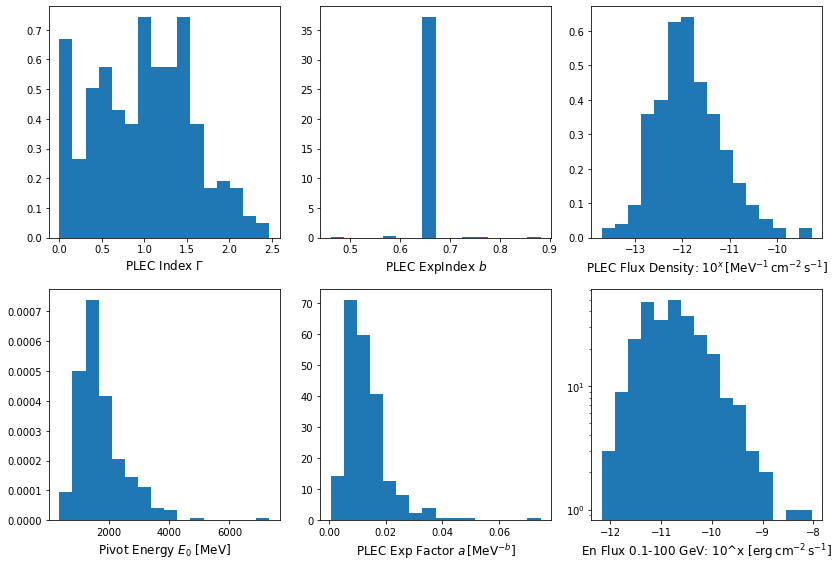

In [143]:
PLEC_df_bins = int(np.sqrt(len(v22LP_df_psrs)))

fig = plt.figure(figsize=(12, 8))

fig.add_subplot(231)
plt.hist(v22LP_df_psrs['PLEC_Index'], density=True, bins=PLEC_df_bins)
plt.xlabel(r'PLEC Index $\Gamma$', fontsize=12)

fig.add_subplot(232)
plt.hist(v22LP_df_psrs['PLEC_ExpIndex'], density=True, bins=PLEC_df_bins)
plt.xlabel(r'PLEC ExpIndex $b$', fontsize=12)

fig.add_subplot(233)
plt.hist(np.log10(v22LP_df_psrs['PLEC_FDensity']), bins=PLEC_df_bins, density=True)
#np.log10(v23LP_df_AGNs['LP_f_density']).plot.hist(density=True)
plt.xlabel(r'PLEC Flux Density: $10^{x}\, [\mathrm{MeV}^{-1}\, \mathrm{cm}^{-2}\, \mathrm{s}^{-1}] $', 
           fontsize=12)

fig.add_subplot(234)
plt.hist(v22LP_df_psrs['Piv_En'], bins=PLEC_df_bins, density=True)
plt.xlabel(r'Pivot Energy $E_0$ [MeV]', fontsize=12)

fig.add_subplot(235)
plt.hist(v22LP_df_psrs['PLEC_ExpFactor'], bins=PLEC_df_bins, density=True)
plt.xlabel(r'PLEC Exp Factor $a \, [\mathrm{MeV}^{-b}]$', fontsize=12)

fig.add_subplot(236)
plt.hist(np.log10(v22LP_df_psrs['En_flux_100']), bins=PLEC_df_bins, density=False)
plt.xlabel(r'En Flux 0.1-100 GeV: 10^x $[\mathrm{erg}\, \mathrm{cm}^{-2}\, \mathrm{s}^{-1}]$', 
          fontsize=12)
plt.yscale('log')
plt.tight_layout()
# plt.savefig('/content/drive/My Drive/Colab Notebooks/fermi-lat/PLEC_dist_4FGL.png', dpi=200)

In [144]:
PLEC_a_mean = v22LP_df_psrs['PLEC_ExpFactor'].mean()
PLEC_a_std  = v22LP_df_psrs['PLEC_ExpFactor'].std()

PLEC_b_mean = v22LP_df_psrs['PLEC_ExpIndex'].mean()
PLEC_b_std  = v22LP_df_psrs['PLEC_ExpIndex'].std()

PLEC_PEn_mean = v22LP_df_psrs['Piv_En'].mean()
PLEC_PEn_std  = v22LP_df_psrs['Piv_En'].std()

PLEC_index_mean = v22LP_df_psrs['PLEC_Index'].mean()
PLEC_index_std  = v22LP_df_psrs['PLEC_Index'].std()

PLEC_FDensity_mean = np.mean(np.log10(v22LP_df_psrs['PLEC_FDensity']))
PLEC_FDensity_std = np.std(np.log10(v22LP_df_psrs['PLEC_FDensity']))


print ('check PLEC_a_mean: ', PLEC_a_mean)
print ('check PLEC_a_std: ', PLEC_a_std)

print ('check PLEC_b_mean: ', PLEC_b_mean)
print ('check PLEC_b_std: ', PLEC_b_std)

print ('check PLEC_PEn_mean: ', PLEC_PEn_mean)
print ('check PLEC_PEn_std: ', PLEC_PEn_std)

print ('check PLEC_FDensity_mean: ', PLEC_FDensity_mean)
print ('check PLEC_FDensity_std: ', PLEC_FDensity_std)

print ('\n')


print ('check max min index : ', v22LP_df_psrs['PLEC_Index'].max(), v22LP_df_psrs['PLEC_Index'].min())
print ('check max min PLEC_a : ', v22LP_df_psrs['PLEC_ExpFactor'].max(), v22LP_df_psrs['PLEC_ExpFactor'].min())
print ('check max min PLEC_b : ', v22LP_df_psrs['PLEC_ExpIndex'].max(), v22LP_df_psrs['PLEC_ExpIndex'].min())
print ('check max min PLEC_FD : ', v22LP_df_psrs['PLEC_FDensity'].max(), v22LP_df_psrs['PLEC_FDensity'].min())
print ('check max min PLEC PEn : ', v22LP_df_psrs['Piv_En'].max(), v22LP_df_psrs['Piv_En'].min())

check PLEC_a_mean:  0.013177870772778988
check PLEC_a_std:  0.00818556360900402
check PLEC_b_mean:  0.6666297316551208
check PLEC_b_std:  0.021388720721006393
check PLEC_PEn_mean:  1758.966552734375
check PLEC_PEn_std:  821.6864013671875
check PLEC_FDensity_mean:  -11.855798721313477
check PLEC_FDensity_std:  0.7145320177078247


check max min index :  2.468688488006592 1.7910323890646396e-07
check max min PLEC_a :  0.07463113218545914 0.0006163084181025624
check max min PLEC_b :  0.8816205859184265 0.4602363407611847
check max min PLEC_FD :  5.418067106077729e-10 1.9994304199496063e-14
check max min PLEC PEn :  7319.00341796875 360.8782653808594


#### PLEC Mock Part 

In [164]:
PLEC_df_mock_cat_bins = 1200

seed1=33
np.random.seed(seed1)

PLECIndex_mock_dist1 = np.random.normal(PLEC_index_mean, PLEC_index_std, PLEC_df_mock_cat_bins)
### index minimum value is 0, so we select array elements based on condition 
# print (PLECIndex_mock_dist1.shape)
PLECIndex_mock_distf = PLECIndex_mock_dist1[np.where((PLECIndex_mock_dist1>0.) & (PLECIndex_mock_dist1<2.7))]
print (PLECIndex_mock_distf.shape)

PLECFden_mock_dist1  = 10**(np.random.normal(PLEC_FDensity_mean, PLEC_FDensity_std, PLEC_df_mock_cat_bins))

PLECb_mock_dist1     = np.random.normal(PLEC_b_mean, PLEC_b_std, PLEC_df_mock_cat_bins)


#### try as before lognorm distribution 

logshapePL_PEn, loglocPL_PEn, logscalePL_PEn = lognorm.fit(v22LP_df_psrs['Piv_En'], loc=0)
print ('check fit shape, loc and scale, log(scale) Pivot E: ', logshapePL_PEn, loglocPL_PEn, 
       logscalePL_PEn, np.log(logscalePL_PEn))

PLECPivEn_mock_dist3 = np.random.lognormal(np.log(logscalePL_PEn), logshapePL_PEn, PLEC_df_mock_cat_bins)
# plt.hist(LPPivEn_mock_dist3, density=True, bins=56, color='navy')

# try again lognorm for parameter a

logshapePL_Exp_a, loglocPL_Exp_a, logscalePL_Exp_a = lognorm.fit(v22LP_df_psrs['PLEC_ExpFactor'], loc=0.02)
print ('check fit shape, loc and scale, log(scale) Exp a:  ', logshapePL_Exp_a, loglocPL_Exp_a, 
       logscalePL_Exp_a, np.log(logscalePL_Exp_a))

PLECExp_a_mock_dist3 = np.random.lognormal(np.log(logscalePL_Exp_a), logshapePL_Exp_a, PLEC_df_mock_cat_bins)

##### Exp b parameter is rather weird ! try gennrom distribution 
from scipy.stats import cauchy

# cauchy_PLECb_loc, cauchy_PLEC_b_scale = cauchy.fit(v22PLEC_df_PSR['PLEC_ExpIndex'], loc=0.66)
# print ('check cauchy fits: ', cauchy_PLECb_loc, cauchy_PLEC_b_scale)
# better looking result than fit 

cauchy_PLEC_b_scale1 = 0.006 # this value is result of trial and error 
cauchy_PLECb_loc = 0.666

PLECExp_b_mock_dist3 = cauchy.rvs(cauchy_PLECb_loc, cauchy_PLEC_b_scale1, size=PLEC_df_mock_cat_bins)
PLECExp_b_mock_dist3f = PLECExp_b_mock_dist3[(PLECExp_b_mock_dist3>0.4) & (PLECExp_b_mock_dist3<0.95)]
## check the cut limits 
print (len(PLECExp_b_mock_dist3f))

(1145,)
check fit shape, loc and scale, log(scale) Pivot E:  0.418646858886163 -9.625531079297941 1616.0935680445318 7.387767138422498
check fit shape, loc and scale, log(scale) Exp a:   0.43287817964358233 -0.003243131300553827 0.014901129346949888 -4.206318273805719
1182


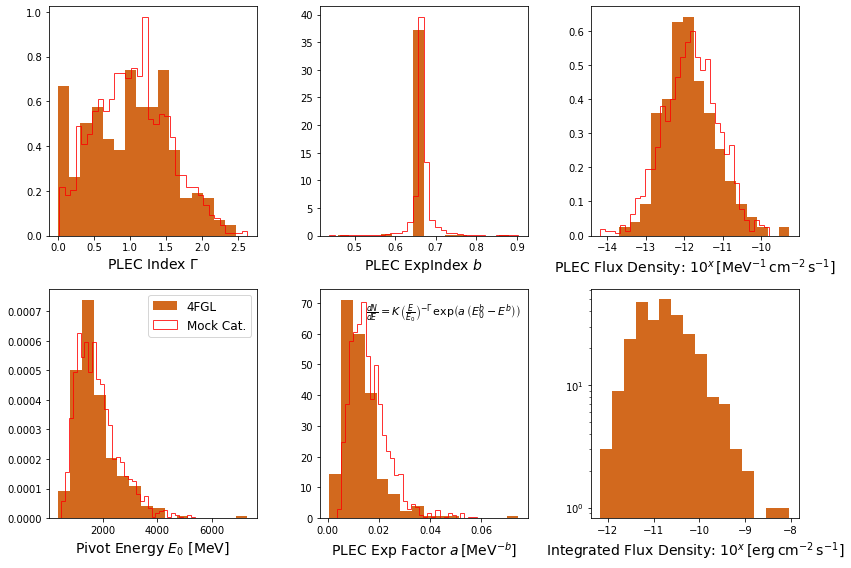

In [165]:
#### Compare the Distribution 
# plt and compare distributions 


PLEC_df_bins = int(np.sqrt(len(v22LP_df_psrs)))

fig = plt.figure(figsize=(12, 8))

fig.add_subplot(231)
plt.hist(v22LP_df_psrs['PLEC_Index'], density=True, bins=PLEC_df_bins, color='chocolate', label='4FGL')
plt.hist(PLECIndex_mock_distf, bins=int(np.sqrt(PLEC_df_mock_cat_bins)), density=True, histtype='stepfilled', 
         edgecolor='red', fill=False, alpha=0.8, label='Mock Cat.') 
plt.xlabel(r'PLEC Index $\Gamma$', fontsize=14)


fig.add_subplot(232)
plt.hist(v22LP_df_psrs['PLEC_ExpIndex'], density=True, bins=PLEC_df_bins, color='chocolate', label='4FGL')
plt.hist(PLECExp_b_mock_dist3f, bins=int(np.sqrt(PLEC_df_mock_cat_bins)), density=True, histtype='stepfilled', 
         edgecolor='red', fill=False, alpha=0.8, label='Mock Cat.')
plt.xlabel(r'PLEC ExpIndex $b$', fontsize=14)


fig.add_subplot(233)
plt.hist(np.log10(v22LP_df_psrs['PLEC_FDensity']), bins=PLEC_df_bins, density=True, color='chocolate')
plt.hist(np.log10(PLECFden_mock_dist1), bins=int(np.sqrt(PLEC_df_mock_cat_bins)), density=True, 
        histtype='stepfilled', edgecolor='red', fill = False, alpha=0.8)
plt.xlabel(r'PLEC Flux Density: $10^{x}\, [\mathrm{MeV}^{-1}\, \mathrm{cm}^{-2}\, \mathrm{s}^{-1}] $', 
           fontsize=14)

fig.add_subplot(234)
plt.hist(v22LP_df_psrs['Piv_En'], bins=PLEC_df_bins, density=True, color='chocolate', label='4FGL')
plt.hist(PLECPivEn_mock_dist3, density=True, bins=int(np.sqrt(PLEC_df_mock_cat_bins)), edgecolor='red', 
         histtype='stepfilled', fill=False, alpha=0.8, label='Mock Cat.')
plt.legend(fontsize=12)

plt.xlabel(r'Pivot Energy $E_0$ [MeV]', fontsize=14)

fig.add_subplot(235)
plt.hist(v22LP_df_psrs['PLEC_ExpFactor'], bins=PLEC_df_bins, density=True, color='chocolate')
plt.hist(PLECExp_a_mock_dist3, density=True, bins=int(np.sqrt(PLEC_df_mock_cat_bins)), edgecolor='red', 
         histtype='stepfilled', fill=False, alpha=0.8)
plt.text(0.015, 66, 
         r'$\frac{dN}{dE} = K\, \left(\frac{E}{E_0}\right)^{-\Gamma}\, \mathrm{exp} \left( a\, \left(E_0^b - E^b \right) \right) $', 
        fontsize=11)

plt.xlabel(r'PLEC Exp Factor $a \, [\mathrm{MeV}^{-b}]$', fontsize=14)

fig.add_subplot(236)
plt.hist(np.log10(v22LP_df_psrs['En_flux_100']), bins=PLEC_df_bins, density=False, color='chocolate')
plt.xlabel(r'Integrated Flux Density: $10^{x}\, [\mathrm{erg}\, \mathrm{cm}^{-2}\, \mathrm{s}^{-1}]$', 
           fontsize=14)
plt.yscale('log')

plt.tight_layout()
# plt.savefig('/content/drive/My Drive/Colab Notebooks/fermi-lat/PLEC_mock_dist.png', dpi=300)
# plt.savefig('/content/drive/My Drive/Colab Notebooks/fermi-lat/PLEC_mock_dist.eps')

max and min of GLAT for PSRs;  74.62674713134766 -68.07344818115234
<class 'pandas.core.series.Series'>
(271, 1)
number of psrs within 5 deg of LATs:  129


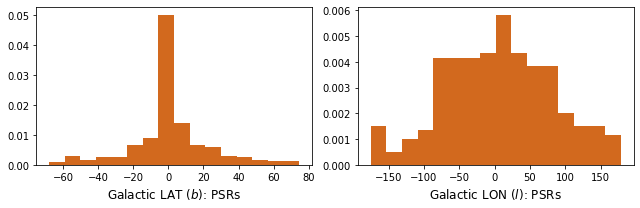

In [147]:
fig = plt.figure(figsize=(9, 3)) 
fig.add_subplot(121)

plt.hist(v22LP_df_psrs['GLAT'], bins=PLEC_df_bins, color='chocolate', density=True)
plt.xlabel(r'Galactic LAT $(b)$: PSRs', fontsize=12)
print ('max and min of GLAT for PSRs; ', v22LP_df_psrs['GLAT'].max(), v22LP_df_psrs['GLAT'].min())

print (type(v22LP_df_psrs['GLON']))

psr_GLON_arr = v22LP_df_psrs[['GLON']].to_numpy()
psr_GLAT_arr = v22LP_df_psrs[['GLAT']].to_numpy()
print (psr_GLON_arr.shape)
psr_GLON_arr_where = np.where(psr_GLON_arr <= 180., psr_GLON_arr, psr_GLON_arr-360.)
# psrs_GLON_where = 

fig.add_subplot(122)
plt.hist(psr_GLON_arr_where, bins=PLEC_df_bins, color='chocolate', density=True)
plt.xlabel(r'Galactic LON $(l)$: PSRs', fontsize=12)

print ('number of psrs within 5 deg of LATs: ', np.count_nonzero((psr_GLAT_arr < 5.) & (psr_GLAT_arr>-5.)) ) 

plt.tight_layout()
# plt.savefig('/content/drive/My Drive/Colab Notebooks/fermi-lat/psr_lat-lon.png', dpi=200)
# plt.savefig('/content/drive/My Drive/Colab Notebooks/fermi-lat/psr_lat-lon.eps')

bin counts:  [0.00082748 0.00289617 0.00165495 0.00248243 0.00248243 0.00661982
 0.00910225 0.05006238 0.01406712 0.00661982 0.00579234 0.00289617
 0.00248243 0.00165495 0.00124122 0.00124122]
bins:  [-68.07345   -59.154686  -50.235924  -41.31716   -32.3984    -23.479637
 -14.560875   -5.6421127   3.2766495  12.195412   21.114174   30.032936
  38.9517     47.87046    56.789223   65.707985   74.62675  ]
check fitted params 1st and 2nd gaussian :  [ 4.41293093e-02 -2.12965967e-01  4.14321227e+00  7.18016218e-03
  2.43846757e+00  2.92034692e+01] [ 0.04412931 -0.21296597  4.14321227] [7.18016218e-03 2.43846757e+00 2.92034692e+01]
0.8045258869166522 1.100386656635062
bin counts LON:  [0.00149883 0.00049961 0.00099922 0.00133229 0.00416342 0.00416342
 0.00416342 0.00432995 0.00582878 0.00432995 0.00383034 0.00383034
 0.00199844 0.00149883 0.00149883 0.00116576]
bins LON:  [-175.44109   -153.28358   -131.12608   -108.968575   -86.81107
  -64.65357    -42.496067   -20.338564     1.8189392   23

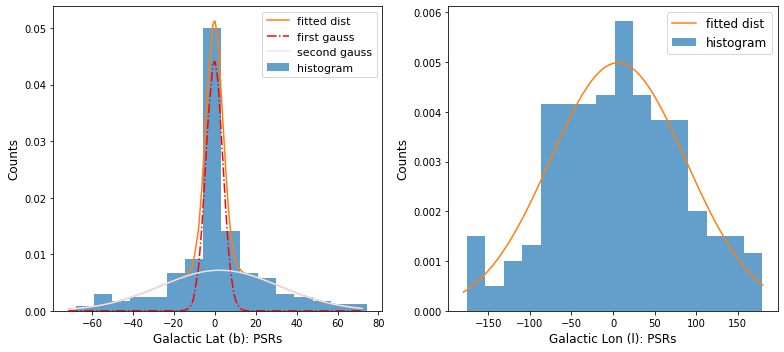

In [148]:
pleclatcoord = sorted(np.random.uniform(-72, 72, 300)) # from uniform but sorted (alternative np.linspace)

fig = plt.figure(figsize=(11, 5))

fig.add_subplot(121)


def gauss2mix(x, *p):
    A1, mu1, sigma1, A2, mu2, sigma2 = p
    return A1*np.exp(-(x-mu1)**2/(2.*sigma1**2)) + A2*np.exp(-(x-mu2)**2/(2.*sigma2**2))


nLAT, binsLAT, _ = plt.hist(v22LP_df_psrs['GLAT'], bins=PLEC_df_bins, label='histogram', alpha=0.7, 
                            density=True)

# plt.clf()

bin_centerPLECLAT = (binsLAT[:-1] + binsLAT[1:])/2

print ('bin counts: ', nLAT)
print ('bins: ', binsLAT)

p0lat = [5e-2, 0, 2, 0.01, 0, 17]
params, params_cov = curve_fit(gauss2mix, bin_centerPLECLAT, nLAT, p0=p0lat)

print ('check fitted params 1st and 2nd gaussian : ', params, params[0:3], params[3:])

def firstgauss(x, p1):
    a1, mu1, sigma1 = p1
    return a1*np.exp(-(x-mu1)**2/(2.*sigma1**2))
def secondgauss(x, p2):
    a2, mu2, sigma2 = p2
    return a2*np.exp(-(x-mu2)**2/(2.*sigma2**2))

# possible_hist_lat = [i*j for i, j in zip(pleclatcoord, his_fitPLECLAT)]

# ### get the fitted curve 
his_fitPLECLAT = gauss2mix(pleclatcoord, *params)
first_hist = firstgauss(pleclatcoord, params[0:3])
second_hist = secondgauss(pleclatcoord, params[3:])

print (sum(first_hist), sum(second_hist))


# print ('length of generated data and max, min', len(his_fitPLECLAT), np.max(his_fitPLECLAT), 
#       np.min(his_fitPLECLAT))

# plt.plot(bin_centerPLECLAT, n, label='true dist')
plt.plot(pleclatcoord, his_fitPLECLAT, label='fitted dist')
plt.plot(pleclatcoord, first_hist, color='red', linestyle = '-.', label='first gauss')
plt.plot(pleclatcoord, second_hist, color='lavender', label='second gauss')

# plt.bar(pleclatcoord, height=his_fitPLECLAT, color='lime')
plt.xlabel('Galactic Lat (b): PSRs', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.legend(fontsize=11, loc='best')


plecloncoord = sorted(np.random.uniform(-180, 180, 300))

fig.add_subplot(122)
nLON, binsLON, _ = plt.hist(psr_GLON_arr_where, bins=PLEC_df_bins, label='histogram', alpha=0.7, 
                            density=True)


bin_centerPLECLON = (binsLON[:-1] + binsLON[1:])/2


print ('bin counts LON: ', nLON)
print ('bins LON: ', binsLON)

def gaussoffsetLON(x, *p):
    A1, mu1, sigma1 = p
    g1 = A1*np.exp(-(x-mu1)**2/(2.*sigma1**2)) 
    return g1 

p0lon = [2e-2, 0, 70]

paramsLON, params_covLON = curve_fit(gaussoffsetLON, bin_centerPLECLON, nLON, p0=p0lon)
print ('check fitted params from gaussian, LON dist: ', paramsLON[0:3])


def firstgaussoffset(x, p1):
    a1, mu1, sigma1 = p1
    return a1*np.exp(-(x-mu1)**2/(2.*sigma1**2))


his_fitPLECLON = gaussoffsetLON(plecloncoord, *paramsLON)

plt.plot(plecloncoord, his_fitPLECLON, label='fitted dist')

plt.xlabel('Galactic Lon (l): PSRs', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.legend(fontsize=12, loc='best')

plt.tight_layout()
# plt.savefig('/content/drive/My Drive/Colab Notebooks/fermi-lat/psr_mock_lat_lon.png', dpi=200)
# plt.savefig('/content/drive/My Drive/Colab Notebooks/fermi-lat/psr_mock_lat_lon.eps')

check min and max of LAT hist:  76.08781555272492 -68.11108072732695
check min and max of LAT hist after selection:  76.08781555272492 -68.11108072732695
selected number of LATs:  1500
check few values:  [-3.501521   -0.38269629 -1.50002832]
mock_LON cat num:  1100


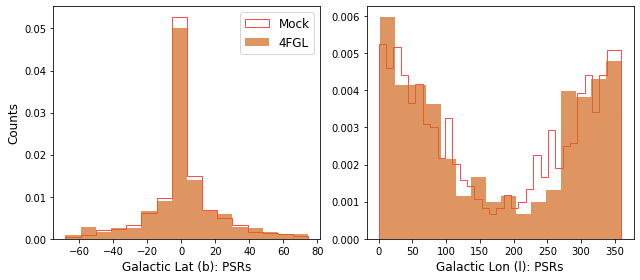

In [150]:
fig = plt.figure(figsize=(9, 4))

fig.add_subplot(121)
possible_PSR_lat1 = np.random.normal(-0.5,  3.56443164, 800)
# possible_PSR_lat1_selected = random.sample(possible_PSR_lat1.tolist(), 200)
possible_PSR_lat1_selected = np.random.choice(possible_PSR_lat1, 750)
# print (possible_PSR_lat1)
# possible_PSR_lat1_selected = np.random.choice(possib)
# plt.hist(possible_PSR_lat1, bins=binsLAT, density=True, color='r', alpha=0.7)
possible_PSR_lat2 = np.random.normal(2.16, 2.68265452e+01, 800)
# possible_PSR_lat2_selected = random.sample(possible_PSR_lat2.tolist(), 200)
possible_PSR_lat2_selected = np.random.choice(possible_PSR_lat2, 750)
# plt.hist(possible_PSR_lat2, bins=binsLAT, density=True, alpha=0.6)

total_hist = (possible_PSR_lat1) + (possible_PSR_lat2)
total_histLAT1 = np.concatenate((possible_PSR_lat1_selected, possible_PSR_lat2_selected))
print ('check min and max of LAT hist: ', max(total_histLAT1), min(total_histLAT1))
total_histLAT1f = total_histLAT1[(total_histLAT1>-80.) & (total_histLAT1<80.)]
print ('check min and max of LAT hist after selection: ', max(total_histLAT1f), min(total_histLAT1f))
print ('selected number of LATs: ', len(total_histLAT1f))

# draw = np.random.choice(total_hist, 290, p=(his_fitPLECLAT*his_fitPLECLATfac))
# draw = random.sample(total_hist.tolist(), 200)

plt.hist(total_histLAT1f, bins=binsLAT, density=True, histtype='stepfilled', edgecolor='red', alpha=0.7, 
         fill=False, label='Mock')

plt.hist(v22LP_df_psrs['GLAT'], bins=PLEC_df_bins, density=True, color='chocolate', 
         alpha=0.7, label='4FGL')

plt.legend(fontsize=12)

plt.xlabel('Galactic Lat (b): PSRs', fontsize=12)
plt.ylabel('Counts', fontsize=12)
print ('check few values: ', total_histLAT1[0:3])


fig.add_subplot(122)

mock_num = 1100
def pleclon(locL, scaleL, num):
  possible_PSR_lon1 = np.random.normal(locL, scaleL, size=mock_num)
  possible_psr_GLON_where = np.where(possible_PSR_lon1 > 0., possible_PSR_lon1, possible_PSR_lon1+360.)
  possible_selected_GLON = possible_psr_GLON_where[(possible_psr_GLON_where>0.) & (possible_psr_GLON_where<360.)]
  return possible_selected_GLON

possible_final_mock_PLEC_LON = pleclon(paramsLON[1], paramsLON[2], mock_num)


plt.hist(possible_final_mock_PLEC_LON, bins=int(np.sqrt(len(possible_final_mock_PLEC_LON))), 
         density=True, histtype='stepfilled', fill=False, 
         edgecolor='red', alpha=0.7, label='Mock')
plt.hist(v22LP_df_psrs['GLON'], bins=PLEC_df_bins, density=True, color='chocolate', 
         alpha=0.7, label='4FGL')
plt.xlabel('Galactic Lon (l): PSRs', fontsize=12)

plt.tight_layout()
# plt.savefig('/content/drive/My Drive/Colab Notebooks/fermi-lat/psr_mock_lat_lon_cut.png', dpi=200)
print ('mock_LON cat num: ', len(possible_final_mock_PLEC_LON))

PLEC parametrization : 

$\frac{dN}{dE} = K\, \left(\frac{E}{E_0}\right)^{-\Gamma} \text{exp} (a(E^b_0 - E^b))$

In [151]:
### Integration for PLEC parametrization  

def IntegratePLEC(N, E1, E2, PivEn, fD, 
                 gamma, a, b):
    value = 0.
    value1 = 0. 
    for i in range(1, N+1):
        En1 = E1 + ( (i-1/2)* ( (E2-E1)/ N ) )
        x = En1 * fD * ((En1/PivEn)**(-gamma)) * math.exp(a * (PivEn**b - En1**b))
        value +=x
    value1 = ( (E2-E1)/N ) * value
    return value1

5 50.0
minimum bin boundary:  -12.166801 -11.908082
shape of selected bins:  (4,)
selected bins:  [-11.649363 -11.390644 -11.131925 -10.873205]
check extended bins psr list:  [-12.425521, -12.166801, -11.908082, -11.649363, -11.390644, -11.131925, -10.873205]
check fit values: coeff and intercept:  0.31173313 5.0834904
with 1 sigma std values:  [ 36.527416  36.9214    38.90491   44.419285  56.403595  77.60383
 111.308136]
with 2 sigma std values: [ 82.26103  69.80086  64.36684  69.68591  93.31778 146.71196 250.66963]
original values:  [ 3.  9. 24. 48. 34. 50.]
[36.52741769607746, 36.921398837905755, 38.904912610186656, 44.41928501245698, 56.403593273692685, 77.60383088749855, 111.30813571564468, 37.0, 26.0, 18.0, 8.0, 7.0, 3.0, 2.0, 0.0, 1.0, 1.0]
17 16
[-12.166801452636719, -11.908082008361816, -11.649362564086914, -11.390644073486328, -11.131924629211426, -10.873205184936523, -10.614486694335938, -10.355767250061035, -10.097047805786133, -9.83832836151123, -9.579608917236328, -9.3208

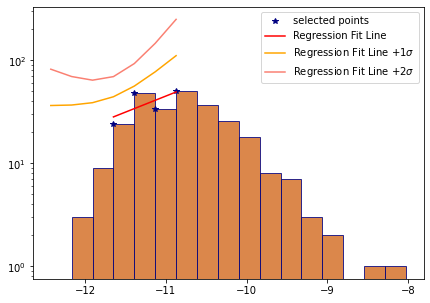

In [152]:
fig = plt.figure(figsize=(7, 5))
ax1 = fig.add_subplot(111)

E100hist_psr, E100bins_psr,_ = plt.hist(np.log10(v22LP_df_psrs['En_flux_100']), bins=PLEC_df_bins, 
                                density=False, alpha=0.8, edgecolor='navy', color='chocolate')

E100hist_list_psr = E100hist_psr.tolist()

print (np.argmax(E100hist_psr), np.max(E100hist_psr))
print ('minimum bin boundary: ', E100bins_psr[0], E100bins_psr[1])

selected_hist1_psr_fit = E100hist_psr[2:6]
selected_hist1_psr = E100hist_psr[0:6]
selected_hist1_list_psr_fit = [np.log10(k) for k in selected_hist1_psr_fit]


E100bins_psr_list = E100bins_psr.tolist()
selected_bins1_psr_fit = E100bins_psr[2:6] 
selected_bins1_psr = E100bins_psr[0:6]

print ('shape of selected bins: ', selected_bins1_psr_fit.shape)
print ('selected bins: ', selected_bins1_psr_fit)
selected_bins1_list_psr_fit = [i for i in selected_bins1_psr_fit]
selected_bins1_list_psr = [i for i in selected_bins1_psr]
selected_bins1_list_psr_extended = [selected_bins1_list_psr[0]-selected_bins1_list_psr[1] + selected_bins1_list_psr[0]] + selected_bins1_list_psr
print ('check extended bins psr list: ', selected_bins1_list_psr_extended)

ax1.plot(selected_bins1_list_psr_fit, np.power(10, selected_hist1_list_psr_fit), linestyle='None', marker='*', color='navy', 
        label='selected points')
ax1.set_yscale('log')

from sklearn.linear_model import LinearRegression
reg_psr = LinearRegression(fit_intercept=True)
reg_psr.fit(np.reshape(selected_bins1_list_psr_fit, (-1, 1)), selected_hist1_list_psr_fit)

print ('check fit values: coeff and intercept: ', reg_psr.coef_[0], reg_psr.intercept_)

hist_vals_psr_check = [(reg_psr.coef_[0] * i + reg_psr.intercept_) for i in selected_bins1_list_psr_fit]
hist_vals_psr_check_extended = [(reg_psr.coef_[0] * i + reg_psr.intercept_) for i in selected_bins1_list_psr_extended]
selected_bins1_psr_extended_arr = np.array(selected_bins1_list_psr_extended)

y_err1sig_psr = selected_bins1_psr_extended_arr.std() * np.sqrt(1/len(selected_bins1_psr_extended_arr) + (selected_bins1_psr_extended_arr - selected_bins1_psr_extended_arr.mean())**2 / np.sum((selected_bins1_psr_extended_arr - selected_bins1_psr_extended_arr.mean())**2))
y_err2sig_psr = (2*selected_bins1_psr_extended_arr.std()) * np.sqrt(1/len(selected_bins1_psr_extended_arr) + (selected_bins1_psr_extended_arr - selected_bins1_psr_extended_arr.mean())**2 / np.sum((selected_bins1_psr_extended_arr - selected_bins1_psr_extended_arr.mean())**2))


plt.plot(selected_bins1_list_psr_fit, np.power(10, hist_vals_psr_check), color='red', label='Regression Fit Line')
# # plt.plot(selected_bins1_list_bll, np.power(10, hist_vals_bll_check), color='orange', label='Regression Fit Line (c)')

check_area1sigl_psr = hist_vals_psr_check_extended - y_err1sig_psr
check_area1sigh_psr = hist_vals_psr_check_extended + y_err1sig_psr
check_area2sigh_psr = hist_vals_psr_check_extended + y_err2sig_psr

# # ax1.fill_between(selected_bins1_list_bll, np.power(10, check_area1), np.power(10, check_area2), alpha=0.2)

plt.plot(selected_bins1_list_psr_extended, np.power(10, check_area1sigh_psr), color='orange', label=r'Regression Fit Line $+ 1 \sigma$')
plt.plot(selected_bins1_list_psr_extended, np.power(10, check_area2sigh_psr), color='salmon', label=r'Regression Fit Line $+ 2 \sigma$')

print ('with 1 sigma std values: ', np.power(10, check_area1sigh_psr))
print ('with 2 sigma std values:', np.power(10, check_area2sigh_psr))
print ('original values: ', E100hist_psr[0:6])



check_area1sigh_psr_list = check_area1sigh_psr.tolist()
check_area1sigh_psr_list_pow = [10**i for i in check_area1sigh_psr_list] 

E100hist_list_psr_high = E100hist_list_psr[6:]
E100bins_psr_list_high = E100bins_psr_list[6:]


E100hist_list_psr_combined = check_area1sigh_psr_list_pow + E100hist_list_psr_high
E100bins_psr_list_combined = selected_bins1_list_psr_extended + E100bins_psr_list_high

plt.legend(fontsize=10)

print (E100hist_list_psr_combined)
print (len(E100hist_list_psr_combined), len(E100hist_list_psr))


print (E100bins_psr_list)
print ('\n')
print (E100bins_psr_list_combined)

check some values of the noise_N:  0.9748329689344544 0.7274812975136398 0.8821823807635097


(array([2.80774554, 1.40387277, 1.40387277, 2.10580916, 0.        ,
        2.10580916, 2.10580916]),
 array([0.70662233, 0.79042413, 0.87422592, 0.95802772, 1.04182951,
        1.12563131, 1.20943311, 1.2932349 ]),
 <a list of 7 Patch objects>)

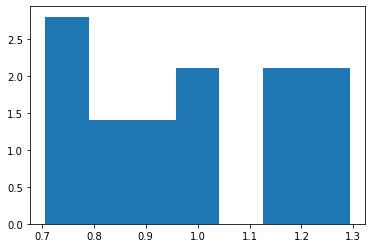

In [153]:
np.random.seed(35) # change seed for different run
noise_N_PLEC = np.random.uniform(0.7, 1.3, PLEC_df_bins)
noise_N_PLEC_combined = np.random.uniform(0.7, 1.3, PLEC_df_bins+1)    

print ('check some values of the noise_N: ', noise_N_PLEC[0], noise_N_PLEC[11], noise_N_PLEC[14])  
plt.hist(noise_N_PLEC_combined, density=True, bins=7)

In [166]:
#### randomly select parameters from the distribution [PLEC]

rand_PLEC_f_density = random.sample(PLECFden_mock_dist1.tolist(), 1050) 
rand_PLEC_index = random.sample(PLECIndex_mock_distf.tolist(), 1050)
rand_PLEC_Exp_b = random.sample(PLECExp_b_mock_dist3f.tolist(), 1050)
rand_PLEC_Exp_a = random.sample(PLECExp_a_mock_dist3.tolist(), 1050)
rand_PLEC_PivEn = random.sample(PLECPivEn_mock_dist3.tolist(), 1050)

rand_GLAT_PLEC = random.sample(total_histLAT1f.tolist(), 1050)
rand_GLON_PLEC = random.sample(possible_final_mock_PLEC_LON.tolist(), 1050)

In [167]:
# PLEC parametriation luminosity

def simple_lum_plec(n, PLEC_i, PLEC_a, PLEC_b, PLEC_FluxD, PLEC_PivEn, PLEC_lat, PLEC_lon):
    result_list = []
#     comp_list = [0] * len(E100hist_list)
    f_result_list = []
    c_plec_i   = [] # PLEC index
    c_plec_Expa   = [] # PLEC_Exp_a
    c_plec_Expb   = [] # PLEC_Exp_b
    c_plec_FD   = [] # plec fd
    c_plec_PEn = [] # pivot  energy
    c_GLAT_plec   = [] # lat
    c_GLON_plec   = [] # long

    for x in range(700):
        PLEC_index = PLEC_i[x]
        PLEC_Ea   = PLEC_a[x]
        PLEC_Eb   = PLEC_b[x]
        PLEC_FD   = PLEC_FluxD[x]
        PLEC_PEn  = PLEC_PivEn[x]
        PLEC_glat = PLEC_lat[x]
        PLEC_glon  = PLEC_lon[x]

        
        
        result_psr   = IntegratePLEC(n, 100, 100e3, PivEn = PLEC_PEn, fD = PLEC_FD, 
                 gamma = PLEC_index, a = PLEC_Ea, b = PLEC_Eb)
        # unit here is MeV cm^-2 s^-1 :
        result_psr   = result_psr * 1.6e-6 
        # unit here is Erg cm^-2 s^-1:
        if result_psr>=10**E100bins_psr_list_combined[0] and result_psr < 10**(E100bins_psr_list_combined[-1]):
            result_list.append(result_psr)

            c_plec_i.append(PLEC_index)
            c_plec_Expa.append(PLEC_Ea)
            c_plec_FD.append(PLEC_FD)
            c_plec_PEn.append(PLEC_PEn)
            c_plec_Expb.append(PLEC_Eb)
            c_GLAT_plec.append(PLEC_glat)
            c_GLON_plec.append(PLEC_glon)
            
            mockE100hist_plec, bins_plec = np.histogram(np.log10(result_list), bins=E100bins_psr_list_combined, 
                                                        density=False)
            mockE100hist_plec_list = mockE100hist_plec.tolist()
#         for Ebins in E100bins_notlast:
            for x1, x2, x3 in zip(mockE100hist_plec_list, E100hist_list_psr_combined, noise_N_PLEC_combined): 
                if (x1*x3) > x2:
                    print ('!!! mock higher than the real !!!', x1, x2)
                    result_list.pop()
#                     print ('result_list len: ', len(result_list))
                    f_result_list = result_list[:]
                    c_plec_i.pop()
                    c_plec_Expa.pop()
                    c_plec_Expb.pop()
                    c_plec_FD.pop()
                    c_plec_PEn.pop()
                    c_GLAT_plec.pop()
                    c_GLON_plec.pop()
        
                else:
                    continue
                    print (':) :) what is happening here :) :)')
                
#                 result_list.pop()    
    return f_result_list, c_plec_i, c_plec_Expa, c_plec_Expb, c_plec_FD, c_plec_PEn, c_GLAT_plec, c_GLON_plec

In [168]:
f_result_list_pl, c_pl_i, c_pl_Expa, c_pl_Expb, c_pl_FD, c_pl_PEn, c_GLAT_pl, c_GLON_pl = simple_lum_plec(1020, 
                                                                                                          rand_PLEC_index, 
                                                                                                          rand_PLEC_Exp_a, 
                                                                                                          rand_PLEC_Exp_b, 
                                                                                                          rand_PLEC_f_density, 
                                                                                                          rand_PLEC_PivEn, 
                                                                                                          rand_GLAT_PLEC, 
                                                                                                          rand_GLON_PLEC)
print ('number of psrs: ', len(c_pl_i))

!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 3 3.0
!!! mock higher than the real !!! 3 3.0
!!! mock higher than the real !!! 3 3.0
!!! mock higher than the real !!! 3 3.0
!!! mock higher than the real !!! 3 3.0
!!! mock higher than the real !!! 1 1.0
!!! mock higher than the real !!! 6 7.0
!!! mock higher than the real !!! 7 8.0
!!! mock higher than the real !!! 7 8.0
!!! mock higher than the real !!! 6 7.0
!!! mock higher than the real !!! 1 1.0
!!! mock higher than the real !!! 1 0.0
!!! mock higher than the real !!! 6 7.0
!!! mock higher than the real !!! 3 3.0
!!! mock higher than the real !!! 6 7.0
!!! mock higher than the real !!! 6 7.0
!!! mock higher than the real !!! 7 8.0
!!! mock higher than the real !!! 7 8.0
!!! mock higher than the real !!! 7 8.0
!!! mock higher than the real !!! 7 8.0
!!! mock higher than the real !!! 1 1.0
!!! mock higher than the real !!! 3 3.0
!!! mock higher than the real !!! 6 7.0
!!! mock higher than the real !!! 3 3.0


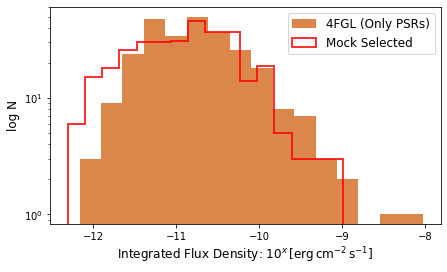

In [157]:
fig = plt.figure(figsize=(7, 4))

plt.hist(np.log10(v22LP_df_psrs['En_flux_100']), bins=PLEC_df_bins, density=False, 
         label='4FGL (Only PSRs)', color='chocolate', alpha=0.8)

plt.hist(np.log10(f_result_list_pl), bins=PLEC_df_bins, density=False, 
         histtype='stepfilled', fill=False, alpha=0.8, edgecolor='red', label='Mock Selected', 
        linewidth=2)




# plt.text(-10.6, 46, 'Number of sources in Mock: %d'%( len(final_result_list) ) )
# plt.text()
plt.yscale('log')
plt.ylabel('log N', fontsize=12)

plt.xlabel(r'Integrated Flux Density: $10^{x}\, [\mathrm{erg}\, \mathrm{cm}^{-2}\, \mathrm{s}^{-1}]$', 
           fontsize=12)

plt.legend(fontsize=12)

In [158]:
psr_ra_cord_list = []
psr_dec_cord_list = []

mock_source_num_psr = [i for i in range(len(c_pl_i))]



for plo, pla in zip(c_GLON_pl, c_GLAT_pl):
    c_icrs1_pl  = SkyCoord(l=plo*u.degree, b=pla*u.degree, frame='galactic')
    psr_ra_cord_list.append(c_icrs1_pl.fk5.ra.degree)
    psr_dec_cord_list.append(c_icrs1_pl.fk5.dec.degree)

In [ ]:
mock_xmlfile_psr = open('/content/drive/My Drive/Colab Notebooks/mock_4FGL_psr1.xml', 'w')
mock_xmlfile_psr.write('<source_library title="source library">\n')
for fac, ga, Ea, Eb, PEn, ra, dec, num in zip(c_pl_FD, c_pl_i, c_pl_Expa, c_pl_Expb, c_pl_PEn,
                                         psr_ra_cord_list, psr_dec_cord_list, mock_source_num_psr):
    
    mock_xmlfile_psr.write('<source name="PLSuperExpCutoff2_source{0}" type="PointSource">\n'.format(num))
    mock_xmlfile_psr.write('<!-- point source units are cm^-2 s^-1 MeV^-1 -->\n')
    mock_xmlfile_psr.write('<spectrum type="PLSuperExpCutoff2">\n')
    mock_xmlfile_psr.write(
        '<parameter free="1" max="{0}" min="{1}" name="Prefactor" scale="1.0" value="{2}"/>\n'.format(max(c_pl_FD), min(c_pl_FD), fac))
    mock_xmlfile_psr.write(
        '<parameter free="1" max="{0}" min="{1}" name="Index1" scale="1.0" value="{2}"/>\n'.format(max(c_pl_i), min(c_pl_i), ga))
    mock_xmlfile_psr.write(
        '<parameter free="0" max="{0}" min="{1}" name="Scale" scale="1" value="{2}"/>\n'.format(max(c_pl_PEn), min(c_pl_PEn), PEn))
    mock_xmlfile_psr.write(
        '<parameter free="1" max="{0}" min="{1}" name="Expfactor" scale="1.0" value="{2}"/>\n'.format(max(c_pl_Expa), min(c_pl_Expa), Ea))
    mock_xmlfile_psr.write(
        '<parameter free="0" max="{0}" min="{1}" name="Index2" scale="1.0" value="{2}"/>\n'.format(max(c_pl_Expb), min(c_pl_Expb), Eb))
    mock_xmlfile_psr.write('</spectrum>\n')
    mock_xmlfile_psr.write('<spatialModel type="SkyDirFunction">\n')
    mock_xmlfile_psr.write(
        '<parameter free="0" max="360." min="0." name="RA" scale="1.0" value="{0}"/>\n'.format(ra))
    mock_xmlfile_psr.write(
        '<parameter free="0" max="90." min="-90." name="DEC" scale="1.0" value="{0}"/>\n'.format(dec))
    mock_xmlfile_psr.write('</spatialModel>\n')
    mock_xmlfile_psr.write('</source>\n')
    
mock_xmlfile_psr.write('</source_library>')    
mock_xmlfile_psr.close()


#### PWN/SPP LAT/LON

max and min of GLAT for PWN;  14.637993812561035 -32.79877853393555
<class 'pandas.core.series.Series'>
(156, 1)
number of spp/pwns within 5 deg of LATs:  136
max and min of GLAT for PSRs;  74.62674713134766 -68.07344818115234
<class 'pandas.core.series.Series'>
(271, 1)
number of psrs within 5 deg of LATs:  129


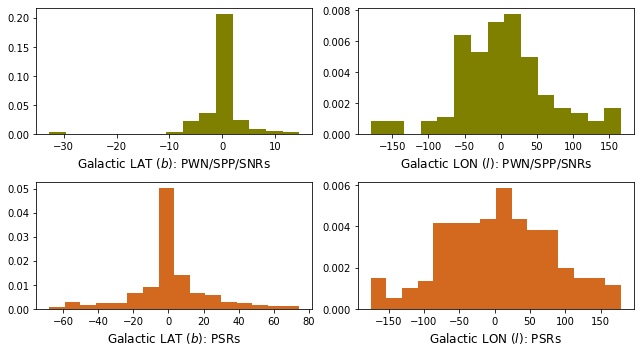

In [169]:
fig = plt.figure(figsize=(9, 5)) 
fig.add_subplot(221)

plt.hist(v22LP_df_pwn_spp_snr['GLAT'], bins=AGNs_spp_pwn_snr_bins, color='olive', density=True)
plt.xlabel(r'Galactic LAT $(b)$: PWN/SPP/SNRs', fontsize=12)
print ('max and min of GLAT for PWN; ', v22LP_df_pwn_spp_snr['GLAT'].max(), v22LP_df_pwn_spp_snr['GLAT'].min())

print (type(v22LP_df_pwn_spp_snr['GLON']))

pwn_spp_GLON_arr = v22LP_df_pwn_spp_snr[['GLON']].to_numpy()
pwn_spp_GLAT_arr = v22LP_df_pwn_spp_snr[['GLAT']].to_numpy()
print (pwn_spp_GLON_arr.shape)
pwn_spp_GLON_arr_where = np.where(pwn_spp_GLON_arr <= 180., pwn_spp_GLON_arr, pwn_spp_GLON_arr-360.)
# psrs_GLON_where = 

fig.add_subplot(222)
plt.hist(pwn_spp_GLON_arr_where, bins=AGNs_spp_pwn_snr_bins, color='olive', density=True)
plt.xlabel(r'Galactic LON $(l)$: PWN/SPP/SNRs', fontsize=12)

print ('number of spp/pwns within 5 deg of LATs: ', np.count_nonzero((pwn_spp_GLAT_arr < 5.) & (pwn_spp_GLAT_arr>-5.)) ) 

fig.add_subplot(223)
plt.hist(v22LP_df_psrs['GLAT'], bins=PLEC_df_bins, color='chocolate', density=True)
plt.xlabel(r'Galactic LAT $(b)$: PSRs', fontsize=12)
print ('max and min of GLAT for PSRs; ', v22LP_df_psrs['GLAT'].max(), v22LP_df_psrs['GLAT'].min())

print (type(v22LP_df_psrs['GLON']))

psr_GLON_arr = v22LP_df_psrs[['GLON']].to_numpy()
psr_GLAT_arr = v22LP_df_psrs[['GLAT']].to_numpy()
print (psr_GLON_arr.shape)
psr_GLON_arr_where = np.where(psr_GLON_arr <= 180., psr_GLON_arr, psr_GLON_arr-360.)
# psrs_GLON_where = 

fig.add_subplot(224)
plt.hist(psr_GLON_arr_where, bins=PLEC_df_bins, color='chocolate', density=True)
plt.xlabel(r'Galactic LON $(l)$: PSRs', fontsize=12)

print ('number of psrs within 5 deg of LATs: ', np.count_nonzero((psr_GLAT_arr < 5.) & (psr_GLAT_arr>-5.)) ) 


plt.tight_layout()
# plt.savefig('/content/drive/My Drive/Colab Notebooks/fermi-lat/psr_pwn_spp_lat_lon.png', dpi=200)

check fitted params 1st and 2nd gaussian :  [ 0.17167505  0.31485975  0.41960497  0.04071078 -0.80506244  4.35457506] [0.17167505 0.31485975 0.41960497] [ 0.04071078 -0.80506244  4.35457506]


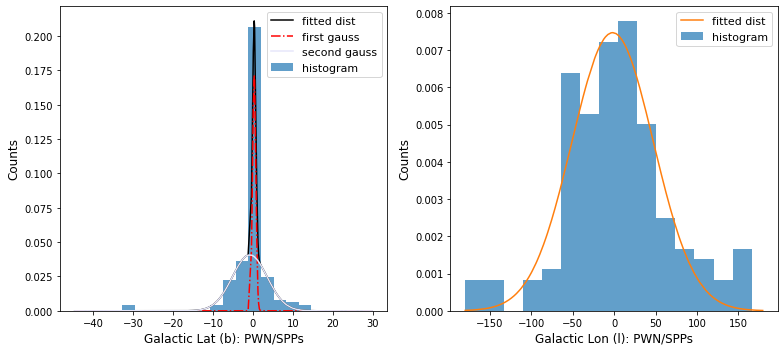

In [170]:
pwn_spp_latcoord = sorted(np.random.uniform(-45, 30, 300)) # from uniform but sorted (alternative np.linspace)

fig = plt.figure(figsize=(11, 5))

fig.add_subplot(121)


def gauss2mix(x, *p):
    A1, mu1, sigma1, A2, mu2, sigma2 = p
    return A1*np.exp(-(x-mu1)**2/(2.*sigma1**2)) + A2*np.exp(-(x-mu2)**2/(2.*sigma2**2))


npwnLAT, pwnbinsLAT, _ = plt.hist(v22LP_df_pwn_spp_snr['GLAT'], bins=AGNs_spp_pwn_snr_bins, 
                                  label='histogram', alpha=0.7, density=True)

# plt.clf()

bin_centerpwnLAT = (pwnbinsLAT[:-1] + pwnbinsLAT[1:])/2

# print ('bin counts: ', npwnLAT)
# print ('bins: ', pwnbinsLAT)

p0lat_pwn = [0.22, -0.05, 3, 0.04, -0.05, 15]
params_pwn, params_cov_pwn = curve_fit(gauss2mix, bin_centerpwnLAT, npwnLAT, p0=p0lat_pwn)

print ('check fitted params 1st and 2nd gaussian : ', params_pwn, params_pwn[0:3], 
       params_pwn[3:])

def firstgauss(x, p1):
    a1, mu1, sigma1 = p1
    return a1*np.exp(-(x-mu1)**2/(2.*sigma1**2))
def secondgauss(x, p2):
    a2, mu2, sigma2 = p2
    return a2*np.exp(-(x-mu2)**2/(2.*sigma2**2))

# possible_hist_lat = [i*j for i, j in zip(pleclatcoord, his_fitPLECLAT)]

# ### get the fitted curve 
his_fitpwnLAT = gauss2mix(pwn_spp_latcoord, *params_pwn)
first_hist_pwn_spp = firstgauss(pwn_spp_latcoord, params_pwn[0:3])
second_hist_pwn_spp = secondgauss(pwn_spp_latcoord, params_pwn[3:])

# print (sum(first_hist_pwn_spp), sum(second_hist_pwn_spp))


# print ('length of generated data and max, min', len(his_fitPLECLAT), np.max(his_fitPLECLAT), 
#       np.min(his_fitPLECLAT))

# plt.plot(bin_centerPLECLAT, n, label='true dist')
plt.plot(pwn_spp_latcoord, his_fitpwnLAT, label='fitted dist', color='black')
plt.plot(pwn_spp_latcoord, first_hist_pwn_spp, color='red', linestyle = '-.', label='first gauss')
plt.plot(pwn_spp_latcoord, second_hist_pwn_spp, color='lavender', label='second gauss')

# plt.bar(pleclatcoord, height=his_fitPLECLAT, color='lime')
plt.xlabel('Galactic Lat (b): PWN/SPPs', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.legend(fontsize=11, loc='best')


pwn_spp_loncoord = sorted(np.random.uniform(-180, 180, 300))

fig.add_subplot(122)
npwnLON, pwnbinsLON, _ = plt.hist(pwn_spp_GLON_arr_where, bins=AGNs_spp_pwn_snr_bins, label='histogram', alpha=0.7, 
                            density=True)


bin_centerpwnLON = (pwnbinsLON[:-1] + pwnbinsLON[1:])/2


# print ('bin counts LON: ', npwnLON)
# print ('bins LON: ', pwnbinsLON)

def gaussoffsetLON(x, *p):
    A1, mu1, sigma1 = p
    g1 = A1*np.exp(-(x-mu1)**2/(2.*sigma1**2)) 
    return g1 

p0lon_pwn = [2e-2, 0, 70]

paramsLON_pwn, params_covLON_pwn = curve_fit(gaussoffsetLON, bin_centerpwnLON, npwnLON, p0=p0lon_pwn)

# print ('check fitted params from gaussian, LON dist: ', paramsLON_pwn[0:3])


def firstgaussoffset(x, p1):
    a1, mu1, sigma1 = p1
    return a1*np.exp(-(x-mu1)**2/(2.*sigma1**2))


his_fitpwnLON = gaussoffsetLON(pwn_spp_loncoord, *paramsLON_pwn)

plt.plot(pwn_spp_loncoord, his_fitpwnLON, label='fitted dist')

plt.xlabel('Galactic Lon (l): PWN/SPPs', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.legend(fontsize=11, loc='best')


plt.tight_layout()
# plt.savefig('/content/drive/My Drive/')

check min and max of LAT hist:  9.928647919054763 -10.894415185126899
check min and max of LAT hist after selection:  9.928647919054763 -10.894415185126899
selected number of LATs:  1300
check few values:  [-0.15179023 -0.10811959  0.27131588]
mock_LON cat num:  900


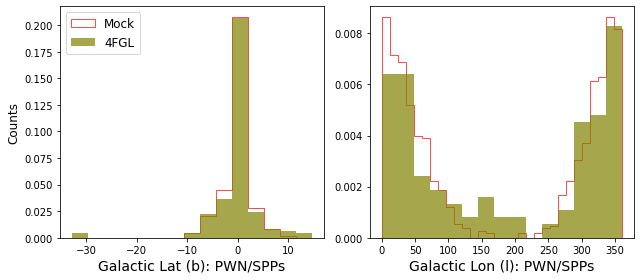

In [171]:
fig = plt.figure(figsize=(9, 4))

fig.add_subplot(121)
possible_pwn_spp_lat1 = np.random.normal(-0.05,  0.49367151, 800)
# possible_PSR_lat1_selected = random.sample(possible_PSR_lat1.tolist(), 200)
possible_pwn_spp_lat1_selected = np.random.choice(possible_pwn_spp_lat1, 650)
# print (possible_PSR_lat1)
# possible_PSR_lat1_selected = np.random.choice(possib)
# plt.hist(possible_PSR_lat1, bins=binsLAT, density=True, color='r', alpha=0.7)
possible_pwn_spp_lat2 = np.random.normal(-0.5, 3.81322625, 800)
# possible_PSR_lat2_selected = random.sample(possible_PSR_lat2.tolist(), 200)
possible_pwn_spp_lat2_selected = np.random.choice(possible_pwn_spp_lat2, 650)
# plt.hist(possible_PSR_lat2, bins=binsLAT, density=True, alpha=0.6)

total_hist_pwn_spp = (possible_pwn_spp_lat1) + (possible_pwn_spp_lat2)
total_histLAT1_pwn_spp = np.concatenate((possible_pwn_spp_lat1_selected, possible_pwn_spp_lat2_selected))
print ('check min and max of LAT hist: ', max(total_histLAT1_pwn_spp), min(total_histLAT1_pwn_spp))
total_histLAT1f_pwn_spp = total_histLAT1_pwn_spp[(total_histLAT1_pwn_spp>-50.) & (total_histLAT1_pwn_spp<30.)]
print ('check min and max of LAT hist after selection: ', max(total_histLAT1f_pwn_spp), min(total_histLAT1f_pwn_spp))
print ('selected number of LATs: ', len(total_histLAT1f_pwn_spp))

# draw = np.random.choice(total_hist, 290, p=(his_fitPLECLAT*his_fitPLECLATfac))
# draw = random.sample(total_hist.tolist(), 200)

plt.hist(total_histLAT1f_pwn_spp, bins=pwnbinsLAT, density=True, histtype='stepfilled', edgecolor='red', alpha=0.7, 
         fill=False, label='Mock')

plt.hist(v22LP_df_pwn_spp_snr['GLAT'], bins=AGNs_spp_pwn_snr_bins, density=True, color='olive', 
         alpha=0.7, label='4FGL')

plt.legend(fontsize=12)

plt.xlabel('Galactic Lat (b): PWN/SPPs', fontsize=14)
plt.ylabel('Counts', fontsize=12)
print ('check few values: ', total_histLAT1f_pwn_spp[0:3])


fig.add_subplot(122)

mock_num = 900
def pwn_spp_lon(locL, scaleL, num):
  possible_pwn_spp_lon1 = np.random.normal(locL, scaleL, size=mock_num)
  possible_pwn_spp_GLON_where = np.where(possible_pwn_spp_lon1 > 0., possible_pwn_spp_lon1, 
                                         possible_pwn_spp_lon1+360.)
  possible_selected_GLON_pwn_spp = possible_pwn_spp_GLON_where[(possible_pwn_spp_GLON_where>0.) & (possible_pwn_spp_GLON_where<360.)]
  return possible_selected_GLON_pwn_spp

possible_final_mock_pwn_spp_LON = pwn_spp_lon(paramsLON_pwn[1], paramsLON_pwn[2], mock_num)


plt.hist(possible_final_mock_pwn_spp_LON, bins=int(np.sqrt(len(possible_final_mock_pwn_spp_LON))), 
         density=True, histtype='stepfilled', fill=False, 
         edgecolor='red', alpha=0.7, label='Mock')
plt.hist(v22LP_df_pwn_spp_snr['GLON'], bins=AGNs_spp_pwn_snr_bins, density=True, color='olive', 
         alpha=0.7, label='4FGL')
plt.xlabel('Galactic Lon (l): PWN/SPPs', fontsize=14)

plt.tight_layout()
# plt.savefig('/content/drive/My Drive/Colab Notebooks/fermi-lat/pwn_spp_mock_lat_lon.png', dpi=200)
# plt.savefig('/content/drive/My Drive/Colab Notebooks/fermi-lat/pwn_spp_mock_lat_lon.eps')

print ('mock_LON cat num: ', len(possible_final_mock_pwn_spp_LON))

### $E_{100} : $ PWN/SPP

4 20.0
minimum bin boundary:  -11.987453 -11.809014
shape of selected bins:  (4,)
selected bins:  [-11.987453 -11.809014 -11.630575 -11.452136]
check extended bins psr list:  [-12.165893, -11.987453, -11.809014, -11.630575, -11.452136]
check fit values: coeff and intercept:  1.7030003 20.542427
with 1 sigma std values:  [ 1.0456302  1.8450528  3.5036924  7.47777   17.175392 ]
with 2 sigma std values: [ 1.6400172  2.536455   4.543398  10.279937  26.938715 ]
original values:  [ 1.  4.  6.  9. 20. 20.]
[1.045630218239471, 1.845052780459164, 3.5036924793565243, 7.477769683984901, 17.17539261422879, 20.0, 20.0, 18.0, 14.0, 15.0, 13.0, 14.0, 12.0, 3.0, 4.0, 3.0]
16 15
[-11.98745346069336, -11.809014320373535, -11.630575180053711, -11.452136039733887, -11.273695945739746, -11.095256805419922, -10.916817665100098, -10.738378524780273, -10.55993938446045, -10.381500244140625, -10.2030611038208, -10.024621963500977, -9.846181869506836, -9.667742729187012, -9.489303588867188, -9.310864448547363]


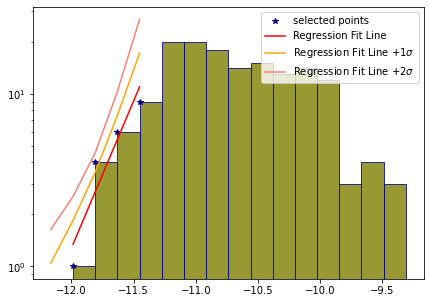

In [172]:
fig = plt.figure(figsize=(7, 5))
ax1 = fig.add_subplot(111)

E100hist_pwn_spp, E100bins_pwn_spp,_ = plt.hist(np.log10(v22LP_df_pwn_spp_snr['En_flux_100']), 
                                                bins=AGNs_spp_pwn_snr_bins, density=False, alpha=0.8, 
                                                edgecolor='navy', color='olive')

E100hist_list_pwn_spp = E100hist_pwn_spp.tolist()

print (np.argmax(E100hist_pwn_spp), np.max(E100hist_pwn_spp))
print ('minimum bin boundary: ', E100bins_pwn_spp[0], E100bins_pwn_spp[1])

selected_hist1_pwn_spp_fit = E100hist_pwn_spp[0:4]
selected_hist1_pwn_spp = E100hist_pwn_spp[0:4]
selected_hist1_list_pwn_spp_fit = [np.log10(k) for k in selected_hist1_pwn_spp_fit]


E100bins_pwn_spp_list = E100bins_pwn_spp.tolist()
selected_bins1_pwn_spp_fit = E100bins_pwn_spp[0:4] 
selected_bins1_pwn_spp = E100bins_pwn_spp[0:4]

print ('shape of selected bins: ', selected_bins1_pwn_spp_fit.shape)
print ('selected bins: ', selected_bins1_pwn_spp_fit)
selected_bins1_list_pwn_spp_fit = [i for i in selected_bins1_pwn_spp_fit]
selected_bins1_list_pwn_spp = [i for i in selected_bins1_pwn_spp]
selected_bins1_list_pwn_spp_extended = [selected_bins1_list_pwn_spp[0]-selected_bins1_list_pwn_spp[1] + selected_bins1_list_pwn_spp[0]] + selected_bins1_list_pwn_spp
print ('check extended bins psr list: ', selected_bins1_list_pwn_spp_extended)

ax1.plot(selected_bins1_list_pwn_spp_fit, np.power(10, selected_hist1_list_pwn_spp_fit), 
         linestyle='None', marker='*', color='navy', 
        label='selected points')
ax1.set_yscale('log')

from sklearn.linear_model import LinearRegression
reg_pwn_spp = LinearRegression(fit_intercept=True)
reg_pwn_spp.fit(np.reshape(selected_bins1_list_pwn_spp_fit, (-1, 1)), selected_hist1_list_pwn_spp_fit)

print ('check fit values: coeff and intercept: ', reg_pwn_spp.coef_[0], reg_pwn_spp.intercept_)

hist_vals_pwn_spp_check = [(reg_pwn_spp.coef_[0] * i + reg_pwn_spp.intercept_) for i in selected_bins1_list_pwn_spp_fit]
hist_vals_pwn_spp_check_extended = [(reg_pwn_spp.coef_[0] * i + reg_pwn_spp.intercept_) for i in selected_bins1_list_pwn_spp_extended]
selected_bins1_pwn_spp_extended_arr = np.array(selected_bins1_list_pwn_spp_extended)

y_err1sig_pwn_spp = selected_bins1_pwn_spp_extended_arr.std() * np.sqrt(1/len(selected_bins1_pwn_spp_extended_arr) + (selected_bins1_pwn_spp_extended_arr - selected_bins1_pwn_spp_extended_arr.mean())**2 / np.sum((selected_bins1_pwn_spp_extended_arr - selected_bins1_pwn_spp_extended_arr.mean())**2))
y_err2sig_pwn_spp = (2*selected_bins1_pwn_spp_extended_arr.std()) * np.sqrt(1/len(selected_bins1_pwn_spp_extended_arr) + (selected_bins1_pwn_spp_extended_arr - selected_bins1_pwn_spp_extended_arr.mean())**2 / np.sum((selected_bins1_pwn_spp_extended_arr - selected_bins1_pwn_spp_extended_arr.mean())**2))


plt.plot(selected_bins1_list_pwn_spp_fit, np.power(10, hist_vals_pwn_spp_check), color='red', label='Regression Fit Line')
# # plt.plot(selected_bins1_list_bll, np.power(10, hist_vals_bll_check), color='orange', label='Regression Fit Line (c)')

check_area1sigl_pwn_spp = hist_vals_pwn_spp_check_extended - y_err1sig_pwn_spp
check_area1sigh_pwn_spp = hist_vals_pwn_spp_check_extended + y_err1sig_pwn_spp
check_area2sigh_pwn_spp = hist_vals_pwn_spp_check_extended + y_err2sig_pwn_spp

# # ax1.fill_between(selected_bins1_list_bll, np.power(10, check_area1), np.power(10, check_area2), alpha=0.2)

plt.plot(selected_bins1_list_pwn_spp_extended, np.power(10, check_area1sigh_pwn_spp), color='orange', label=r'Regression Fit Line $+ 1 \sigma$')
plt.plot(selected_bins1_list_pwn_spp_extended, np.power(10, check_area2sigh_pwn_spp), color='salmon', label=r'Regression Fit Line $+ 2 \sigma$')

print ('with 1 sigma std values: ', np.power(10, check_area1sigh_pwn_spp))
print ('with 2 sigma std values:', np.power(10, check_area2sigh_pwn_spp))
print ('original values: ', E100hist_pwn_spp[0:6])



check_area1sigh_pwn_spp_list = check_area1sigh_pwn_spp.tolist()
check_area1sigh_pwn_spp_list_pow = [10**i for i in check_area1sigh_pwn_spp_list] 

E100hist_list_pwn_spp_high = E100hist_list_pwn_spp[4:]
E100bins_pwn_spp_list_high = E100bins_pwn_spp_list[4:]


E100hist_list_pwn_spp_combined = check_area1sigh_pwn_spp_list_pow + E100hist_list_pwn_spp_high
E100bins_pwn_spp_list_combined = selected_bins1_list_pwn_spp_extended + E100bins_pwn_spp_list_high

plt.legend(fontsize=10)

print (E100hist_list_pwn_spp_combined)
print (len(E100hist_list_pwn_spp_combined), len(E100hist_list_pwn_spp))


print (E100bins_pwn_spp_list)
print ('\n')
print (E100bins_pwn_spp_list_combined)

check some values of the noise_N:  0.9748329689344544 0.7274812975136398 0.8821823807635097


(array([2.98219625, 1.49109812, 1.49109812, 1.49109812, 0.        ,
        2.23664719, 2.23664719]),
 array([0.70662233, 0.79045317, 0.874284  , 0.95811484, 1.04194567,
        1.12577651, 1.20960734, 1.29343817]),
 <a list of 7 Patch objects>)

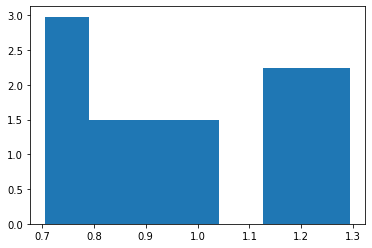

In [173]:
np.random.seed(35) # change seed for different run
noise_N_pwn_spp = np.random.uniform(0.7, 1.3, AGNs_spp_pwn_snr_bins)
noise_N_pwn_spp_combined = np.random.uniform(0.7, 1.3, AGNs_spp_pwn_snr_bins+1)    

print ('check some values of the noise_N: ', noise_N_pwn_spp[0], noise_N_pwn_spp[11], noise_N_pwn_spp[14])  
plt.hist(noise_N_pwn_spp_combined, density=True, bins=7)

In [174]:
#### Generation of pwn_spp Catalogue

rand_LPIndex_mock_dist_pwn_spp    = random.sample(LPIndex_mock_dist_pwn_spp_snr.tolist(), 800)
rand_LPBeta_mock_dist_pwn_spp     = random.sample(LPBeta_mock_dist2_pwn_spp_snr.tolist(), 800)
rand_LPFDensity_mock_dist_pwn_spp = random.sample(LPFDensity_mock_dist_pwn_spp_snr.tolist(), 800)
rand_LPPivEn_mock_dist_pwn_spp    = random.sample(LPPivEn_mock_dist3_pwn_spp_snr.tolist(), 800)

rand_GLAT_pwn_spp                 = random.sample(total_histLAT1f_pwn_spp.tolist(), 800)
rand_GLON_pwn_spp                 = random.sample(possible_final_mock_pwn_spp_LON.tolist(), 800)

In [175]:
def simple_lum_pwn_spp_comb(n):
    result_list_pwn_spp = []
#     comp_list = [0] * len(E100hist_list)
    final_result_list_pwn_spp = []
    c_lp_a_pwn_spp   = [] # AGN alpha
    c_lp_b_pwn_spp   = [] # AGN beta
    c_lp_F_pwn_spp   = [] # flux density
    c_lp_PEn_pwn_spp = [] # pivot  energy
    c_GLAT_pwn_spp   = [] # lat
    c_GLON_pwn_spp   = [] # long
    #### loop over the number of sources (selected in random)
    for x in range(790):
        LP_index_pwn_spp = rand_LPIndex_mock_dist_pwn_spp[x]
        LP_beta_pwn_spp  = rand_LPBeta_mock_dist_pwn_spp[x]
        LP_FD_pwn_spp    = rand_LPFDensity_mock_dist_pwn_spp[x]
        LP_PEn_pwn_spp   = rand_LPPivEn_mock_dist_pwn_spp[x]
        LP_glat_pwn_spp  = rand_GLAT_pwn_spp[x]
        LP_glon_pwn_spp  = rand_GLON_pwn_spp[x]

        
        
        result_pwn_spp   = Integrate(n, 100, 100e3, alpha=LP_index_pwn_spp, beta=LP_beta_pwn_spp, 
                                 PivEn=LP_PEn_pwn_spp, FluxDensity=LP_FD_pwn_spp)
        # n is the number of steps in integration, higher ---> better accuracy
        # unit here is MeV cm^-2 s^-1 :
        result_pwn_spp   = result_pwn_spp * 1.6e-6 
        # unit here is Erg cm^-2 s^-1:
        # lowest bin -12.378695, highest bin -9.002079  
        # E100hist_list_bll_combined = check_area1sigh_bll_list_pow + E100hist_list_bll_high
        # E100bins_bll_list_combined = selected_bins1_list_bll_extended + E100bins_bll_list_high
        if result_pwn_spp>=10**E100bins_pwn_spp_list_combined[0] and result_pwn_spp < 10**(E100bins_pwn_spp_list_combined[-1]): # 10**(lbin), 10**(hbin)
            result_list_pwn_spp.append(result_pwn_spp)

            c_lp_a_pwn_spp.append(LP_index_pwn_spp)
            c_lp_b_pwn_spp.append(LP_beta_pwn_spp)
            c_lp_F_pwn_spp.append(LP_FD_pwn_spp)
            c_lp_PEn_pwn_spp.append(LP_PEn_pwn_spp)
            c_GLAT_pwn_spp.append(LP_glat_pwn_spp)
            c_GLON_pwn_spp.append(LP_glon_pwn_spp)
            
            mockE100hist_pwn_spp, bins_pwn_spp = np.histogram(np.log10(result_list_pwn_spp), bins=E100bins_pwn_spp_list_combined, density=False)
            mockE100hist_list_pwn_spp = mockE100hist_pwn_spp.tolist()
#         for Ebins in E100bins_notlast:
            for x1, x2, x3 in zip(mockE100hist_list_pwn_spp, E100hist_list_pwn_spp_combined, noise_N_pwn_spp_combined): 
                if (x1*x3) > x2:
                    print ('!!! mock higher than the real !!!', x1, x2)
                    result_list_pwn_spp.pop()
#                     print ('result_list len: ', len(result_list))
                    final_result_list_pwn_spp = result_list_pwn_spp[:]
                    c_lp_a_pwn_spp.pop()
                    c_lp_b_pwn_spp.pop()
                    c_lp_F_pwn_spp.pop()
                    c_lp_PEn_pwn_spp.pop()
                    c_GLAT_pwn_spp.pop()
                    c_GLON_pwn_spp.pop()
        
                else:
                    continue
                    print (':) :) what is happening here :) :)')
                
#                 result_list.pop()    
    return final_result_list_pwn_spp, c_lp_a_pwn_spp, c_lp_b_pwn_spp, c_lp_F_pwn_spp, c_lp_PEn_pwn_spp, c_GLAT_pwn_spp, c_GLON_pwn_spp

In [176]:
final_result_list_pwn_spp_comb, c_lp_a_pwn_spp_comb, c_lp_b_pwn_spp_comb, c_lp_F_pwn_spp_comb, c_lp_PEn_pwn_spp_comb, c_GLAT_pwn_spp_comb, c_GLON_pwn_spp_comb = simple_lum_pwn_spp_comb(1070)

print('check the number of selected sources: \n', len(c_lp_a_pwn_spp_comb))

!!! mock higher than the real !!! 3 1.845052780459164
!!! mock higher than the real !!! 3 1.845052780459164
!!! mock higher than the real !!! 3 1.845052780459164
!!! mock higher than the real !!! 1 1.045630218239471
!!! mock higher than the real !!! 1 1.045630218239471
!!! mock higher than the real !!! 1 1.045630218239471
!!! mock higher than the real !!! 1 1.045630218239471
!!! mock higher than the real !!! 3 3.5036924793565243
!!! mock higher than the real !!! 3 3.0
!!! mock higher than the real !!! 3 3.5036924793565243
!!! mock higher than the real !!! 3 3.0
!!! mock higher than the real !!! 3 3.5036924793565243
!!! mock higher than the real !!! 1 1.045630218239471
!!! mock higher than the real !!! 6 4.0
!!! mock higher than the real !!! 3 3.0
!!! mock higher than the real !!! 3 3.5036924793565243
!!! mock higher than the real !!! 1 1.045630218239471
!!! mock higher than the real !!! 3 1.845052780459164
!!! mock higher than the real !!! 6 4.0
!!! mock higher than the real !!! 1 1.04

175


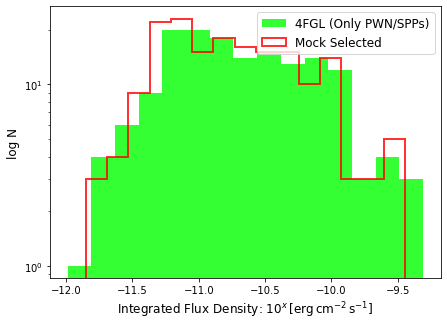

In [177]:
fig = plt.figure(figsize=(7, 5))

plt.hist(np.log10(v22LP_df_pwn_spp_snr['En_flux_100']), bins=AGNs_spp_pwn_snr_bins, density=False, 
         label='4FGL (Only PWN/SPPs)', color='lime', alpha=0.8)

plt.hist(np.log10(final_result_list_pwn_spp_comb), bins=AGNs_spp_pwn_snr_bins, density=False, 
         histtype='stepfilled', fill=False, alpha=0.8, edgecolor='red', label='Mock Selected', 
        linewidth=2)




# plt.text(-10.6, 46, 'Number of sources in Mock: %d'%( len(final_result_list) ) )
# plt.text()
plt.yscale('log')
plt.ylabel('log N', fontsize=12)

plt.xlabel(r'Integrated Flux Density: $10^{x}\, [\mathrm{erg}\, \mathrm{cm}^{-2}\, \mathrm{s}^{-1}]$', 
           fontsize=12)

plt.legend(fontsize=12)


# fig.add_subplot(122)

# plt.hist(np.log10(v22LP_df_pwn_spp_snr['En_flux_100']), bins=AGNs_spp_pwn_snr_bins, density=False, 
#          label='4FGL', color='lime', alpha=0.8)

# plt.hist(np.log10(final_result_list_bcu_comb), bins=AGNs_bcu_bins, density=False, 
#          histtype='stepfilled', fill=False, alpha=0.8, edgecolor='red', label='Mock Selected', 
#         linewidth=2)




# # plt.text(-10.6, 46, 'Number of sources in Mock: %d'%( len(final_result_list) ) )
# # plt.text()
# plt.yscale('log')
# plt.ylabel('log N', fontsize=12)

# plt.xlabel(r'Integrated Flux Density: $10^{x}\, [\mathrm{erg}\, \mathrm{cm}^{-2}\, \mathrm{s}^{-1}]$', 
#            fontsize=12)


# # plt.savefig('Integrated_E100_mock_4FGLV23_AGNs.png', dpi=170)
# plt.tight_layout()

print(len(final_result_list_pwn_spp_comb))

In [ ]:
pwn_spp_ra_cord_list = []
pwn_spp_dec_cord_list = []

mock_source_num_pwn_spp_comb = [i for i in range(len(c_lp_a_pwn_spp_comb))]



for plo, pla in zip(c_GLON_pwn_spp_comb, c_GLAT_pwn_spp_comb):
    c_icrs1_pl  = SkyCoord(l=plo*u.degree, b=pla*u.degree, frame='galactic')
    pwn_spp_ra_cord_list.append(c_icrs1_pl.fk5.ra.degree)
    pwn_spp_dec_cord_list.append(c_icrs1_pl.fk5.dec.degree)

In [ ]:
mock_source_num_pwn_spp_comb = [i for i in range(len(c_lp_a_pwn_spp_comb))]
print (len(mock_source_num_pwn_spp_comb))

mock_xmlfile_pwn_spp_comb = open('/content/drive/My Drive/mock_4FGL_V22_pwn_spp_comb.xml', 'w')
mock_xmlfile_pwn_spp_comb.write('<source_library title="source library">\n')
for n, al, be, pivE, ra, dec, num in zip(c_lp_F_pwn_spp_comb, c_lp_a_pwn_spp_comb, c_lp_b_pwn_spp_comb, 
                                         c_lp_PEn_pwn_spp_comb, 
                                         pwn_spp_ra_cord_list, pwn_spp_dec_cord_list, 
                                         mock_source_num_pwn_spp_comb):
    
    mock_xmlfile_pwn_spp_comb.write('<source name="LogParabola_source{0}" type="PointSource">\n'.format(num))
    mock_xmlfile_pwn_spp_comb.write('<!-- point source units are cm^-2 s^-1 MeV^-1 -->\n')
    mock_xmlfile_pwn_spp_comb.write('<spectrum type="LogParabola">\n')
    mock_xmlfile_pwn_spp_comb.write(
        '<parameter free="1" max="{0}" min="{1}" name="norm" scale="1.0" value="{2}"/>\n'.format(max(c_lp_F_pwn_spp_comb), min(c_lp_F_pwn_spp_comb), n))
    mock_xmlfile_pwn_spp_comb.write(
        '<parameter free="1" max="{0}" min="{1}" name="alpha" scale="1.0" value="{2}"/>\n'.format(max(c_lp_a_pwn_spp_comb), min(c_lp_a_pwn_spp_comb), al))
    mock_xmlfile_pwn_spp_comb.write(
        '<parameter free="1" max="{0}" min="{1}" name="Eb" scale="1" value="{2}"/>\n'.format(max(c_lp_PEn_pwn_spp_comb), min(c_lp_PEn_pwn_spp_comb), pivE))
    mock_xmlfile_pwn_spp_comb.write(
        '<parameter free="1" max="{0}" min="{1}" name="beta" scale="1.0" value="{2}"/>\n'.format(max(c_lp_b_pwn_spp_comb), min(c_lp_b_pwn_spp_comb), be))
    mock_xmlfile_pwn_spp_comb.write('</spectrum>\n')
    mock_xmlfile_pwn_spp_comb.write('<spatialModel type="SkyDirFunction">\n')
    mock_xmlfile_pwn_spp_comb.write(
        '<parameter free="0" max="360." min="0." name="RA" scale="1.0" value="{0}"/>\n'.format(ra))
    mock_xmlfile_pwn_spp_comb.write(
        '<parameter free="0" max="90." min="-90." name="DEC" scale="1.0" value="{0}"/>\n'.format(dec))
    mock_xmlfile_pwn_spp_comb.write('</spatialModel>\n')
    mock_xmlfile_pwn_spp_comb.write('</source>\n')
    
mock_xmlfile_pwn_spp_comb.write('</source_library>')    
mock_xmlfile_pwn_spp_comb.close()

156


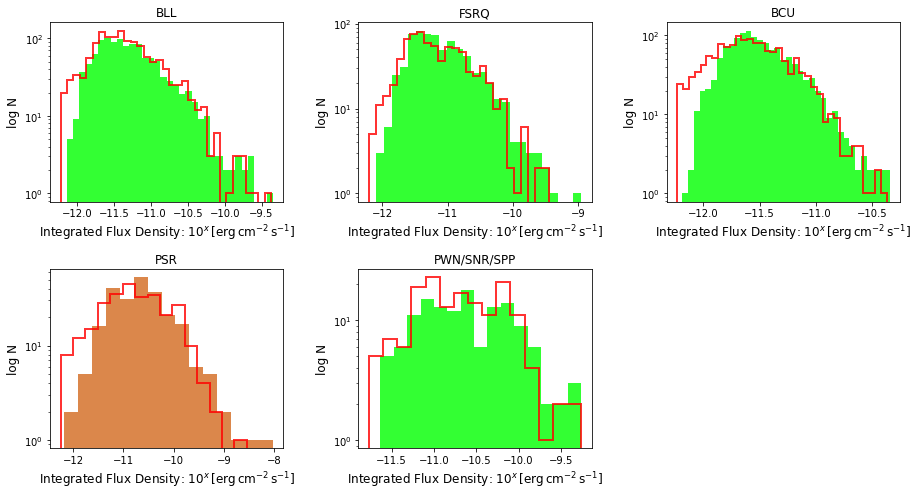

In [ ]:
# E100 for all classes 
fig = plt.figure(figsize=(13, 7))


fig.add_subplot(231)
plt.hist(np.log10(v22LP_df_bll['En_flux_100']), bins=AGNs_bll_bins, density=False, 
         label='4FGL (Only BLLs)', color='lime', alpha=0.8)

plt.hist(np.log10(final_result_list_bll_comb), bins=AGNs_bll_bins, density=False, 
         histtype='stepfilled', fill=False, alpha=0.8, edgecolor='red', label='Mock Selected', 
        linewidth=2)

plt.yscale('log')
plt.ylabel('log N', fontsize=12)

plt.xlabel(r'Integrated Flux Density: $10^{x}\, [\mathrm{erg}\, \mathrm{cm}^{-2}\, \mathrm{s}^{-1}]$', 
           fontsize=12)

plt.title('BLL', fontsize=12)

fig.add_subplot(232)

plt.hist(np.log10(v22LP_df_fsrq['En_flux_100']), bins=AGNs_fsrq_bins, density=False, 
         label='4FGL (Only FSRQs)', color='lime', alpha=0.8)

plt.hist(np.log10(f_result_list_fsrq_comb), bins=AGNs_fsrq_bins, density=False, 
         histtype='stepfilled', fill=False, alpha=0.8, edgecolor='red', label='Mock Selected', 
        linewidth=2)


plt.yscale('log')
plt.ylabel('log N', fontsize=12)

plt.xlabel(r'Integrated Flux Density: $10^{x}\, [\mathrm{erg}\, \mathrm{cm}^{-2}\, \mathrm{s}^{-1}]$', 
           fontsize=12)

plt.title('FSRQ', fontsize=12)

fig.add_subplot(233)

plt.hist(np.log10(v22LP_df_bcu['En_flux_100']), bins=AGNs_bcu_bins, density=False, 
         label='4FGL (Only BCUs)', color='lime', alpha=0.8)

plt.hist(np.log10(final_result_list_bcu_comb), bins=AGNs_bcu_bins, density=False, 
         histtype='stepfilled', fill=False, alpha=0.8, edgecolor='red', label='Mock Selected', 
        linewidth=2)

plt.yscale('log')
plt.ylabel('log N', fontsize=12)

plt.xlabel(r'Integrated Flux Density: $10^{x}\, [\mathrm{erg}\, \mathrm{cm}^{-2}\, \mathrm{s}^{-1}]$', 
           fontsize=12)

plt.title('BCU', fontsize=12)

fig.add_subplot(234)
plt.hist(np.log10(v22LP_df_psrs['En_flux_100']), bins=PLEC_df_bins, density=False, 
         label='4FGL (Only PSRs)', color='chocolate', alpha=0.8)

plt.hist(np.log10(f_result_list_pl), bins=PLEC_df_bins, density=False, 
         histtype='stepfilled', fill=False, alpha=0.8, edgecolor='red', label='Mock Selected', 
        linewidth=2)

plt.yscale('log')
plt.ylabel('log N', fontsize=12)

plt.xlabel(r'Integrated Flux Density: $10^{x}\, [\mathrm{erg}\, \mathrm{cm}^{-2}\, \mathrm{s}^{-1}]$', 
           fontsize=12)

plt.title('PSR', fontsize=12)

fig.add_subplot(235)
plt.hist(np.log10(v22LP_df_pwn_spp_snr['En_flux_100']), bins=AGNs_spp_pwn_snr_bins, density=False, 
         label='4FGL (Only PWN/SPPs)', color='lime', alpha=0.8)

plt.hist(np.log10(final_result_list_pwn_spp_comb), bins=AGNs_spp_pwn_snr_bins, density=False, 
         histtype='stepfilled', fill=False, alpha=0.8, edgecolor='red', label='Mock Selected', 
        linewidth=2)

plt.yscale('log')
plt.ylabel('log N', fontsize=12)

plt.xlabel(r'Integrated Flux Density: $10^{x}\, [\mathrm{erg}\, \mathrm{cm}^{-2}\, \mathrm{s}^{-1}]$', 
           fontsize=12)

plt.title('PWN/SNR/SPP', fontsize=12)
plt.tight_layout()
plt.savefig('/content/drive/My Drive/Colab Notebooks/fermi-lat/all_E100s.png', dpi=300)